<a href="https://colab.research.google.com/github/Manasasidd/Predicting-Emergency-Response-Times/blob/main/Manasa_Siddharamaiah_FinalPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center">Predicting Emergency Response Times</h2>

## Abstract

Efficient emergency response is critical for public safety, yet response times in New York City can vary widely due to multiple influencing factors. This project focuses on predicting emergency response times by analyzing NYC Dispatch data, which contains historical records of emergency responses. Additional features, including the type of incident, location, and time of day, are incorporated to identify key patterns affecting response efficiency.

The methodology involves preprocessing the Dispatch data to ensure quality and consistency, followed by exploratory data analysis (EDA) to uncover trends and disparities in response times. Predictive models, such as linear regression, decision trees, and ensemble models will be used to estimate response times across various scenarios. Feature engineering and model optimization are employed to enhance prediction accuracy, while visualization are used to communicate key findings effectively.

The project’s outcomes are intended to assist emergency services in making data-driven decisions, improving operational efficiency, and minimizing delays in critical situations. By leveraging predictive modeling and NYC Dispatch data, this study aims to provide actionable insights for emergency response planning and contribute to enhancing public safety across the city.

## Introduction

Emergency response times are a critical measure of public safety and the efficiency of urban emergency services. In a densely populated and diverse city like New York City, the ability to predict response times accurately can have significant implications for resource allocation, operational planning, and ultimately, saving lives. This project focuses on analyzing and predicting emergency response times by leveraging NYC Dispatch data, which contains historical records of emergency incidents.

The research questions driving this study include: How accurately can emergency response times in NYC be predicted using various factors? What are the most influential variables—such as incident type, location, and time of day—in determining these response times? Are there specific locations in NYC where emergency medical services (EMS) response times are consistently longer? These questions are motivated by the potential to provide actionable insights that can help emergency services optimize their operations and improve service equity across neighborhoods.

The dataset, sourced from NYC Open Data, contains approximately 20 million rows, making it challenging to train and model effectively without robust computational resources. To address this, we have sampled 3 million rows of data, spanning the period from January 1, 2022, to December 31, 2023. This subset includes key variables such as incident type, response time, and geographic information. The data will undergo preprocessing and exploratory analysis to identify trends and anomalies. Predictive modeling and spatial analysis will then be applied to address the research questions.

By addressing these questions through rigorous analysis and predictive modeling, this project aims to support data-driven decision-making in emergency services, enhancing resource allocation strategies and ensuring timely responses citywide.


**Link : https://nycopendata.socrata.com/Public-Safety/EMS-Incident-Dispatch-Data/76xm-jjuj/about_data**

### Research Question :
- How accurately can emergency response times in NYC be predicted using different variable?
- What are the most influential factors—incident type, location, time of day and more in determining emergency response times in NYC, and how can these insights be used to optimize resource allocation?
- Are there specific locations in NYC where EMS response times are consistently longer?

### Data Dictionary

| **Column Name**                 | **Description**                                                                                       |
|----------------------------------|-------------------------------------------------------------------------------------------------------|
| **CAD_INCIDENT_ID**             | An incident identifier comprising the Julian date and a 4-character sequence number starting at 1 each day. |
| **INCIDENT_DATETIME**           | The date and time the incident was created in the dispatch system.                                    |
| **INITIAL_CALL_TYPE***          | The call type assigned at the time of incident creation.                                              |
| **INITIAL_SEVERITY_LEVEL_CODE** | The segment (priority) assigned at the time of incident creation.                                     |
| **FINAL_CALL_TYPE***            | The call type at the time the incident closes.                                                        |
| **FINAL_SEVERITY_LEVEL_CODE**   | The segment (priority) assigned at the time the incident closes.                                      |
| **FIRST_ASSIGNMENT_DATETIME**   | The date and time the first unit is assigned.                                                         |
| **VALID_DISPATCH_RSPNS_TIME_INDC** | Indicates that the components comprising the calculation of the `DISPATCH_RESPONSE_SECONDS_QY` are valid. |
| **DISPATCH_RESPONSE_SECONDS_QY**| The time elapsed in seconds between the `INCIDENT_DATETIME` and the `FIRST_ASSIGNMENT_DATETIME`.       |
| **FIRST_ACTIVATION_DATETIME**   | The date and time the first unit gives the signal that it is enroute to the location of the incident.  |
| **FIRST_ON_SCENE_DATETIME**     | The date and time the first unit signals that it has arrived at the location of the incident.          |
| **VALID_INCIDENT_RSPNS_TIME_INDC** | Indicates that the components comprising the calculation of the `INCIDENT_RESPONSE_SECONDS_QY` are valid. |
| **INCIDENT_RESPONSE_SECONDS_QY**| The time elapsed in seconds between the `INCIDENT_DATETIME` and the `FIRST_ON_SCENE_DATETIME`.         |
| **INCIDENT_TRAVEL_TM_SECONDS_QY** | The time elapsed in seconds between the `FIRST_ASSIGNMENT_DATETIME` and the `FIRST_ON_SCENE_DATETIME`. |
| **FIRST_TO_HOSP_DATETIME**      | The date and time the first unit gives the signal that it is enroute to the hospital.                 |
| **FIRST_HOSP_ARRIVAL_DATETIME** | The date and time the first unit signals that it has arrived at the hospital.                         |
| **INCIDENT_CLOSE_DATETIME**     | The date and time the incident closes in the dispatch system.                                         |
| **HELD_INDICATOR**              | Indicates that for some reason a unit could not be assigned immediately.                              |
| **INCIDENT_DISPOSITION_CODE**   | A code indicating the final outcome of the incident. See incident dispositions.                       |
| **BOROUGH**                     | The borough of the incident location.                                                                |
| **ATOM**                        | The smallest subdivision of the borough where the incident is located.                               |
| **INCIDENT_DISPATCH_AREA**      | The dispatch area of the incident.                                                                   |
| **ZIPCODE**                     | The zip code of the incident.                                                                        |
| **POLICEPRECINCT**              | The police precinct of the incident.                                                                |
| **CITYCOUNCILDISTRICT**         | The city council district.                                                                           |
| **COMMUNITYDISTRICT**           | The community district.                                                                              |
| **COMMUNITYSCHOOLDISTRICT**     | The community school district.                                                                       |
| **CONGRESSIONALDISTRICT**       | The congressional district.                                                                          |
| **REOPEN_INDICATOR**            | Indicates that at some point the incident was closed but then reopened.                              |
| **SPECIAL_EVENT_INDICATOR**     | Indicates that the incident was a special event such as the NYC Marathon.                            |
| **STANDBY_INDICATOR**           | Indicates that the units were assigned to stand by in case they were needed.                         |
| **TRANSFER_INDICATOR**          | Indicates that the incident was created for the transportation of a patient between facilities.       |

We have uploaded our dataset in AWS S3(made it public) and accessing the file from the cloud

In [ ]:
#import pandas module
import pandas as pd

#reading data and storing it into dataframe
df = pd.read_csv('https://emsresponse.s3.us-east-1.amazonaws.com/EMS_Incident_Dispatch_Data_updated.csv')

# Adjust Pandas options to display all columns
pd.set_option('display.max_columns', None)

#displaying first five columns
df

CAD_INCIDENT_ID    INCIDENT_DATETIME INITIAL_CALL_TYPE  \
0              220010334  2022-01-01 01:08:30               EDP   
1              220010450  2022-01-01 01:28:54              SICK   
2              220010536  2022-01-01 01:45:56              DRUG   
3              220010605  2022-01-01 01:56:44               EDP   
4              220010739  2022-01-01 02:20:32              EDPC   
...                  ...                  ...               ...   
3176578        233645678  2023-12-30 23:57:53               EDP   
3176579        233645679  2023-12-30 23:58:30              CARD   
3176580        233645680  2023-12-30 23:59:05            ALTMEN   
3176581        233645681  2023-12-30 23:59:33            DIFFBR   
3176582        233645682  2023-12-30 23:59:58            INJURY   

         INITIAL_SEVERITY_LEVEL_CODE FINAL_CALL_TYPE  \
0                                  7             EDP   
1                                  6            SICK   
2                                  4            DRUG   
3                                  7             EDP   
4                                  7            EDPC   
...                              ...             ...   
3176578                            7             EDP   
3176579                            3            CARD   
3176580                            3          DIFFBR   
3176581                            2          DIFFBR   
3176582                            5          INJMAJ   

         FINAL_SEVERITY_LEVEL_CODE FIRST_ASSIGNMENT_DATETIME  \
0                                7                       NaN   
1                                6                       NaN   
2                                4    01/01/2022 02:02:45 AM   
3                                7                       NaN   
4                                7                       NaN   
...                            ...                       ...   
3176578                          7    12/30/2023 11:58:07 PM   
3176579                          3    12/31/2023 12:00:55 AM   
3176580                          2    12/30/2023 11:59:12 PM   
3176581                          2    12/30/2023 11:59:54 PM   
3176582                          3    12/31/2023 12:00:07 AM   

        VALID_DISPATCH_RSPNS_TIME_INDC  DISPATCH_RESPONSE_SECONDS_QY  \
0                                    N                             0   
1                                    N                             0   
2                                    Y                          1009   
3                                    N                             0   
4                                    N                             0   
...                                ...                           ...   
3176578                              Y                            14   
3176579                              Y                           145   
3176580                              Y                             7   
3176581                              Y                            21   
3176582                              Y                             9   

        FIRST_ACTIVATION_DATETIME FIRST_ON_SCENE_DATETIME  \
0                             NaN                     NaN   
1                             NaN                     NaN   
2          01/01/2022 02:02:59 AM                     NaN   
3                             NaN                     NaN   
4                             NaN                     NaN   
...                           ...                     ...   
3176578    12/30/2023 11:58:26 PM  12/31/2023 12:03:14 AM   
3176579    12/31/2023 12:01:02 AM  12/31/2023 12:14:53 AM   
3176580    12/30/2023 11:59:33 PM  12/31/2023 12:06:49 AM   
3176581    12/31/2023 12:01:09 AM  12/31/2023 12:05:16 AM   
3176582    12/31/2023 12:00:29 AM  12/31/2023 12:05:18 AM   

        VALID_INCIDENT_RSPNS_TIME_INDC  INCIDENT_RESPONSE_SECONDS_QY  \
0                                    N                           NaN   
1                   

First we will get some information about our dataset

In [ ]:
#getting info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176583 entries, 0 to 3176582
Data columns (total 31 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   CAD_INCIDENT_ID                 int64  
 1   INCIDENT_DATETIME               object 
 2   INITIAL_CALL_TYPE               object 
 3   INITIAL_SEVERITY_LEVEL_CODE     int64  
 4   FINAL_CALL_TYPE                 object 
 5   FINAL_SEVERITY_LEVEL_CODE       int64  
 6   FIRST_ASSIGNMENT_DATETIME       object 
 7   VALID_DISPATCH_RSPNS_TIME_INDC  object 
 8   DISPATCH_RESPONSE_SECONDS_QY    int64  
 9   FIRST_ACTIVATION_DATETIME       object 
 10  FIRST_ON_SCENE_DATETIME         object 
 11  VALID_INCIDENT_RSPNS_TIME_INDC  object 
 12  INCIDENT_RESPONSE_SECONDS_QY    float64
 13  INCIDENT_TRAVEL_TM_SECONDS_QY   float64
 14  FIRST_TO_HOSP_DATETIME          object 
 15  FIRST_HOSP_ARRIVAL_DATETIME     object 
 16  INCIDENT_CLOSE_DATETIME         object 
 17  HELD_INDICATOR             

Given the large number of rows in our dataset and the lack of sufficient computational power to process such extensive data, we will begin with data preprocessing.

The datetime variables in our dataset hold valuable temporal information that can be extracted and transformed into features for analysis and modeling. To begin, we will focus on the variable 'INCIDENT_DATETIME,' breaking it down into year, month, weekday, and time components.

In [ ]:
#Convert the variable 'INCIDENT_DATETIME' to datetime
df['INCIDENT_DATETIME'] = pd.to_datetime(df['INCIDENT_DATETIME'])

#Creating new variables from 'INCIDENT_DATETIME'
df['incident_year'] = df['INCIDENT_DATETIME'].dt.year
df['incident_month'] = df['INCIDENT_DATETIME'].dt.month
df['incident_weekday'] = df['INCIDENT_DATETIME'].dt.weekday

#From the df display we can see that our datetime is stored in 24-hr format so we are using this to calculate total minutes
df['total_minutes'] = df['INCIDENT_DATETIME'].dt.hour * 60 + df['INCIDENT_DATETIME'].dt.minute

#Dropping that column
df.drop(columns = ['INCIDENT_DATETIME'],inplace = True)

Since our target variable is INCIDENT_RESPONSE_SECONDS_QY and we are predicting how much time does it takes for the arrival of the first unit based on the location and several other factors so there are some variables that are directly co-related with our target variable or has no-use in the dataset as it occurs at later stage so we will be dropping thoose variables from our dataset

In [ ]:
#Dropping unnecessary columns
df.drop(columns = ['FIRST_ASSIGNMENT_DATETIME','FIRST_ACTIVATION_DATETIME','FIRST_ON_SCENE_DATETIME','FIRST_TO_HOSP_DATETIME'
                  , 'FIRST_HOSP_ARRIVAL_DATETIME', 'INCIDENT_CLOSE_DATETIME', 'INCIDENT_DISPOSITION_CODE', 'REOPEN_INDICATOR',
                  'VALID_DISPATCH_RSPNS_TIME_INDC', 'DISPATCH_RESPONSE_SECONDS_QY', 'INCIDENT_TRAVEL_TM_SECONDS_QY',
                  'STANDBY_INDICATOR'],inplace = True)

In [ ]:
#displaying df
df

CAD_INCIDENT_ID INITIAL_CALL_TYPE  INITIAL_SEVERITY_LEVEL_CODE  \
0              220010334               EDP                            7   
1              220010450              SICK                            6   
2              220010536              DRUG                            4   
3              220010605               EDP                            7   
4              220010739              EDPC                            7   
...                  ...               ...                          ...   
3176578        233645678               EDP                            7   
3176579        233645679              CARD                            3   
3176580        233645680            ALTMEN                            3   
3176581        233645681            DIFFBR                            2   
3176582        233645682            INJURY                            5   

        FINAL_CALL_TYPE  FINAL_SEVERITY_LEVEL_CODE  \
0                   EDP                          7   
1                  SICK                          6   
2                  DRUG                          4   
3                   EDP                          7   
4                  EDPC                          7   
...                 ...                        ...   
3176578             EDP                          7   
3176579            CARD                          3   
3176580          DIFFBR                          2   
3176581          DIFFBR                          2   
3176582          INJMAJ                          3   

        VALID_INCIDENT_RSPNS_TIME_INDC  INCIDENT_RESPONSE_SECONDS_QY  \
0                                    N                           NaN   
1                                    N                           NaN   
2                                    N                           NaN   
3                                    N                           NaN   
4                                    N                           NaN   
...                                ...                           ...   
3176578                              Y                         321.0   
3176579                              Y                         983.0   
3176580                              Y                         464.0   
3176581                              Y                         343.0   
3176582                              Y                         320.0   

        HELD_INDICATOR    BOROUGH INCIDENT_DISPATCH_AREA  ZIPCODE  \
0                    N      BRONX                     B4  10467.0   
1                    N  MANHATTAN                     M2  10014.0   
2                    N  MANHATTAN                     M3  10019.0   
3                    Y  MANHATTAN                     M2  10016.0   
4                    N   BROOKLYN                     K1  11204.0   
...                ...        ...                    ...      ...   
3176578              N   BROOKLYN                     K2  11209.0   
3176579              N      BRONX                     B1  10474.0   
3176580              N   BROOKLYN                     K7  11221.0   
3176581              N      BRONX                     B3  10465.0   
3176582              N     QUEENS                     Q6  11368.0   

         POLICEPRECINCT  CITYCOUNCILDISTRICT  COMMUNITYDISTRICT  \
0                  47.0                 12.0              212.0   
1                   6.0                  3.0              102.0   
2                  18.0                  3.0              105.0   
3                  13.0                  2.0              106.0   
4                  62.0                 44.0              311.0   
...                 ...                  ...                ...   
3176578            68.0                 43.0              310.0   
3176579            41.0                 17.0              202.0   
3176580            83.0                 34.0              304.0   
3176581            45.0                 13.0              210.0   
3176582           115.0     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176583 entries, 0 to 3176582
Data columns (total 22 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   CAD_INCIDENT_ID                 int64  
 1   INITIAL_CALL_TYPE               object 
 2   INITIAL_SEVERITY_LEVEL_CODE     int64  
 3   FINAL_CALL_TYPE                 object 
 4   FINAL_SEVERITY_LEVEL_CODE       int64  
 5   VALID_INCIDENT_RSPNS_TIME_INDC  object 
 6   INCIDENT_RESPONSE_SECONDS_QY    float64
 7   HELD_INDICATOR                  object 
 8   BOROUGH                         object 
 9   INCIDENT_DISPATCH_AREA          object 
 10  ZIPCODE                         float64
 11  POLICEPRECINCT                  float64
 12  CITYCOUNCILDISTRICT             float64
 13  COMMUNITYDISTRICT               float64
 14  COMMUNITYSCHOOLDISTRICT         float64
 15  CONGRESSIONALDISTRICT           float64
 16  SPECIAL_EVENT_INDICATOR         object 
 17  TRANSFER_INDICATOR         

Now we will check the total number of nulls in each column

In [ ]:
#counting null values in each column
df.isnull().sum()

CAD_INCIDENT_ID                        0
INITIAL_CALL_TYPE                      0
INITIAL_SEVERITY_LEVEL_CODE            0
FINAL_CALL_TYPE                        0
FINAL_SEVERITY_LEVEL_CODE              0
VALID_INCIDENT_RSPNS_TIME_INDC         0
INCIDENT_RESPONSE_SECONDS_QY      135809
HELD_INDICATOR                         0
BOROUGH                                0
INCIDENT_DISPATCH_AREA                 0
ZIPCODE                            31293
POLICEPRECINCT                     31190
CITYCOUNCILDISTRICT                31190
COMMUNITYDISTRICT                  31197
COMMUNITYSCHOOLDISTRICT            33585
CONGRESSIONALDISTRICT              31190
SPECIAL_EVENT_INDICATOR                0
TRANSFER_INDICATOR                     0
incident_year                          0
incident_month                         0
incident_weekday                       0
total_minutes                          0
dtype: int64

We got a huge amount of null in our dataset and that is a concern

Now we will check the duplicates in our dataframe

In [ ]:
#checking duplicate rows in the dataframe
df.duplicated().sum()

0

In [ ]:
#checking unique value in each dataframe
df.nunique()

CAD_INCIDENT_ID                   3176583
INITIAL_CALL_TYPE                     166
INITIAL_SEVERITY_LEVEL_CODE             9
FINAL_CALL_TYPE                       173
FINAL_SEVERITY_LEVEL_CODE               8
VALID_INCIDENT_RSPNS_TIME_INDC          2
INCIDENT_RESPONSE_SECONDS_QY        12184
HELD_INDICATOR                          2
BOROUGH                                 6
INCIDENT_DISPATCH_AREA                 35
ZIPCODE                               236
POLICEPRECINCT                         77
CITYCOUNCILDISTRICT                    51
COMMUNITYDISTRICT                      71
COMMUNITYSCHOOLDISTRICT                32
CONGRESSIONALDISTRICT                  13
SPECIAL_EVENT_INDICATOR                 2
TRANSFER_INDICATOR                      2
incident_year                           2
incident_month                         12
incident_weekday                        7
total_minutes                        1440
dtype: int64

Since CAD_INCIDENT_ID is a unique identifier so we do not need this in our model so we will drop this column

In [ ]:
df = df.drop('CAD_INCIDENT_ID', axis=1)

## Exploratory Data Analysis

Let's check the percentage of null in each column

In [ ]:
#getting the percentage of null value in each attribute
(df.isnull().sum()/len(df))*100

INITIAL_CALL_TYPE                 0.000000
INITIAL_SEVERITY_LEVEL_CODE       0.000000
FINAL_CALL_TYPE                   0.000000
FINAL_SEVERITY_LEVEL_CODE         0.000000
VALID_INCIDENT_RSPNS_TIME_INDC    0.000000
INCIDENT_RESPONSE_SECONDS_QY      4.275317
HELD_INDICATOR                    0.000000
BOROUGH                           0.000000
INCIDENT_DISPATCH_AREA            0.000000
ZIPCODE                           0.985115
POLICEPRECINCT                    0.981873
CITYCOUNCILDISTRICT               0.981873
COMMUNITYDISTRICT                 0.982093
COMMUNITYSCHOOLDISTRICT           1.057268
CONGRESSIONALDISTRICT             0.981873
SPECIAL_EVENT_INDICATOR           0.000000
TRANSFER_INDICATOR                0.000000
incident_year                     0.000000
incident_month                    0.000000
incident_weekday                  0.000000
total_minutes                     0.000000
dtype: float64

We will create a function which will help us in our univariate analysis

In [ ]:
#Importing the modules
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist_box(df, attribute):
    """
    This function takes a DataFrame and an attribute as input,
    and creates a histogram and box plot side by side for that attribute.
    """
    # Set the figure size
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Histogram
    sns.histplot(df[attribute], kde=True, ax=axes[0], bins=30, color='skyblue')
    axes[0].set_title(f'Histogram of {attribute}', fontsize=15)
    axes[0].set_xlabel(attribute, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Box plot
    sns.boxplot(df[attribute], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Box Plot of {attribute}', fontsize=15)
    axes[1].set_xlabel(attribute, fontsize=12)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_count(df, attribute):
    """
    This function takes a DataFrame and an attribute (column name) as input
    and creates a count plot for that attribute.
    """
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Create the count plot
    sns.countplot(data=df, x=attribute, palette='pastel')

    # Set plot title and labels
    plt.title(f'Count Plot of {attribute}', fontsize=15)
    plt.xlabel(attribute, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    # Rotate x-axis labels by 90 degrees
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

### Univariate Analysis

In [ ]:
#printing columns
df.columns

Index(['INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE', 'FINAL_CALL_TYPE',
       'FINAL_SEVERITY_LEVEL_CODE', 'VALID_INCIDENT_RSPNS_TIME_INDC',
       'INCIDENT_RESPONSE_SECONDS_QY', 'HELD_INDICATOR', 'BOROUGH',
       'INCIDENT_DISPATCH_AREA', 'ZIPCODE', 'POLICEPRECINCT',
       'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT', 'COMMUNITYSCHOOLDISTRICT',
       'CONGRESSIONALDISTRICT', 'SPECIAL_EVENT_INDICATOR',
       'TRANSFER_INDICATOR', 'incident_year', 'incident_month',
       'incident_weekday', 'total_minutes'],
      dtype='object')

#### INITIAL_CALL_TYPE

Value Counts for 'INITIAL_CALL_TYPE':
INITIAL_CALL_TYPE
INJURY    382357
SICK      347050
UNKNOW    310333
EDP       197767
UNC       181171
           ...  
T-INBL         1
DDOA           1
MCI59          1
T-STEP         1
STUCK          1
Name: count, Length: 166, dtype: int64



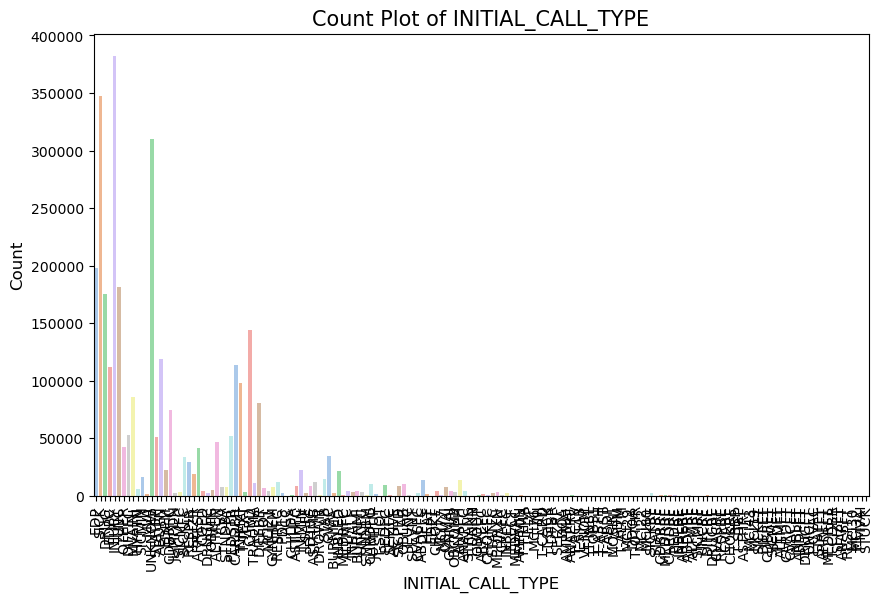

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'INITIAL_CALL_TYPE':\n{df['INITIAL_CALL_TYPE'].value_counts()}\n")

#count plot for 'INITIAL_CALL_TYPE'
plot_count(df, 'INITIAL_CALL_TYPE')

The count plot of **INITIAL_CALL_TYPE** reveals that a few types, such as "INJURY," "SICK," and "UNKNOWN," dominate the dataset, indicating these are the most common emergencies. This imbalance suggests that response time predictions may be heavily influenced by these frequent categories, while rarer call types might introduce variability or noise.

#### HELD_INDICATOR

Value Counts for 'HELD_INDICATOR':
HELD_INDICATOR
N    2856097
Y     320486
Name: count, dtype: int64



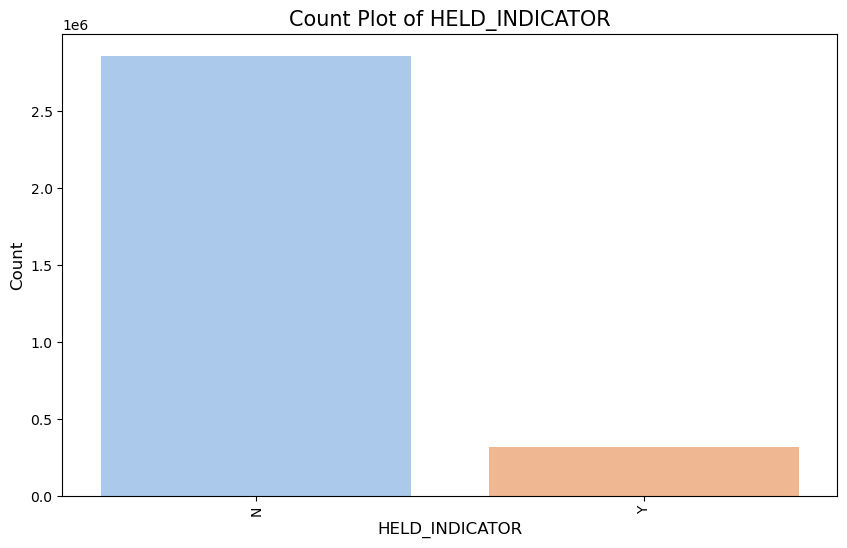

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'HELD_INDICATOR':\n{df['HELD_INDICATOR'].value_counts()}\n")

# Count plot for 'HELD_INDICATOR'
plot_count(df, 'HELD_INDICATOR')


The count plot of the **HELD_INDICATOR** variable shows a significant imbalance, with the majority of incidents (approximately 2.85 million) having a "No" value, indicating that most incidents were assigned units immediately. A smaller proportion (around 320,000) have a "Yes" value, signifying delayed assignments. This suggests that unit availability is generally sufficient but that certain conditions may lead to delays.

#### INITIAL_SEVERITY_LEVEL_CODE

Value Counts for 'INITIAL_SEVERITY_LEVEL_CODE':
INITIAL_SEVERITY_LEVEL_CODE
4    662772
2    656580
5    539770
3    449827
6    429046
7    382664
1     47204
8      8703
9        17
Name: count, dtype: int64



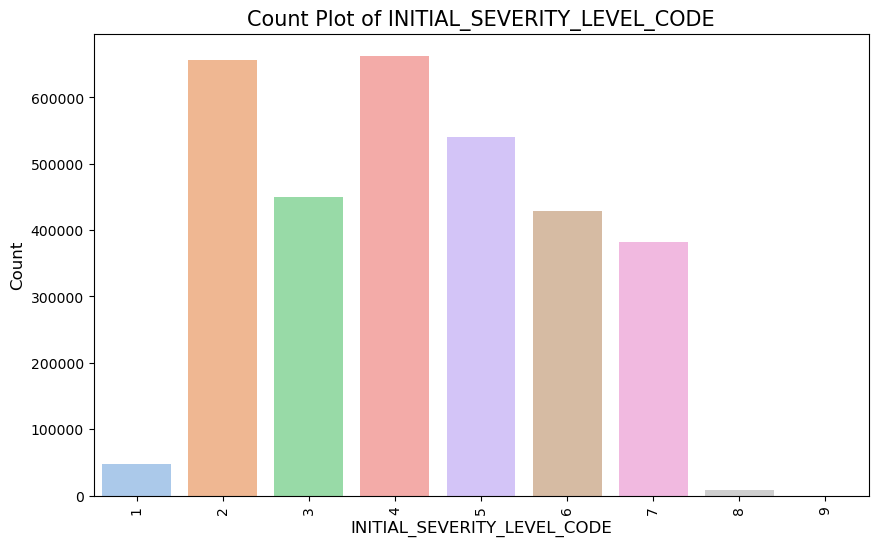

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'INITIAL_SEVERITY_LEVEL_CODE':\n{df['INITIAL_SEVERITY_LEVEL_CODE'].value_counts()}\n")

#count plot for 'INITIAL_SEVERITY_LEVEL_CODE'
plot_count(df, 'INITIAL_SEVERITY_LEVEL_CODE')

The count plot of **INITIAL_SEVERITY_LEVEL_CODE** shows that severity levels 4 and 2 are the most frequent, while higher severity levels (8 and 9) and the lowest level (1) are rare. This distribution suggests that emergencies are generally clustered around moderate severity levels. Analyzing response times across severity levels can provide insights into how prioritization impacts efficiency.

#### FINAL_CALL_TYPE

Value Counts for 'FINAL_CALL_TYPE':
FINAL_CALL_TYPE
SICK      379747
INJURY    365110
UNKNOW    258639
DRUG      201567
UNC       172014
           ...  
STATFT         1
CVACFT         1
SICMFT         1
MCI28          1
SEIZFT         1
Name: count, Length: 173, dtype: int64



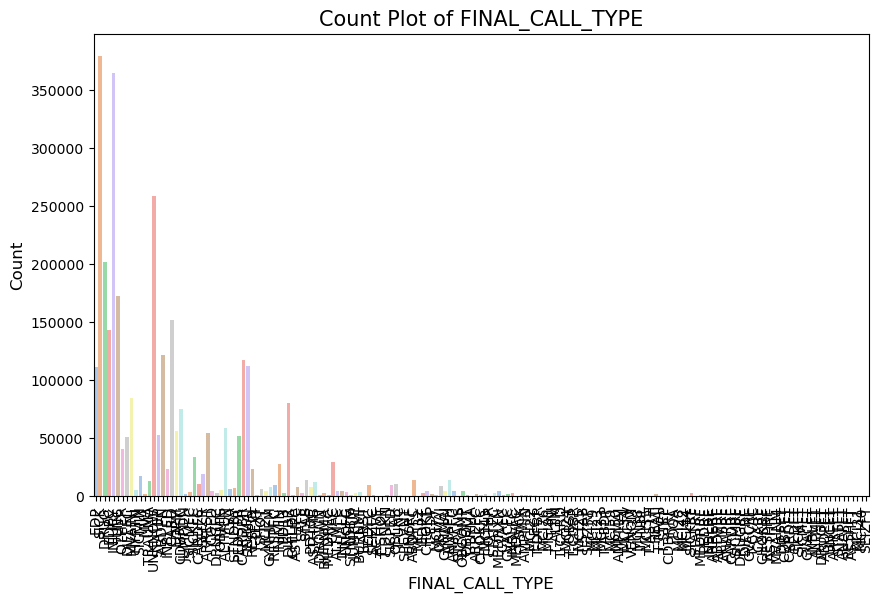

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'FINAL_CALL_TYPE':\n{df['FINAL_CALL_TYPE'].value_counts()}\n")

#count plot for 'FINAL_CALL_TYPE'
plot_count(df, 'FINAL_CALL_TYPE')

The count plot of **FINAL_CALL_TYPE** reveals that "SICK", "INJURY", "DRUG" and "UNKNOWN" are the most frequent final classifications, similar to INITIAL_CALL_TYPE. This indicates consistency in call type categorization throughout the incident lifecycle for common emergencies. The long tail of rare call types suggests that uncommon incidents may have unique response time patterns.

#### FINAL_SEVERITY_LEVEL_CODE

Value Counts for 'FINAL_SEVERITY_LEVEL_CODE':
FINAL_SEVERITY_LEVEL_CODE
2    649481
4    625742
5    527597
3    481720
6    459061
7    364894
1     60080
8      8008
Name: count, dtype: int64



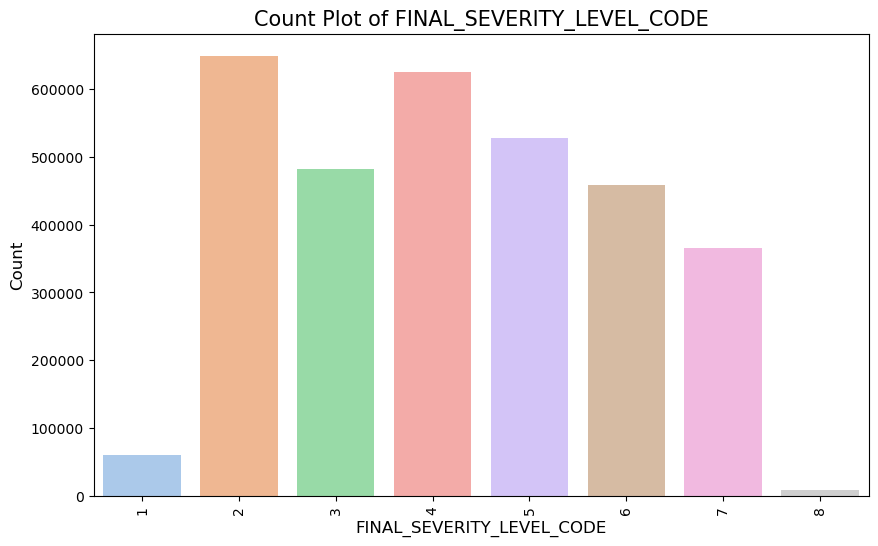

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'FINAL_SEVERITY_LEVEL_CODE':\n{df['FINAL_SEVERITY_LEVEL_CODE'].value_counts()}\n")

#count plot for 'FINAL_SEVERITY_LEVEL_CODE'
plot_count(df, 'FINAL_SEVERITY_LEVEL_CODE')

The count plot of **FINAL_SEVERITY_LEVEL_CODE** demonstrates a similar distribution to INITIAL_SEVERITY_LEVEL_CODE, with levels 2, 4, and 5 being the most frequent and levels 1 and 8 being rare. This consistency suggests minimal changes in severity classification during the lifecycle of most incidents. Exploring response times by severity levels can validate whether higher severity incidents (e.g., level 1) consistently receive faster responses, which would reflect effective prioritization

#### VALID_INCIDENT_RSPNS_TIME_INDC

Value Counts for 'VALID_INCIDENT_RSPNS_TIME_INDC':
VALID_INCIDENT_RSPNS_TIME_INDC
Y    3040774
N     135809
Name: count, dtype: int64



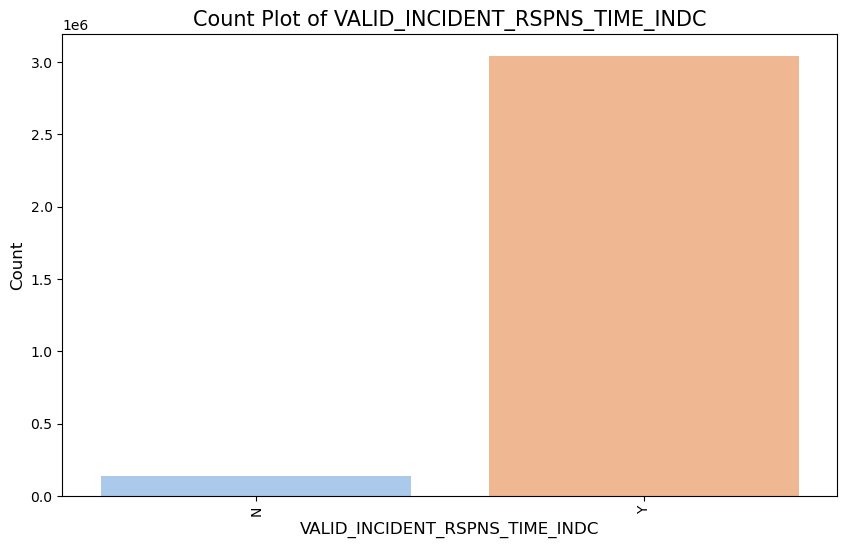

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'VALID_INCIDENT_RSPNS_TIME_INDC':\n{df['VALID_INCIDENT_RSPNS_TIME_INDC'].value_counts()}\n")

#count plot for 'VALID_INCIDENT_RSPNS_TIME_INDC'
plot_count(df, 'VALID_INCIDENT_RSPNS_TIME_INDC')

The count plot for **VALID_INCIDENT_RSPNS_TIME_INDC** shows that the majority of records (over 3 million) have valid incident response times (Y), while a small portion (around 135,000) are marked as invalid (N). This indicates that most data points can be reliably used for response time analysis. However, the invalid records may require further investigation to understand patterns or reasons for invalidity, such as incomplete data or unusual incidents, which could help improve data quality.

**Borough**

Statistical Summary for BOROUGH:
BOROUGH
BROOKLYN                    867057
MANHATTAN                   789487
BRONX                       743843
QUEENS                      643055
RICHMOND / STATEN ISLAND    133133
UNKNOWN                          8
Name: count, dtype: int64 



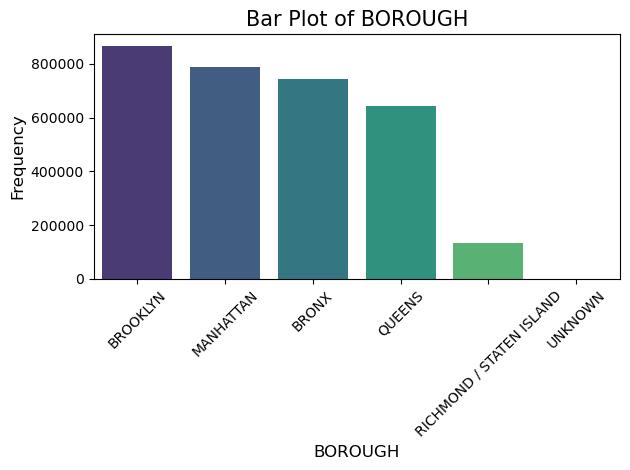

In [ ]:
# Statistical summary for 'BOROUGH'
borough_stats = df['BOROUGH'].value_counts()
print("Statistical Summary for BOROUGH:")
print(borough_stats, "\n")

# Bar plot for 'BOROUGH'
sns.countplot(data=df, x='BOROUGH', palette='viridis', order=borough_stats.index)
plt.title('Bar Plot of BOROUGH', fontsize=15)
plt.xlabel('BOROUGH', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


The bar plot for **BOROUGH** highlights that Brooklyn, Manhattan, and the Bronx have the highest frequency of incidents, indicating these areas experience a higher volume of emergency calls. Queens has slightly fewer incidents, while Staten Island (Richmond) has significantly fewer. The presence of unknown boroughs is minimal and likely negligible.
This distribution suggests that response time may vary as densely populated areas like Brooklyn and Manhattan could face unique challenges, such as traffic or resource availability, impacting emergency response efficiency.

#### ZIPCODE

Value Counts for 'ZIPCODE':
ZIPCODE
10456.0    56920
11212.0    53471
10457.0    51655
11207.0    51271
10467.0    48861
           ...  
10177.0        7
12345.0        6
83.0           6
10166.0        3
10803.0        1
Name: count, Length: 236, dtype: int64



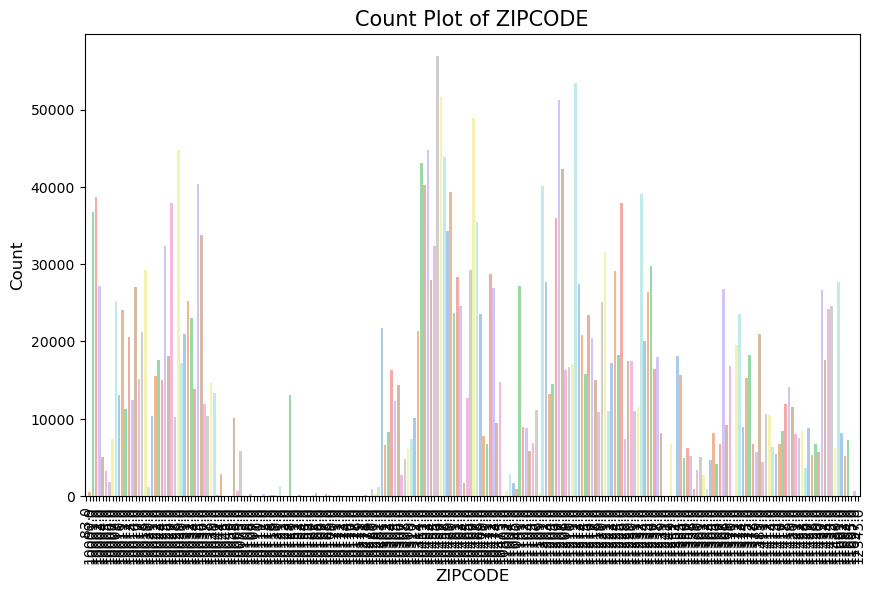

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'ZIPCODE':\n{df['ZIPCODE'].value_counts()}\n")

#count plot for 'ZIPCODE'
plot_count(df, 'ZIPCODE')

The count plot for **ZIPCODE** shows significant variation in the frequency of incidents across different areas, with a few zip codes, such as 10456 and 11212, experiencing the highest number of incidents. This suggests that certain neighborhoods face consistently higher emergency demands, which could strain local resources. Identifying such high-frequency zip codes is critical for understanding geographic disparities in response times and resource allocation. The presence of lower-frequency zip codes highlights areas with less frequent emergency activity, which may require a different approach to resource planning.

#### POLICEPRECINCT

Value Counts for 'POLICEPRECINCT':
POLICEPRECINCT
75.0     95102
44.0     82714
40.0     76724
43.0     75474
46.0     74814
         ...  
100.0    17476
111.0    17431
123.0    16977
76.0     14471
22.0      1146
Name: count, Length: 77, dtype: int64



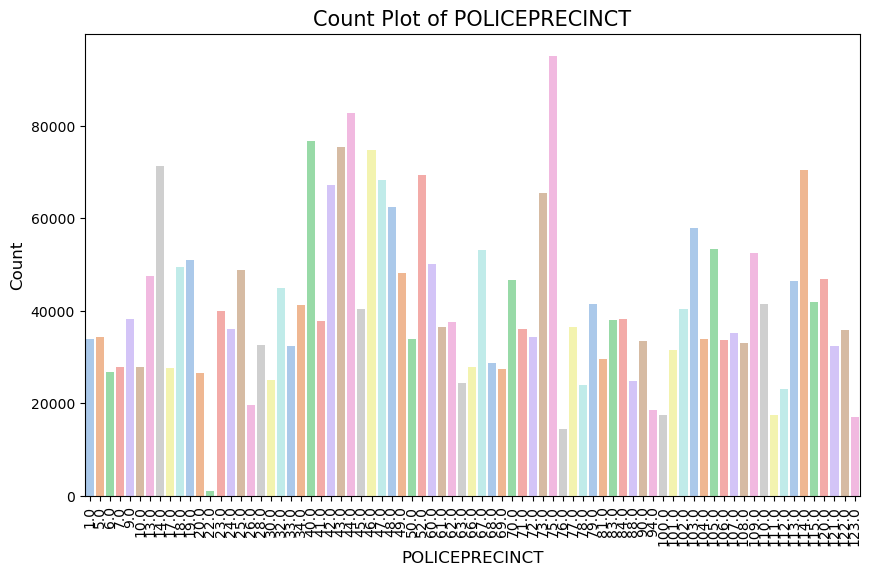

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'POLICEPRECINCT':\n{df['POLICEPRECINCT'].value_counts()}\n")

#count plot for 'POLICEPRECINCT'
plot_count(df, 'POLICEPRECINCT')

The count plot for **POLICEPRECINCT** shows varying levels of emergency incidents across different precincts, with precincts like 75, 44, and 40 having the highest counts. These high-frequency precincts likely represent areas with greater population density or higher incident rates, which may strain emergency response resources. On the other hand, precincts with lower counts may reflect either smaller populations or fewer emergency needs. This information is critical for understanding geographic variations in demand and ensuring that response times are optimized across precincts by appropriately allocating resources.

#### CITYCOUNCILDISTRICT

Value Counts for 'CITYCOUNCILDISTRICT':
CITYCOUNCILDISTRICT
3.0     139264
8.0     127500
17.0    125417
9.0     105794
15.0    104778
16.0     99356
1.0      92047
42.0     89898
4.0      88338
2.0      81386
41.0     80773
14.0     80438
18.0     72725
36.0     70782
12.0     67931
11.0     65893
10.0     65393
37.0     64710
35.0     64570
31.0     63838
33.0     63706
49.0     63458
7.0      62842
27.0     61503
26.0     57131
28.0     56666
13.0     56531
34.0     55762
47.0     53302
40.0     52790
6.0      48872
38.0     47239
24.0     45282
22.0     44754
48.0     44117
21.0     43913
32.0     42796
45.0     42740
46.0     41278
5.0      39577
50.0     39221
29.0     38253
43.0     37648
25.0     36084
23.0     35612
20.0     35498
39.0     35264
30.0     30349
51.0     29465
19.0     28133
44.0     24776
Name: count, dtype: int64



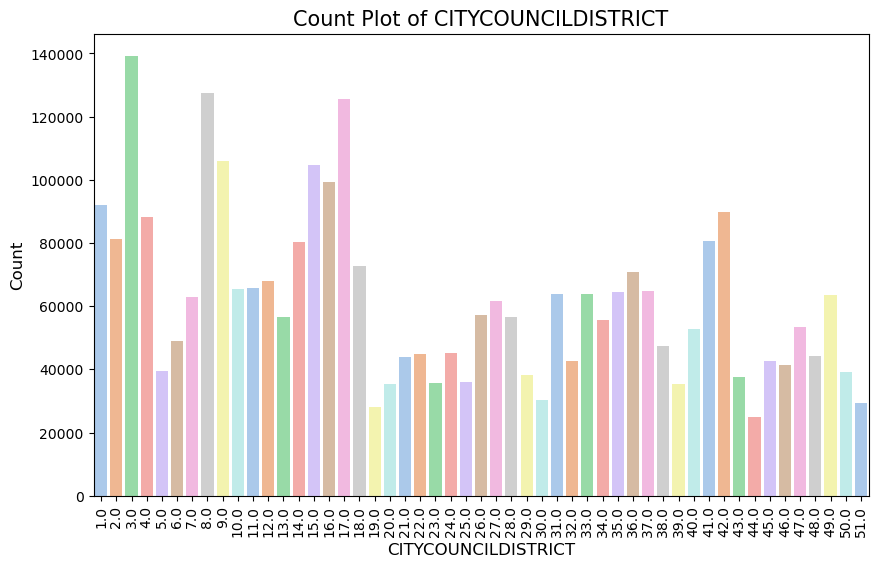

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'CITYCOUNCILDISTRICT':\n{df['CITYCOUNCILDISTRICT'].value_counts()}\n")

#count plot for 'CITYCOUNCILDISTRICT'
plot_count(df, 'CITYCOUNCILDISTRICT')

The count plot for **CITYCOUNCILDISTRICT** shows significant variation in the frequency of incidents across districts, with districts like 3, 8, and 17 having the highest counts. These high-incident districts likely reflect areas with higher population density or greater emergency service demands. On the other hand, districts with lower incident counts may represent less populated or more resource-stable areas.

#### COMMUNITYDISTRICT

Value Counts for 'COMMUNITYDISTRICT':
COMMUNITYDISTRICT
412.0    99274
305.0    94594
105.0    89080
111.0    88660
204.0    82714
         ...  
227.0      362
356.0      308
484.0      248
595.0      192
482.0      191
Name: count, Length: 71, dtype: int64



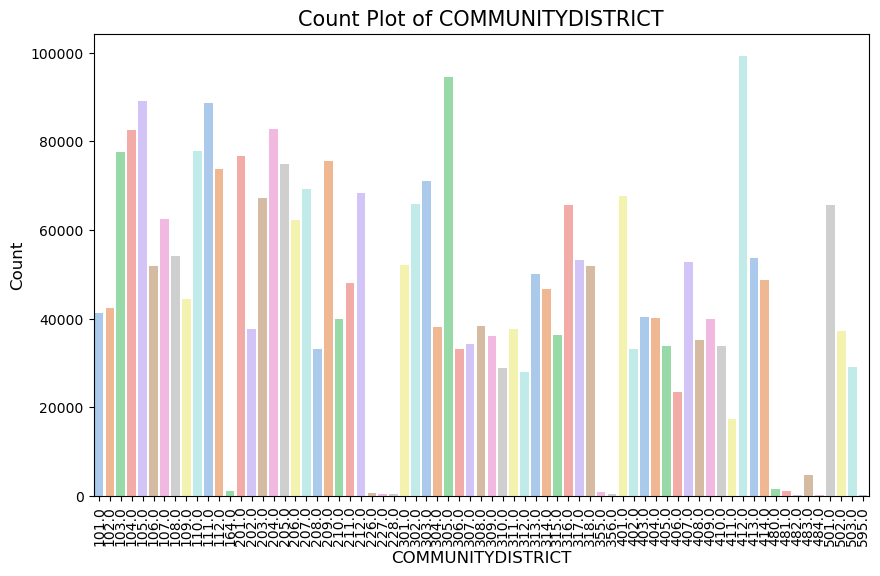

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'COMMUNITYDISTRICT':\n{df['COMMUNITYDISTRICT'].value_counts()}\n")

#count plot for 'COMMUNITYDISTRICT'
plot_count(df, 'COMMUNITYDISTRICT')

The count plot for **COMMUNITYDISTRICT** highlights that certain districts, such as 412, 305, and 105, have the highest number of emergency incidents, indicating areas with greater demand for emergency services. Conversely, districts with very low counts suggest areas with fewer incidents, which may either represent lower population density or better conditions reducing emergency needs. These variations emphasize the importance of analyzing community-specific patterns to identify high-demand areas, optimize resource allocation, and ensure equitable emergency service coverage across all districts.

#### COMMUNITYSCHOOLDISTRICT

Value Counts for 'COMMUNITYSCHOOLDISTRICT':
COMMUNITYSCHOOLDISTRICT
2.0     379518
10.0    173304
11.0    143332
9.0     142870
31.0    131656
27.0    123246
30.0    105109
7.0     102803
28.0    100718
8.0     100208
24.0     98322
19.0     97709
5.0      95413
6.0      94449
17.0     91943
22.0     90049
3.0      89435
12.0     86647
21.0     84887
15.0     84117
29.0     84056
13.0     76417
20.0     74671
25.0     67069
4.0      67043
14.0     65452
23.0     60869
1.0      60139
18.0     56314
16.0     43596
32.0     36066
26.0     35571
Name: count, dtype: int64



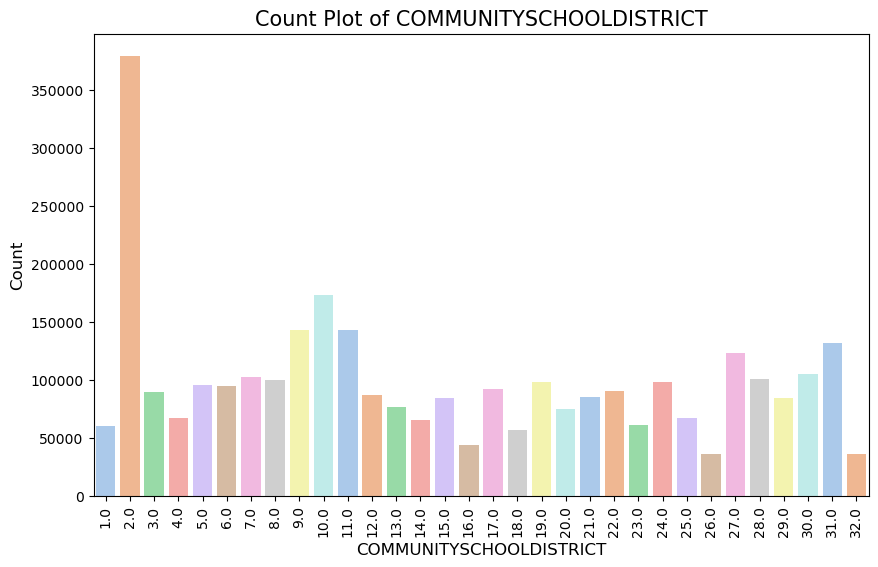

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'COMMUNITYSCHOOLDISTRICT':\n{df['COMMUNITYSCHOOLDISTRICT'].value_counts()}\n")

#count plot for 'COMMUNITYSCHOOLDISTRICT'
plot_count(df, 'COMMUNITYSCHOOLDISTRICT')

The count plot for **COMMUNITYSCHOOLDISTRICT** reveals significant variation in emergency incidents across school districts, with District 2 accounting for an overwhelmingly high number of incidents, followed by Districts 10, 11, and 9. This distribution indicates that certain school districts face much higher emergency demands, likely reflecting higher population densities or other underlying factors. Districts with lower counts may represent smaller or less densely populated areas. Analyzing emergency response times across these districts can help identify whether high-demand areas are adequately served and whether low-demand districts have unique characteristics that reduce emergencies.

#### CONGRESSIONALDISTRICT

Value Counts for 'CONGRESSIONALDISTRICT':
CONGRESSIONALDISTRICT
15.0    462714
13.0    370021
8.0     337393
12.0    335006
7.0     246289
10.0    242511
9.0     237647
5.0     236963
14.0    210264
11.0    190663
6.0     151025
16.0     96665
3.0      28232
Name: count, dtype: int64



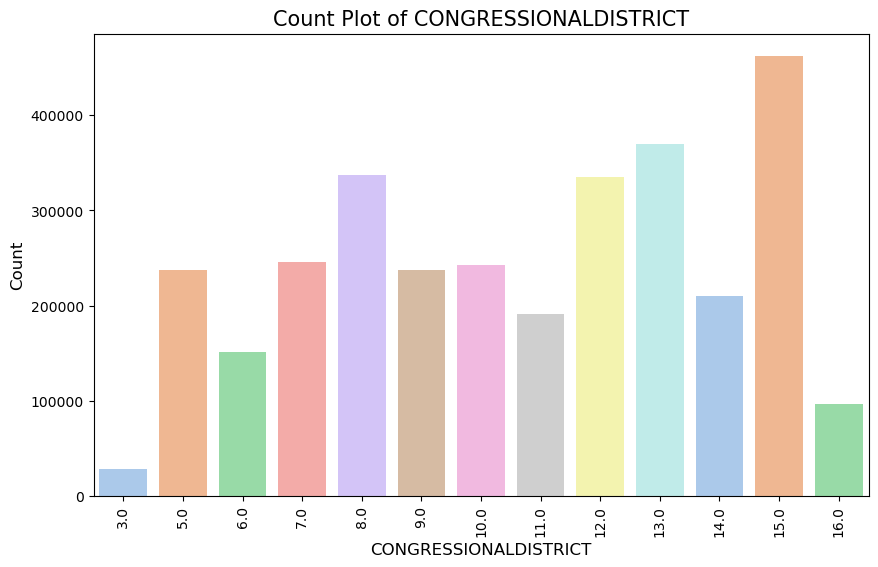

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'CONGRESSIONALDISTRICT':\n{df['CONGRESSIONALDISTRICT'].value_counts()}\n")

#count plot for 'CONGRESSIONALDISTRICT'
plot_count(df, 'CONGRESSIONALDISTRICT')

The count plot for **CONGRESSIONALDISTRICT** shows that Districts 15, 13, and 8 have the highest number of emergency incidents, suggesting these areas have higher emergency service demands. Districts with lower counts, such as 3 and 16, may represent regions with lower population densities or fewer emergency needs. These patterns can provide insights into how emergency incidents are distributed across congressional districts and help identify whether high-demand districts face challenges in response times.

#### SPECIAL_EVENT_INDICATOR

Value Counts for 'SPECIAL_EVENT_INDICATOR':
SPECIAL_EVENT_INDICATOR
N    3176474
Y        109
Name: count, dtype: int64



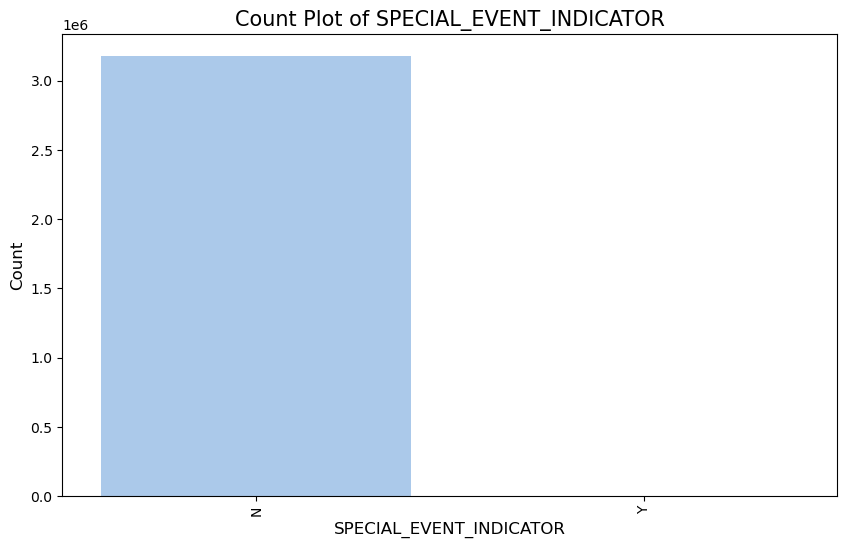

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'SPECIAL_EVENT_INDICATOR':\n{df['SPECIAL_EVENT_INDICATOR'].value_counts()}\n")

#count plot for 'SPECIAL_EVENT_INDICATOR'
plot_count(df, 'SPECIAL_EVENT_INDICATOR')

The count plot for **SPECIAL_EVENT_INDICATOR** shows that the overwhelming majority of incidents (over 3.1 million) are not associated with special events, while only 109 incidents are flagged as related to special events. This suggests that special events are rare and likely have minimal overall impact on emergency response analysis. However, these flagged cases could represent unique scenarios requiring different resource planning strategies due to the distinct challenges associated with events like marathons or public gatherings.

#### TRANSFER_INDICATOR

Value Counts for 'TRANSFER_INDICATOR':
TRANSFER_INDICATOR
N    3176562
Y         21
Name: count, dtype: int64



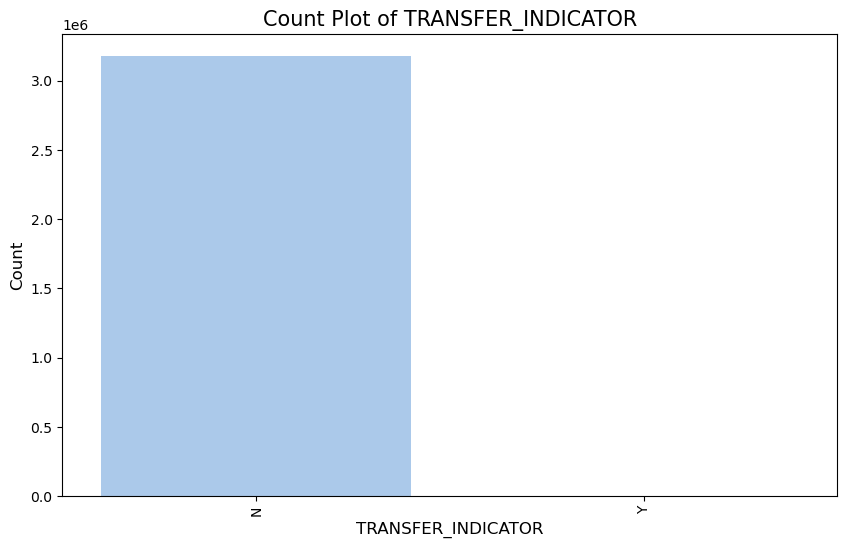

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'TRANSFER_INDICATOR':\n{df['TRANSFER_INDICATOR'].value_counts()}\n")

#count plot for 'TRANSFER_INDICATOR'
plot_count(df, 'TRANSFER_INDICATOR')

The count plot for **TRANSFER_INDICATOR** indicates that nearly all incidents (over 3.1 million) are not related to patient transfers between facilities, with only 21 flagged as transfers. This extreme imbalance suggests that transfer-related incidents are rare and unlikely to significantly influence overall patterns in the dataset. However, these cases may involve unique logistical considerations and could benefit from a separate analysis to identify any specific challenges associated with inter-facility patient transfers.

#### incident_year

Value Counts for 'incident_year':
incident_year
2022    1589517
2023    1587066
Name: count, dtype: int64



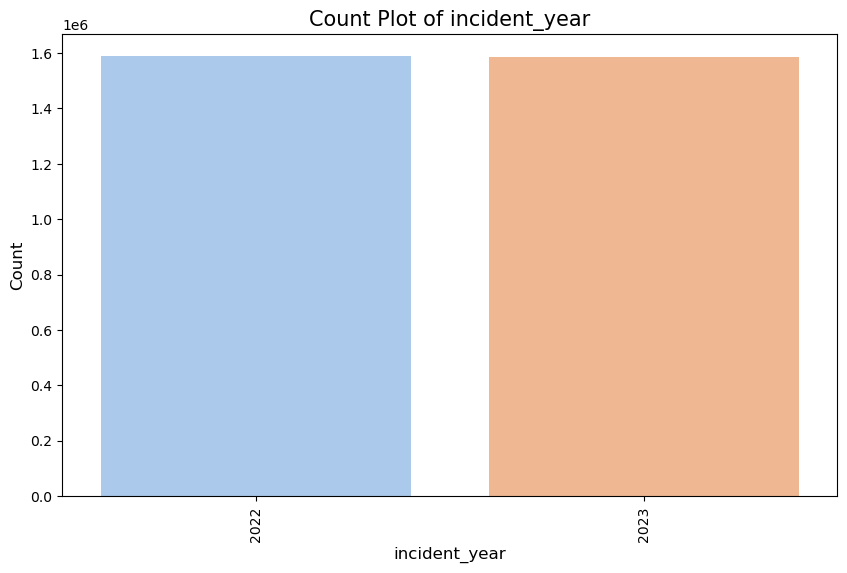

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'incident_year':\n{df['incident_year'].value_counts()}\n")

#count plot for 'incident_year'
plot_count(df, 'incident_year')

The count plot for **incident_year** shows a nearly equal distribution of incidents across 2022 and 2023, with approximately 1.59 million incidents in each year. This balance ensures that the dataset provides consistent temporal coverage, allowing for robust year-over-year comparisons.

#### incident_month

Value Counts for 'incident_month':
incident_month
7     284565
8     276468
12    275947
5     275898
10    274926
6     271665
9     266283
11    262215
1     259647
3     254542
4     247966
2     226461
Name: count, dtype: int64



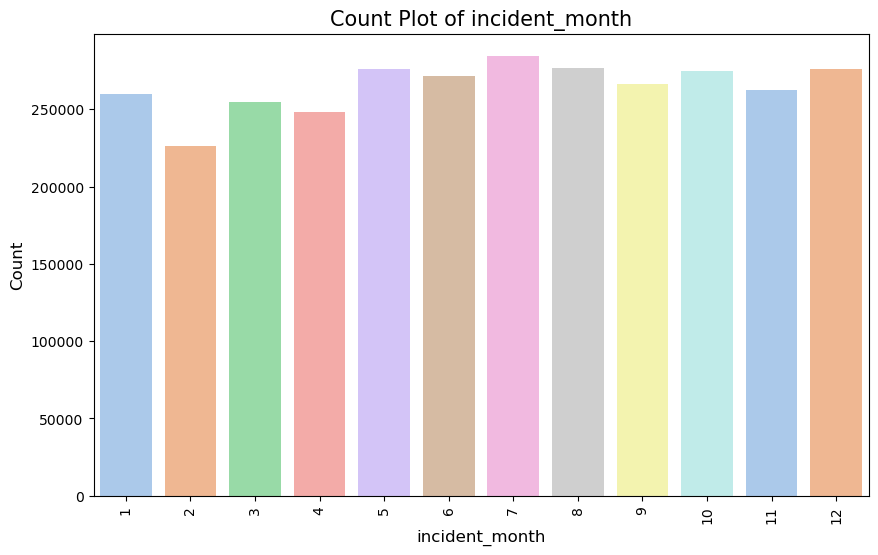

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'incident_month':\n{df['incident_month'].value_counts()}\n")

#count plot for 'incident_month'
plot_count(df, 'incident_month')

The count plot for **incident_month** demonstrates that emergency incidents are relatively consistent throughout the year, with counts more than 200,000 per month. While July shows a slightly higher count and February a slightly lower one, the variation is minimal. This consistency suggests that emergencies in NYC do not have strong seasonal dependencies, making resource allocation and planning easier to manage uniformly across all months.

#### incident_weekday

Value Counts for 'incident_weekday':
incident_weekday
4    468792
0    459548
2    458708
3    457158
1    453065
5    448851
6    430461
Name: count, dtype: int64



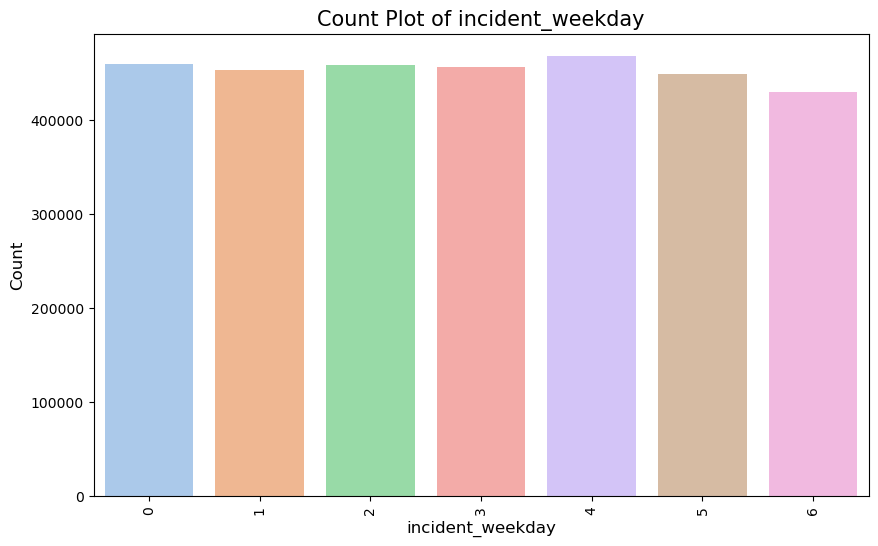

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'incident_weekday':\n{df['incident_weekday'].value_counts()}\n")

#count plot for 'incident_weekday'
plot_count(df, 'incident_weekday')

The count plot for **incident_weekday** shows that emergency incidents are fairly consistent across all days of the week, with only slight variations. Thursdays have the highest count, while Sundays have the lowest. However, the differences are minimal, indicating that emergencies are evenly distributed throughout the week. This consistency suggests that weekday-specific patterns are not a significant factor in emergency response demand, allowing for uniform resource planning across the week.

**INCIDENT_DISPATCH_AREA**

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'INCIDENT_DISPATCH_AREA':\n{df['INCIDENT_DISPATCH_AREA'].value_counts()}\n")

#count plot for 'INCIDENT_DISPATCH_AREA'
plot_count(df, 'INCIDENT_DISPATCH_AREA')

Value Counts for 'INCIDENT_DISPATCH_AREA':
INCIDENT_DISPATCH_AREA
B2    220977
K4    214785
Q6    189046
B1    182022
Q2    159673
M3    147787
B3    143554
M2    142199
K1    132972
K7    122696
K2    114594
K6    111297
B5    104803
M1     95864
K3     95016
M7     92421
B4     92223
M9     90636
M5     84693
K5     76370
Q3     75894
Q7     72620
S1     66137
M4     62026
Q4     59310
S2     49823
Q1     49103
M8     46243
Q5     36968
M6     27151
S3     17160
CW       349
X1       157
X2        13
X3         1
Name: count, dtype: int64



The count plot for **INCIDENT_DISPATCH_AREA** shows significant variability in the number of incidents across different dispatch areas. Areas like B2, K4, and Q6 have the highest counts, indicating higher emergency service demands, while areas like X1, X2, and X3 have minimal activity. This distribution highlights geographic disparities in incident volume, which could be influenced by population density or specific regional factors. Analyzing response times and resource allocation in high-demand areas can provide insights for improving service efficiency.






**total_minutes**

Value Counts for 'total_minutes':
count    3.176583e+06
mean     7.986417e+02
std      3.887593e+02
min      0.000000e+00
25%      5.330000e+02
50%      8.340000e+02
75%      1.117000e+03
max      1.439000e+03
Name: total_minutes, dtype: float64



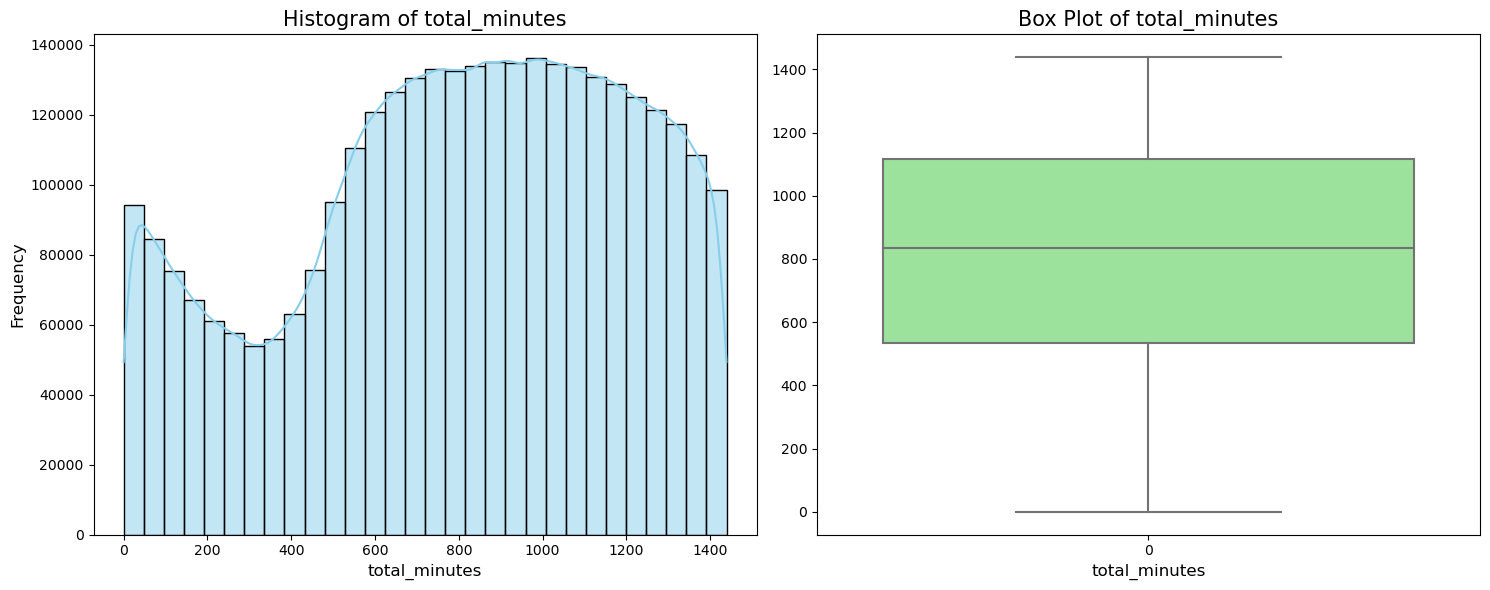

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'total_minutes':\n{df['total_minutes'].describe()}\n")

#count plot for 'total_minutes'
plot_hist_box(df, 'total_minutes')

The histogram and box plot for **total_minutes** reveal key insights into the distribution of response times. The histogram shows distribution with most values clustered around the mean of approximately 800 minutes. Peaks are observed in both lower and higher ranges, suggesting varying service durations influenced by incident factors.

The box plot confirms that the interquartile range (IQR) lies between 533 and 1,117 minutes, indicating that most incidents fall within this range. The median, at 834 minutes, aligns with the histogram's central tendency. The whiskers suggest minimal extreme outliers, showing that response times are relatively consistent.

**INCIDENT_RESPONSE_SECONDS_QY**

Value Counts for 'INCIDENT_RESPONSE_SECONDS_QY':
count    3.040774e+06
mean     6.699131e+02
std      8.661327e+02
min      0.000000e+00
25%      3.360000e+02
50%      4.860000e+02
75%      7.220000e+02
max      3.237900e+04
Name: INCIDENT_RESPONSE_SECONDS_QY, dtype: float64



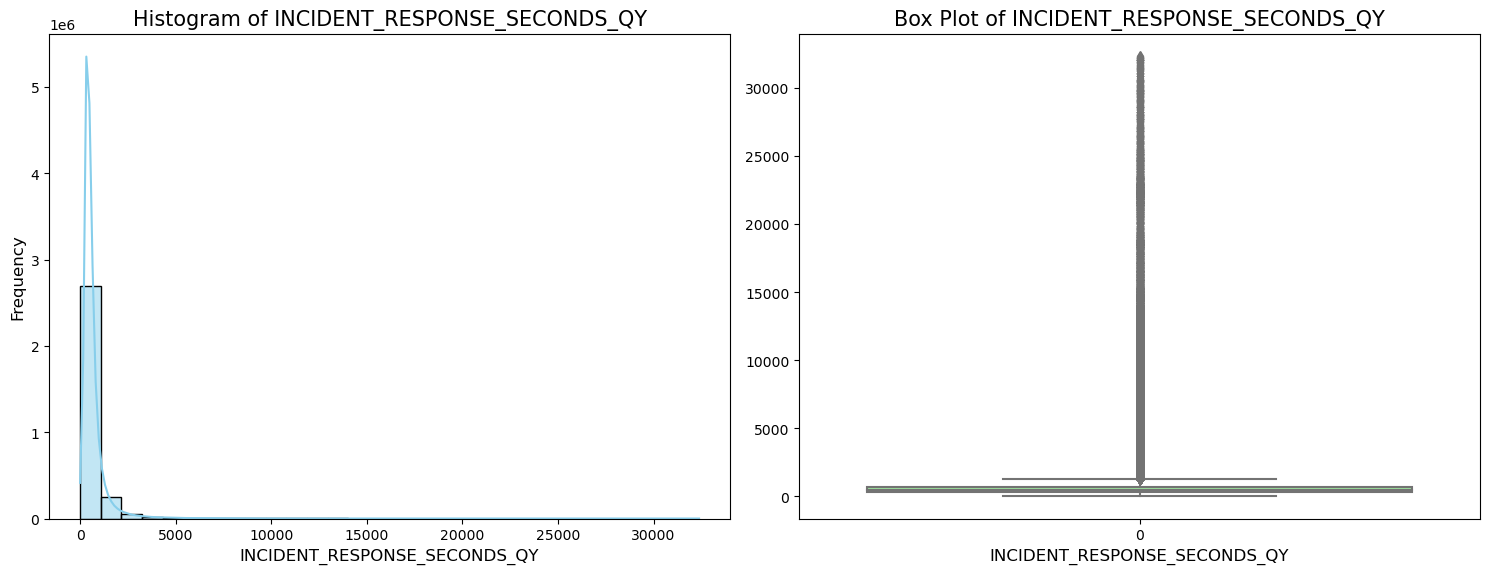

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'INCIDENT_RESPONSE_SECONDS_QY':\n{df['INCIDENT_RESPONSE_SECONDS_QY'].describe()}\n")

#count plot for 'INCIDENT_RESPONSE_SECONDS_QY'
plot_hist_box(df, 'INCIDENT_RESPONSE_SECONDS_QY')

The histogram and box plot for INCIDENT_RESPONSE_SECONDS_QY reveal a highly right-skewed distribution, where most response times cluster below 1,000 seconds, with a mean of approximately 670 seconds. The histogram indicates that a significant number of incidents have short response times, while the presence of extreme values (up to 32,379 seconds) suggests a few outliers.

The box plot confirms this skewness, with a compact interquartile range (IQR) between 336 and 722 seconds. The median of 486 seconds suggests that half of the incidents are resolved within roughly 8 minutes. The outliers might represent unusual circumstances, such as extreme traffic delays or rare incidents, and could warrant further investigation.

## Bivariate & Multivariate Analysis

In [ ]:
df.columns

Index(['INITIAL_CALL_TYPE', 'INITIAL_SEVERITY_LEVEL_CODE', 'FINAL_CALL_TYPE',
       'FINAL_SEVERITY_LEVEL_CODE', 'VALID_INCIDENT_RSPNS_TIME_INDC',
       'INCIDENT_RESPONSE_SECONDS_QY', 'HELD_INDICATOR', 'BOROUGH',
       'INCIDENT_DISPATCH_AREA', 'ZIPCODE', 'POLICEPRECINCT',
       'CITYCOUNCILDISTRICT', 'COMMUNITYDISTRICT', 'COMMUNITYSCHOOLDISTRICT',
       'CONGRESSIONALDISTRICT', 'SPECIAL_EVENT_INDICATOR',
       'TRANSFER_INDICATOR', 'incident_year', 'incident_month',
       'incident_weekday', 'total_minutes'],
      dtype='object')

In [ ]:
#Summary Statistics
summary_stats = df.groupby('INITIAL_CALL_TYPE')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(summary_stats)

                      count         mean          std    min     25%    50%  \
INITIAL_CALL_TYPE                                                             
ABDPFC              13083.0   709.239089   661.771277    0.0  379.00  539.0   
ABDPFT                  9.0  1212.222222  1250.208460  604.0  732.00  816.0   
ABDPN              116448.0   771.399801   831.318307    0.0  383.00  552.0   
ABDPRF                383.0   712.592689   563.159083   30.0  394.50  553.0   
ACC                     5.0   261.000000   196.102014    0.0  140.00  274.0   
...                     ...          ...          ...    ...     ...    ...   
UNCFC                3554.0   464.356218   228.532074   17.0  314.00  427.0   
UNCFT                   4.0   467.500000   132.223296  320.0  389.75  460.5   
UNCRF                 109.0   449.605505   188.232619   32.0  314.00  419.0   
UNKNOW             295791.0   667.940566   622.469915    0.0  352.00  511.0   
VENOM                  23.0   466.391304   193.62844

#### INCIDENT_RESPONSE_SECONDS_QY by INITIAL_CALL_TYPE

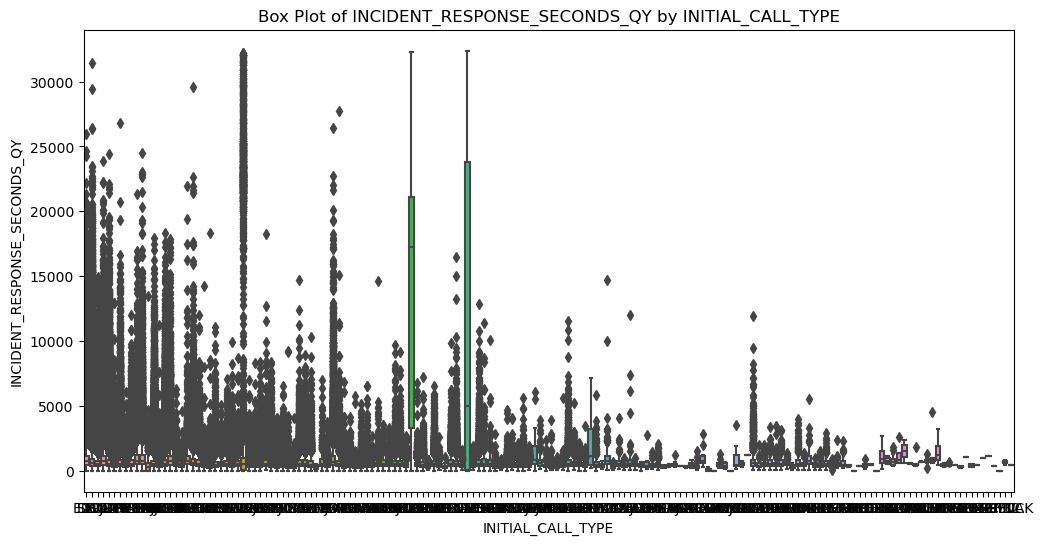

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='INITIAL_CALL_TYPE', y='INCIDENT_RESPONSE_SECONDS_QY', data=df)
plt.title('Box Plot of INCIDENT_RESPONSE_SECONDS_QY by INITIAL_CALL_TYPE')
plt.show()

The box plot of **INCIDENT_RESPONSE_SECONDS_QY by INITIAL_CALL_TYPE** shows substantial variability in response times across different call types. Common call types like "UNKNOW" exhibit a broad range of response times with some significant outliers, suggesting diverse scenarios within this category. Call types such as "ABDPFC" also show high median response times and outliers, reflecting incidents requiring more time or resources.

The wide range in both response time distributions and outliers for certain call types indicates that the nature of the emergency significantly impacts response efficiency. Call types with consistently lower response times, such as "UNCFC," suggest streamlined procedures for specific emergencies.

#### Response Time by Severity Level

In [ ]:
# Summary Statistics
summary = df.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(summary)

# Box Plot
sns.boxplot(x='INITIAL_SEVERITY_LEVEL_CODE', y='INCIDENT_RESPONSE_SECONDS_QY', data=df)
plt.title('Box Plot of Response Time by Severity Level')
plt.ylim(0,5000)
plt.show()

                                count         mean          std  min    25%  \
INITIAL_SEVERITY_LEVEL_CODE                                                   
1                             46741.0   343.590873   198.408200  0.0  238.0   
2                            640843.0   445.021657   233.392531  0.0  298.0   
3                            437372.0   449.531458   255.657449  0.0  296.0   
4                            634314.0   662.060232   600.953821  0.0  349.0   
5                            520933.0   736.393930   810.304180  0.0  361.0   
6                            406322.0   869.358228  1117.961580  0.0  388.0   
7                            347225.0  1015.955709  1145.355547  0.0  472.0   
8                              7008.0  4226.618293  8224.598206  0.0  157.0   
9                                16.0   140.500000   179.391936  0.0    0.0   

                               50%      75%      max  
INITIAL_SEVERITY_LEVEL_CODE                           
1                   

The box plot for **Response Time by Severity Level** reveals a clear trend: as the severity level increases, the median response time also tends to increase, particularly for levels 7 and 8. However, level 9 has surprisingly low response times, possibly due to a small sample size (16 cases). Levels 1 and 2, representing lower severity incidents, have shorter response times and fewer outliers, suggesting more streamlined handling.

Higher severity levels (4 through 8) exhibit greater variability and longer response times, as seen by wider interquartile ranges and numerous outliers. This variability might reflect the complexity and resource demands of handling critical incidents. Level 8, in particular, shows the highest mean response time and extreme outliers, likely due to unique challenges associated with these emergencies.

#### Incident Response Time By Initial Severity Level

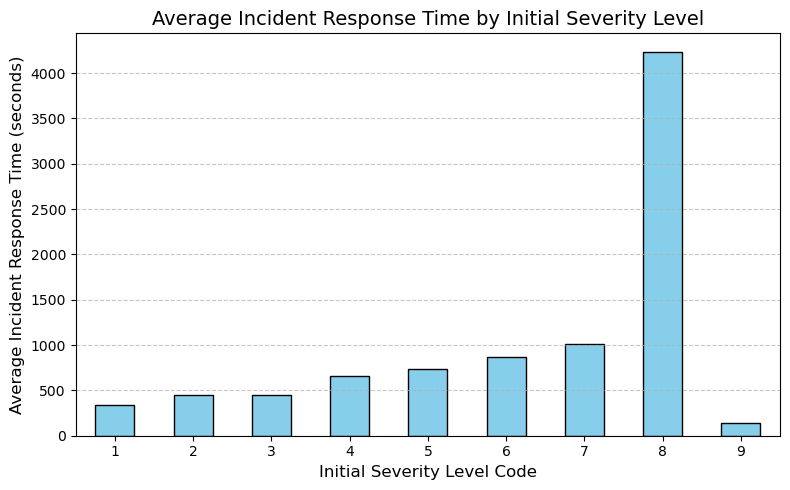

In [ ]:
# Aggregate Data
avg_response_time = df.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by Initial Severity Level', fontsize=14)
plt.xlabel('Initial Severity Level Code', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The bar plot shows that response times generally increase with higher severity levels. Severity level 8 has the highest average response time (over 4,000 seconds), reflecting greater resource demands and logistical challenges. Lower severity levels (1–3) have shorter response times, indicating simpler handling. This highlights the need to optimize processes for high-severity incidents, particularly level 8.

#### Response Time by Final Call Type

                    count         mean          std    min     25%    50%  \
FINAL_CALL_TYPE                                                             
ABDPFC            13486.0   732.382693   740.494176    0.0  383.00  547.0   
ABDPFT                6.0  1638.666667  1514.762248  604.0  779.00  926.5   
ABDPN            118833.0   777.076401   862.180802    0.0  383.00  551.0   
ABDPRF              406.0   709.059113   547.232459   30.0  395.75  553.5   
ACTIVE               95.0   278.010526   139.125574   47.0  202.00  260.0   
...                   ...          ...          ...    ...     ...    ...   
UNCFC              3450.0   489.583188   305.227679   17.0  322.00  434.0   
UNCFT                 3.0   516.666667   108.260488  413.0  460.50  508.0   
UNCRF               115.0   500.530435   350.489215   32.0  333.50  434.0   
UNKNOW           245384.0   664.481417   592.854898    0.0  352.00  512.0   
VENOM                26.0   532.038462   250.364771  326.0  381.25  464.0   

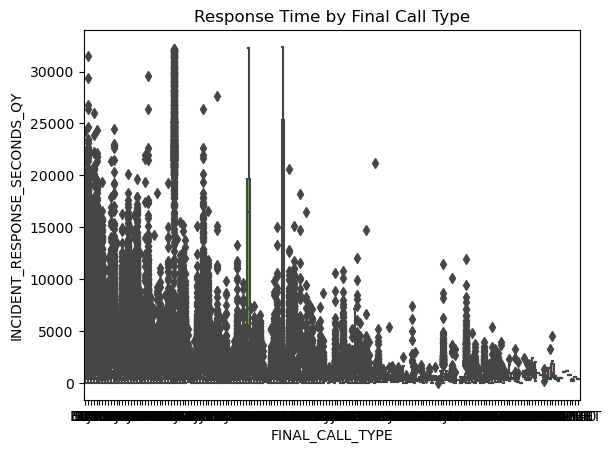

In [ ]:
# Grouped Descriptive Statistics
group_stats = df.groupby('FINAL_CALL_TYPE')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(group_stats)

# Box Plot
sns.boxplot(data=df, x='FINAL_CALL_TYPE', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title('Response Time by Final Call Type')
plt.show()

The box plot for **INCIDENT_RESPONSE_SECONDS_QY by FINAL_CALL_TYPE** highlights significant variability in response times across different emergency call types. Common call types like "UNKNOW" show a broad range of response times, with several high outliers, reflecting diverse scenarios within this category. Rare call types, such as "ABDPFT," exhibit higher average response times, likely due to their specialized nature and resource demands. Call types with shorter median response times, such as "ACTIVE," suggest efficient handling.

#### Response Time by Severity Level

                              count         mean          std  min    25%  \
FINAL_SEVERITY_LEVEL_CODE                                                   
1                           59538.0   378.968155   247.050405  0.0  252.0   
2                          633627.0   475.123680   344.517496  0.0  304.0   
3                          468756.0   492.083393   406.897730  0.0  304.0   
4                          597785.0   661.521624   602.623604  0.0  347.0   
5                          508974.0   746.177396   838.056114  0.0  362.0   
6                          435794.0   805.153853  1048.689933  0.0  370.0   
7                          329940.0   992.925947  1128.651849  0.0  459.0   
8                            6360.0  4568.110220  8547.873261  0.0   45.0   

                             50%      75%      max  
FINAL_SEVERITY_LEVEL_CODE                           
1                          340.0   453.00  18333.0  
2                          416.0   563.00  21235.0  
3                

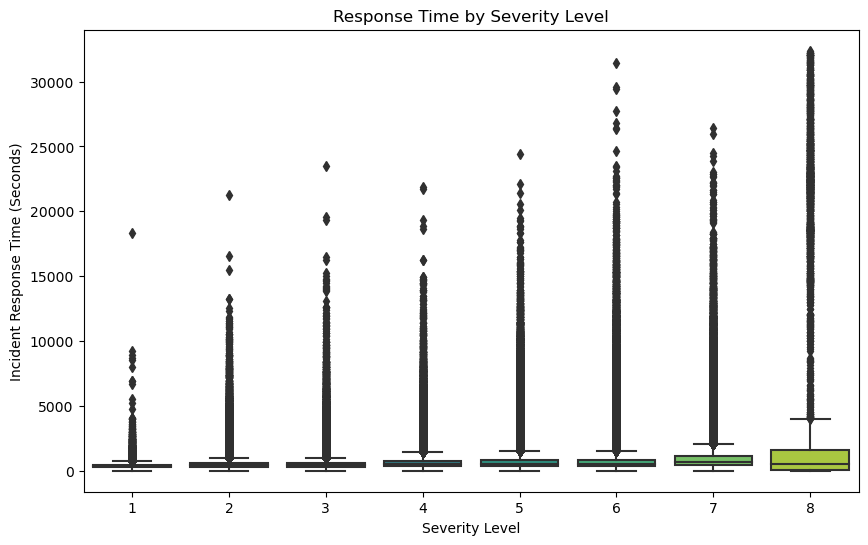

In [ ]:
# Group by FINAL_SEVERITY_LEVEL_CODE and compute statistics
grouped = df.groupby('FINAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY']
summary_stats = grouped.describe()
print(summary_stats)

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='FINAL_SEVERITY_LEVEL_CODE', y='INCIDENT_RESPONSE_SECONDS_QY', palette="viridis")
plt.title("Response Time by Severity Level")
plt.xlabel("Severity Level")
plt.ylabel("Incident Response Time (Seconds)")
plt.show()

The box plot of **INCIDENT_RESPONSE_SECONDS_QY** grouped by FINAL_SEVERITY_LEVEL_CODE shows that response times generally increase with higher severity levels. Severity level 8 stands out with the highest average response time and the widest spread, indicating more complex and resource-intensive incidents. Lower severity levels (1–3) exhibit shorter response times with minimal variability, reflecting quicker and simpler responses. This pattern emphasizes the need for optimization in high-severity cases, particularly for level 8, to improve efficiency and reduce delays.

#### Average Incident Response Time by Final Severity Level

In [ ]:
# Aggregate Data
avg_response_time = df.groupby('FINAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by Final Severity Level', fontsize=14)
plt.xlabel('Final Severity Level Code', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

The plot shows that higher severity levels correspond to longer response times. Levels 1–3 average under 500 seconds, while levels 4–7 steadily increase. Level 8 stands out with over 4,500 seconds, highlighting resource or logistical challenges. This emphasizes the need to optimize responses for critical incidents.

#### Response Time by Validity Indicator

                                    count        mean         std  min    25%  \
VALID_INCIDENT_RSPNS_TIME_INDC                                                  
N                                     0.0         NaN         NaN  NaN    NaN   
Y                               3040774.0  669.913063  866.132657  0.0  336.0   

                                  50%    75%      max  
VALID_INCIDENT_RSPNS_TIME_INDC                         
N                                 NaN    NaN      NaN  
Y                               486.0  722.0  32379.0  


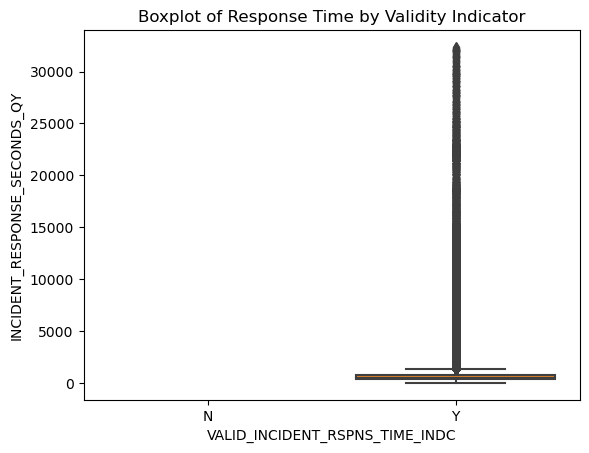

In [ ]:
# Grouped Summary Statistics
summary = df.groupby('VALID_INCIDENT_RSPNS_TIME_INDC')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(summary)

# Boxplot
sns.boxplot(x='VALID_INCIDENT_RSPNS_TIME_INDC', y='INCIDENT_RESPONSE_SECONDS_QY', data=df)
plt.title('Boxplot of Response Time by Validity Indicator')
plt.show()

The box plot for **VALID_INCIDENT_RSPNS_TIME_INDC** illustrates response times only for valid records (Y). The data shows a median response time of 486 seconds, with the majority of incidents falling between 336 and 722 seconds. A few extreme outliers push the maximum to 32,379 seconds. No response times are recorded for invalid entries (N).

#### Response Time by Held Indicator

                    count         mean          std  min    25%     50%  \
HELD_INDICATOR                                                            
N               2749765.0   542.897921   528.422704  0.0  324.0   460.0   
Y                291009.0  1870.088286  1899.322355  0.0  787.0  1328.0   

                   75%      max  
HELD_INDICATOR                   
N                652.0  32240.0  
Y               2261.0  32379.0  


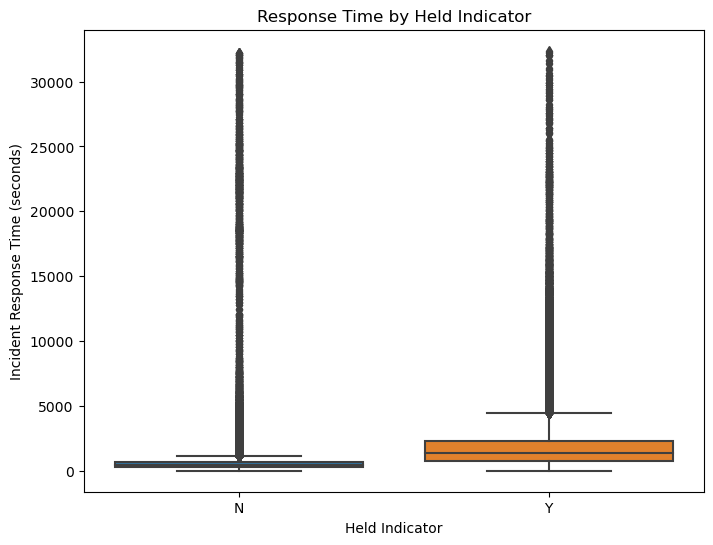

In [ ]:
# Group data by 'HELD_INDICATOR' and calculate statistics
grouped_stats = df.groupby('HELD_INDICATOR')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='HELD_INDICATOR', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by Held Indicator")
plt.xlabel("Held Indicator")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The box plot for **HELD_INDICATOR** reveals significant differences in response times based on whether incidents were held (Y) or not (N). Incidents marked as held have a median response time of 1328 seconds, much higher than the 460 seconds for non-held incidents. The held incidents also show a broader range, with the 75th percentile at 2261 seconds compared to 652 seconds for non-held incidents.

#### Incident Response Time by Borough

In [ ]:
stats = df.groupby('BOROUGH')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(stats)

# 2. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title('Incident Response Time by Borough')
plt.xlabel('Borough')
plt.ylabel('Response Time (seconds)')
plt.show()

                             count         mean           std  min    25%  \
BOROUGH                                                                     
BRONX                     712686.0   709.324078    853.825251  0.0  355.0   
BROOKLYN                  834556.0   645.388280    768.382477  0.0  336.0   
MANHATTAN                 742414.0   748.880133   1145.482986  0.0  321.0   
QUEENS                    621974.0   588.945165    617.192951  0.0  337.0   
RICHMOND / STATEN ISLAND  129138.0   546.694660    589.427265  0.0  322.0   
UNKNOWN                        6.0  4915.666667  10333.510510  0.0  106.0   

                            50%      75%      max  
BOROUGH                                            
BRONX                     511.0   758.00  32100.0  
BROOKLYN                  481.0   712.00  32022.0  
MANHATTAN                 477.0   762.00  32222.0  
QUEENS                    481.0   684.00  32379.0  
RICHMOND / STATEN ISLAND  452.0   637.00  32064.0  
UNKNOWN            

The box plot comparing incident response times across boroughs highlights notable differences. Staten Island has the shortest average response time (546.7 seconds), suggesting efficient handling or fewer delays. In contrast, Manhattan has the longest average response time among well-represented boroughs (748.9 seconds), potentially due to higher complexity or traffic challenges.

Queens and Brooklyn show similar response times, with median values close to 480 seconds. The "UNKNOWN" category has an extremely high mean, likely due to data irregularities.

#### Response Time by Dispatch Area

                           count         mean          std   min    25%  \
INCIDENT_DISPATCH_AREA                                                    
B1                      174416.0   727.537703   885.481362   0.0  351.0   
B2                      211984.0   709.537338   875.108756   0.0  347.0   
B3                      138027.0   691.982547   824.941361   0.0  362.0   
B4                       87726.0   708.511958   783.749502   0.0  373.0   
B5                      100302.0   700.436591   827.020344   0.0  351.0   
CW                         318.0  3796.606918  7632.964227   0.0    0.0   
K1                      128945.0   567.296979   595.896754   0.0  318.0   
K2                      110768.0   520.453597   569.072060   0.0  290.0   
K3                       91427.0   648.862874   737.379714   0.0  348.0   
K4                      206254.0   763.307364   886.708641   0.0  377.0   
K5                       73546.0   675.323240   855.124231   0.0  374.0   
K6                      1

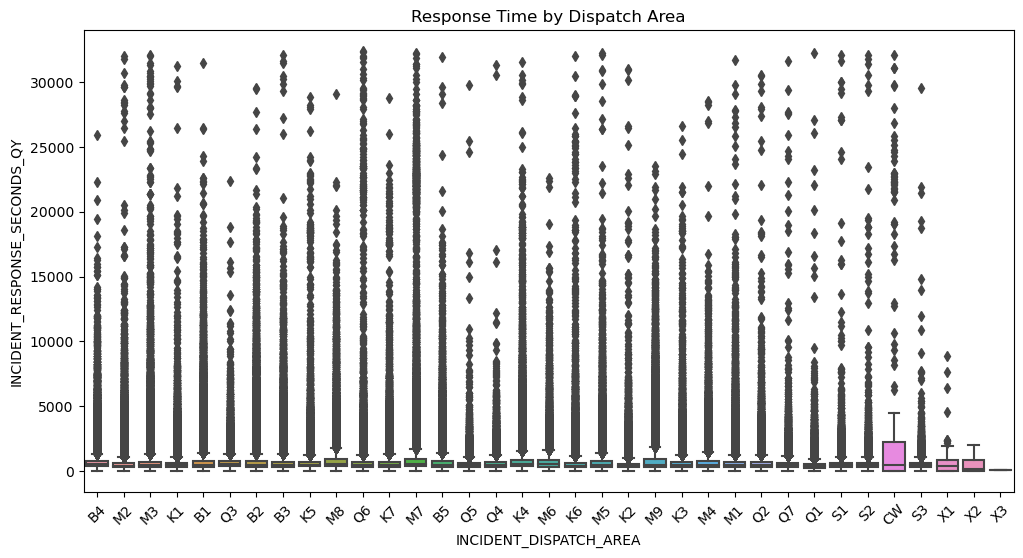

In [ ]:
area_stats = df.groupby('INCIDENT_DISPATCH_AREA')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(area_stats)

# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='INCIDENT_DISPATCH_AREA', y='INCIDENT_RESPONSE_SECONDS_QY', data=df)
plt.xticks(rotation=45)
plt.title('Response Time by Dispatch Area')
plt.show()

The boxplot displays the distribution of response times across dispatch areas. The mean response times vary widely, ranging from 87 seconds (X3) to 3796.61 seconds (CW). Most dispatch areas have consistent response times within the interquartile range, with outliers extending beyond 30,000 seconds. The variation in response times highlights the operational differences or incident complexities across dispatch areas, with areas like CW showing significantly higher response times.

#### Response Time by ZIP Code

           count         mean          std    min     25%    50%      75%  \
ZIPCODE                                                                     
83.0         5.0   721.800000   659.369547  266.0  364.00  488.0   613.00   
10000.0    522.0   895.392720   970.394437    0.0  450.50  687.5  1025.00   
10001.0  34844.0   657.250832   832.148134    0.0  322.00  456.0   685.00   
10002.0  36888.0   620.845939   764.747989    0.0  320.00  449.0   659.00   
10003.0  25663.0   560.895569   688.243733    0.0  287.00  401.0   587.00   
...          ...          ...          ...    ...     ...    ...      ...   
11693.0   5004.0   440.326339   527.163348    0.0  242.00  348.0   498.00   
11694.0   7012.0   475.678836   566.438831    0.0  251.00  349.0   547.00   
11695.0     52.0   717.307692   467.574028    0.0  501.00  623.0   781.25   
11697.0    608.0  1064.837171  1647.780477    0.0  682.75  851.0  1089.75   
12345.0      6.0   467.833333   242.846797  207.0  302.75  407.0   608.00   

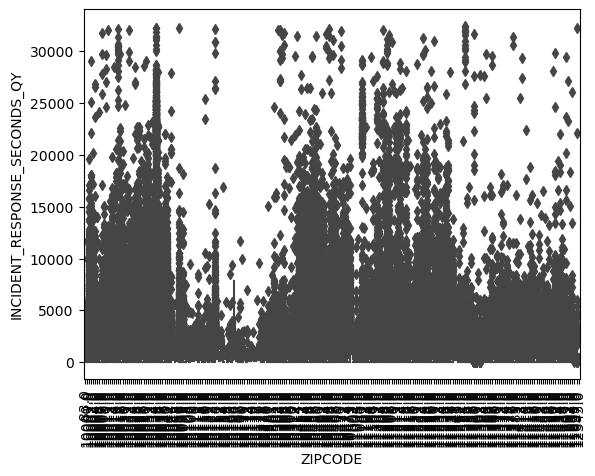

In [ ]:
grouped = df.groupby('ZIPCODE')['INCIDENT_RESPONSE_SECONDS_QY']

# Compute statistics
summary = grouped.describe()
print(summary)

sns.boxplot(x='ZIPCODE', y='INCIDENT_RESPONSE_SECONDS_QY', data=df)
plt.xticks(rotation=90)  # Rotate ZIP code labels for better readability
plt.show()

The scatter plot of INCIDENT_RESPONSE_SECONDS_QY across ZIP codes shows most response times below 5,000 seconds, with some outliers exceeding 30,000 seconds. ZIP Code 11697 has the highest average response time (1064.84 seconds) and outliers up to 32,240 seconds, indicating potential logistical challenges. Variations in response efficiency across ZIP codes suggest opportunities for targeted resource optimization.

#### Incident Response Time by Police Precinct

                  count        mean         std  min    25%    50%     75%  \
POLICEPRECINCT                                                               
1.0             31907.0  610.337167  815.597056  0.0  296.0  429.0  651.00   
5.0             32692.0  687.531720  882.800626  0.0  342.0  487.0  723.25   
6.0             24982.0  585.403010  672.973480  0.0  301.0  433.0  638.00   
7.0             26618.0  630.246149  759.033658  0.0  324.0  455.0  671.00   
9.0             36353.0  584.297362  714.361952  0.0  297.0  421.0  621.00   
...                 ...         ...         ...  ...    ...    ...     ...   
115.0           40494.0  584.327431  466.855433  0.0  352.0  499.0  688.00   
120.0           45463.0  534.823593  603.941808  0.0  305.0  437.0  622.00   
121.0           31366.0  561.707231  498.052496  0.0  342.0  473.0  660.75   
122.0           34797.0  534.116792  615.434345  0.0  315.0  440.0  625.00   
123.0           16467.0  571.862088  598.306538  0.0  348.0  475

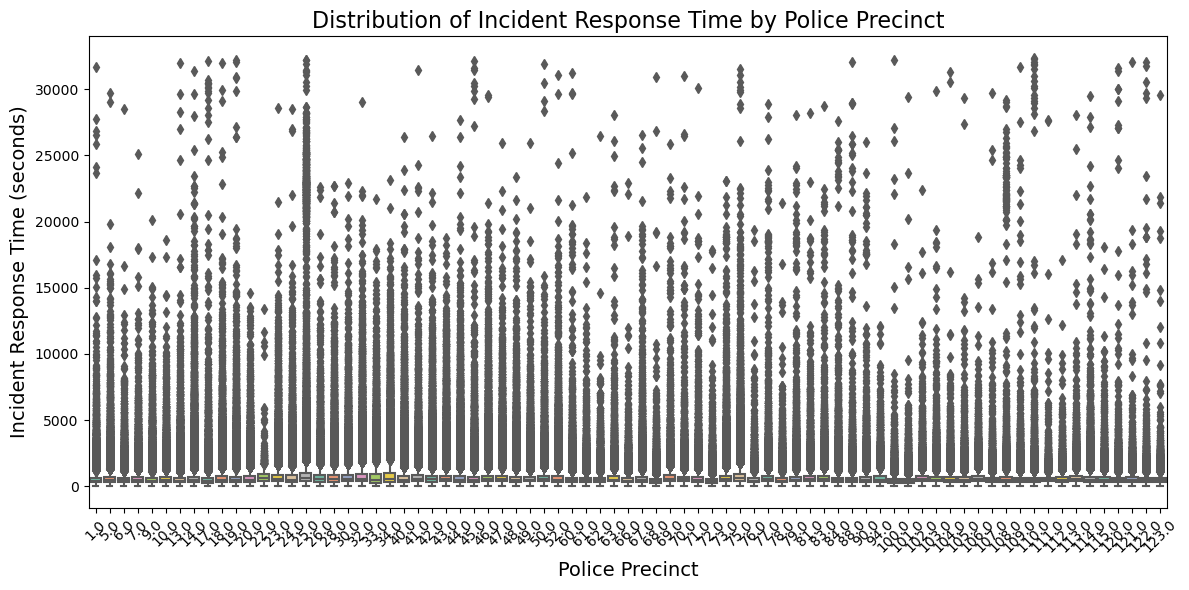

In [ ]:
stats = df.groupby('POLICEPRECINCT')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(stats)

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='POLICEPRECINCT', y='INCIDENT_RESPONSE_SECONDS_QY', palette='Set2')
plt.title('Distribution of Incident Response Time by Police Precinct', fontsize=16)
plt.xlabel('Police Precinct', fontsize=14)
plt.ylabel('Incident Response Time (seconds)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The box plot shows response times by precinct, mostly below 5,000 seconds, with outliers exceeding 30,000 seconds. Precinct 1 averages 610s, Precinct 5 688s, and Precinct 120 535s, indicating varying efficiency across precincts.

#### Average Incident Response Time by POLICEPRECINCT

In [ ]:
# Aggregate Data
avg_response_time = df.groupby('POLICEPRECINCT')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Summary Statistics
print(f"Mean: {avg_response_time.mean():.2f} seconds")
print(f"Median: {avg_response_time.median():.2f} seconds")
print(f"Std Dev: {avg_response_time.std():.2f} seconds")
print(f"Min: {avg_response_time.min():.2f} seconds")
print(f"Max: {avg_response_time.max():.2f} seconds")

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by POLICEPRECINCT', fontsize=14)
plt.xlabel('POLICEPRECINCT', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Mean: 660.22 seconds
Median: 652.13 seconds
Std Dev: 115.50 seconds
Min: 467.21 seconds
Max: 1122.20 seconds


The average response times across police precincts show moderate variability, with a mean of 660.22 seconds and a standard deviation of 115.50 seconds. Most precincts have consistent response times around the median of 652.13 seconds, while a few outliers reach up to 1122.20 seconds.

#### Average Incident Response Time by CITYCOUNCILDISTRICT

In [ ]:
# Aggregate Data
avg_response_time = df.groupby('CITYCOUNCILDISTRICT')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Display overall statistics
print(f"Mean: {avg_response_time.mean():.2f} seconds")
print(f"Median: {avg_response_time.median():.2f} seconds")
print(f"Std Dev: {avg_response_time.std():.2f} seconds")
print(f"Min: {avg_response_time.min():.2f} seconds")
print(f"Max: {avg_response_time.max():.2f} seconds")

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by CITYCOUNCILDISTRICT', fontsize=14)
plt.xlabel('CITYCOUNCILDISTRICT', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

Mean: 645.15 seconds
Median: 637.93 seconds
Std Dev: 100.14 seconds
Min: 484.65 seconds
Max: 904.12 seconds


The bar plot for **INCIDENT_RESPONSE_SECONDS_QY** by **CITYCOUNCILDISTRICT** highlights notable variations in average response times across districts. Districts generally cluster around the mean of 645.15 seconds, but a few districts, such as those near the maximum of 904.12 seconds, exhibit significantly higher response times, likely due to localized challenges or logistical constraints. Conversely, districts with times closer to the minimum of 484.65 seconds suggest more efficient operations. The relatively consistent spread, with a standard deviation of 100.14 seconds, indicates similar response protocols citywide.





#### Average Incident Response Time by COMMUNITYDISTRICT

Mean: 676.05 seconds
Median: 667.48 seconds
Std Dev: 128.25 seconds
Min: 470.01 seconds
Max: 1177.91 seconds


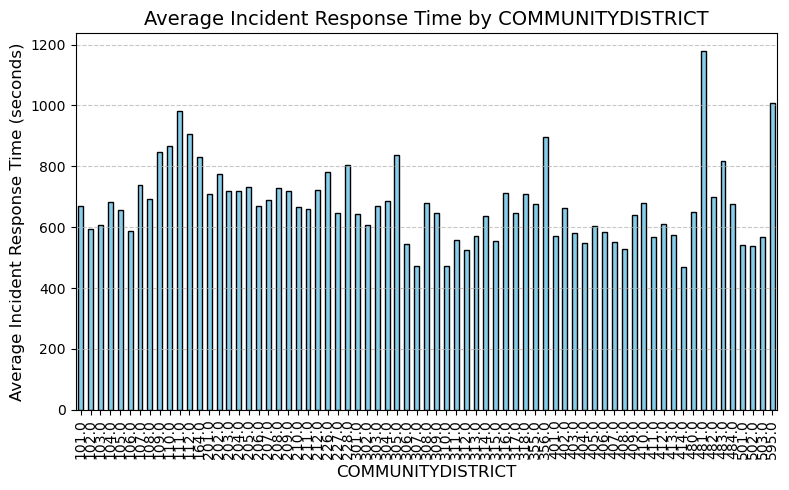

In [ ]:
# Aggregate Data
avg_response_time = df.groupby('COMMUNITYDISTRICT')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Summary Statistics
print(f"Mean: {avg_response_time.mean():.2f} seconds")
print(f"Median: {avg_response_time.median():.2f} seconds")
print(f"Std Dev: {avg_response_time.std():.2f} seconds")
print(f"Min: {avg_response_time.min():.2f} seconds")
print(f"Max: {avg_response_time.max():.2f} seconds")

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by COMMUNITYDISTRICT', fontsize=14)
plt.xlabel('COMMUNITYDISTRICT', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


The bar plot for **Average Incident Response Time by COMMUNITYDISTRICT** highlights notable variations in average response times across districts. Most districts cluster around the mean of 676.05 seconds, with a few districts, such as those near the maximum of 1177.91 seconds, showing significantly higher response times, possibly due to localized challenges or inefficiencies. Conversely, districts with response times closer to the minimum of 470.01 seconds suggest more effective operations. The moderate spread, indicated by a standard deviation of 128.25 seconds, points to generally consistent response times citywide, with a few exceptions.

#### Average Incident Response Time by COMMUNITYSCHOOLDISTRICT

In [ ]:
# Aggregate Data: Mean Response Time by COMMUNITYSCHOOLDISTRICT
avg_response_time = df.groupby('COMMUNITYSCHOOLDISTRICT')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Display overall statistics
print(f"Mean: {avg_response_time.mean():.2f} seconds")
print(f"Median: {avg_response_time.median():.2f} seconds")
print(f"Std Dev: {avg_response_time.std():.2f} seconds")
print(f"Min: {avg_response_time.min():.2f} seconds")
print(f"Max: {avg_response_time.max():.2f} seconds")

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by COMMUNITYSCHOOLDISTRICT', fontsize=14)
plt.xlabel('COMMUNITYSCHOOLDISTRICT', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Mean: 670.46 seconds
Median: 655.22 seconds
Std Dev: 113.93 seconds
Min: 503.48 seconds
Max: 1020.30 seconds


The bar plot for **Average Incident Response Time by COMMUNITYSCHOOLDISTRICT** shows most districts clustering around the mean of 670.46 seconds, with some outliers near the maximum of 1020.30 seconds, likely due to localized issues. Districts closer to the minimum of 503.48 seconds indicate more efficient operations, with moderate variability reflected by a standard deviation of 113.93 seconds.

#### Average Incident Response Time by CONGRESSIONALDISTRICT

Mean: 648.44 seconds
Median: 642.41 seconds
Std Dev: 82.35 seconds
Min: 539.06 seconds
Max: 831.18 seconds


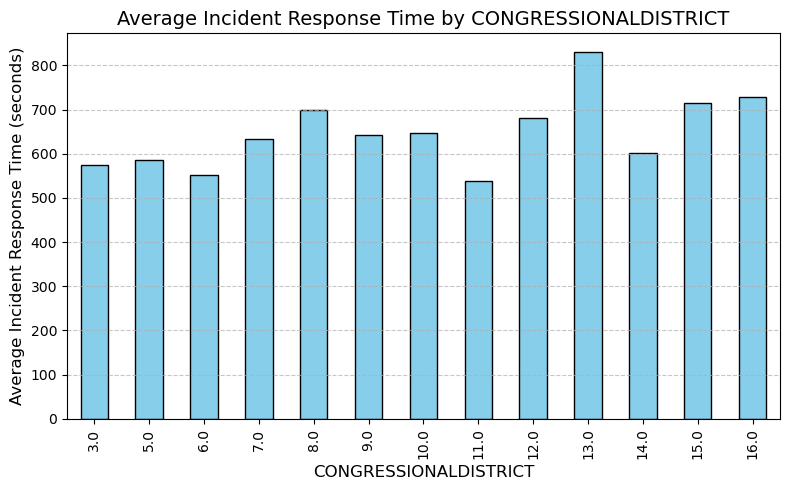

In [ ]:
# Aggregate Data: Mean Response Time by CONGRESSIONALDISTRICT
avg_response_time = df.groupby('CONGRESSIONALDISTRICT')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Display overall statistics
print(f"Mean: {avg_response_time.mean():.2f} seconds")
print(f"Median: {avg_response_time.median():.2f} seconds")
print(f"Std Dev: {avg_response_time.std():.2f} seconds")
print(f"Min: {avg_response_time.min():.2f} seconds")
print(f"Max: {avg_response_time.max():.2f} seconds")

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by CONGRESSIONALDISTRICT', fontsize=14)
plt.xlabel('CONGRESSIONALDISTRICT', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


The bar plot for **Average Incident Response Time by CONGRESSIONALDISTRICT** shows most districts clustering around the mean of 648.44 seconds, with a few outliers near the maximum of 831.18 seconds, likely reflecting localized issues. Districts near the minimum of 539.06 seconds suggest more efficient response times, with low variability indicated by a standard deviation of 82.35 seconds.

#### Response Time by SPECIAL_EVENT Indicator

                             count          mean           std  min    25%  \
SPECIAL_EVENT_INDICATOR                                                      
N                        3040687.0    669.561894    861.146110  0.0  336.0   
Y                             87.0  12943.436782  12365.166649  0.0   38.0   

                             50%      75%      max  
SPECIAL_EVENT_INDICATOR                             
N                          486.0    722.0  32306.0  
Y                        11796.0  25369.5  32379.0  


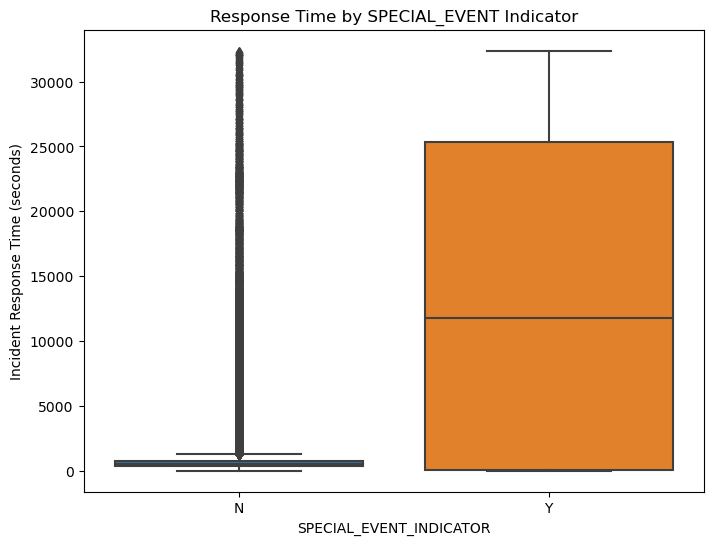

In [ ]:
# Group data by 'SPECIAL_EVENT_INDICATOR' and calculate statistics
grouped_stats = df.groupby('SPECIAL_EVENT_INDICATOR')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='SPECIAL_EVENT_INDICATOR', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by SPECIAL_EVENT Indicator")
plt.xlabel("SPECIAL_EVENT_INDICATOR")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The box plot shows significantly higher response times for special events (Y), with a median of 11,796 seconds, compared to regular incidents (N), which have a median of 486 seconds. Special events also exhibit a wider spread, indicating logistical challenges, while regular incidents show more consistent response times.

#### Response Time by TRANSFER Indicator

                        count        mean         std  min    25%    50%  \
TRANSFER_INDICATOR                                                         
N                   3040761.0  669.912818  866.132929  0.0  336.0  486.0   
Y                        13.0  727.230769  830.621570  0.0  290.0  541.0   

                      75%      max  
TRANSFER_INDICATOR                  
N                   722.0  32379.0  
Y                   794.0   3139.0  


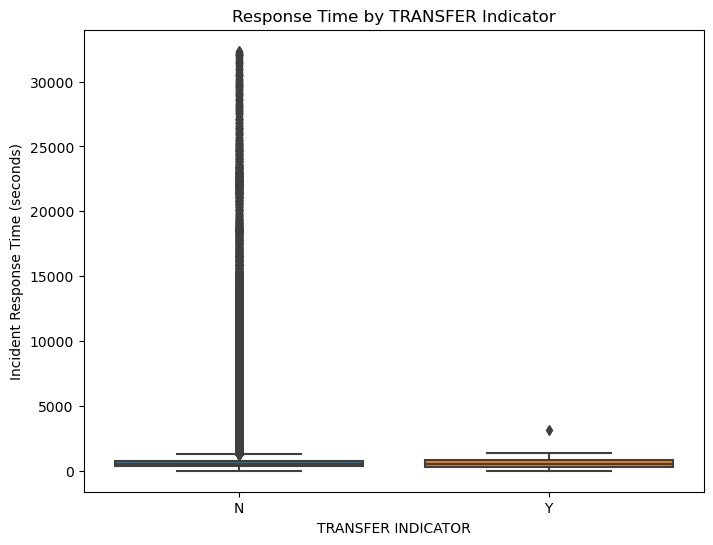

In [ ]:
# Group data by 'TRANSFER_INDICATOR' and calculate statistics
grouped_stats = df.groupby('TRANSFER_INDICATOR')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='TRANSFER_INDICATOR', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by TRANSFER Indicator")
plt.xlabel("TRANSFER INDICATOR")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The boxplot shows that incidents without a transfer (`N`) dominate with a median response time of **486 seconds** and significant variability, including outliers up to **32,379 seconds**, while transfer cases (`Y`) are rare, with a slightly higher median of **541 seconds** and less variability. Transfer cases generally take longer, likely due to added coordination, while the wide range in non-transfer cases highlights the need to address inconsistencies and reduce extreme delays.

                   count        mean          std  min    25%    50%    75%  \
incident_month                                                                
1               249407.0  621.578067   851.357517  0.0  329.0  469.0  677.0   
2               218132.0  556.277167   565.225322  0.0  320.0  451.0  641.0   
3               245360.0  570.155620   647.109769  0.0  322.0  456.0  652.0   
4               239131.0  560.403783   585.535120  0.0  319.0  452.0  645.0   
5               264599.0  661.216584   842.443688  0.0  338.0  488.0  722.0   
6               259920.0  679.777585   894.167160  0.0  337.0  489.0  731.0   
7               272261.0  670.779065   837.723324  0.0  334.0  488.0  736.0   
8               264529.0  665.569544   848.076414  0.0  334.0  485.0  727.0   
9               253286.0  727.876227  1000.696079  0.0  344.0  503.0  771.0   
10              261561.0  741.287279   993.666247  0.0  348.0  508.0  779.0   
11              250635.0  713.481689   919.478393  0

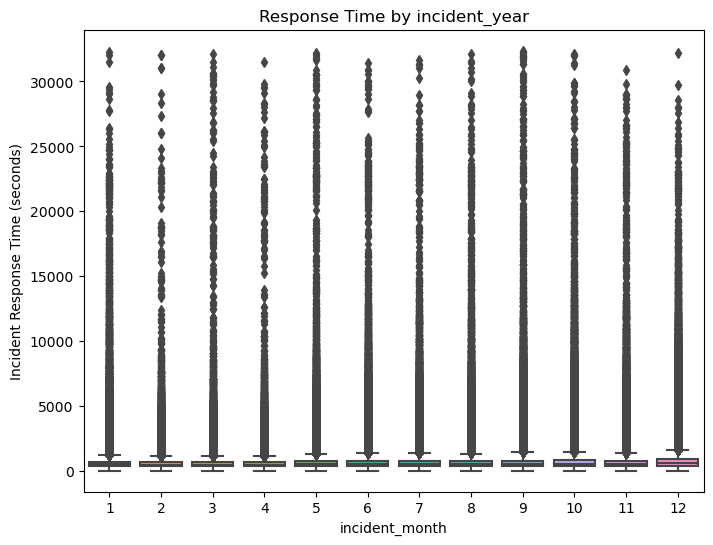

In [ ]:
# Group data by 'incident_month' and calculate statistics
grouped_stats = df.groupby('incident_month')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='incident_month', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by incident_year")
plt.xlabel("incident_month")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The boxplot shows longer and more variable EMS response times in late months like **December** (mean: 837 seconds) compared to earlier months like **February** (mean: 556 seconds). High variability in **September** and **December**, with maximum times exceeding **32,000 seconds**, indicates seasonal challenges. Median response times steadily increase through the year, suggesting the need for better resource planning during peak-demand months.

                     count        mean         std  min    25%    50%    75%  \
incident_weekday                                                               
0                 440635.0  680.376523  837.387345  0.0  339.0  492.0  737.0   
1                 434443.0  646.678987  828.391753  0.0  333.0  479.0  705.0   
2                 439447.0  672.292925  908.840170  0.0  335.0  484.0  718.0   
3                 438064.0  675.456801  888.496983  0.0  339.0  489.0  728.0   
4                 448471.0  701.473422  905.783618  0.0  344.0  499.0  751.0   
5                 429120.0  652.211573  856.414310  0.0  333.0  479.0  708.0   
6                 410594.0  658.834330  828.195438  0.0  330.0  477.0  709.0   

                      max  
incident_weekday           
0                 32197.0  
1                 32379.0  
2                 32306.0  
3                 32064.0  
4                 32115.0  
5                 32222.0  
6                 31660.0  


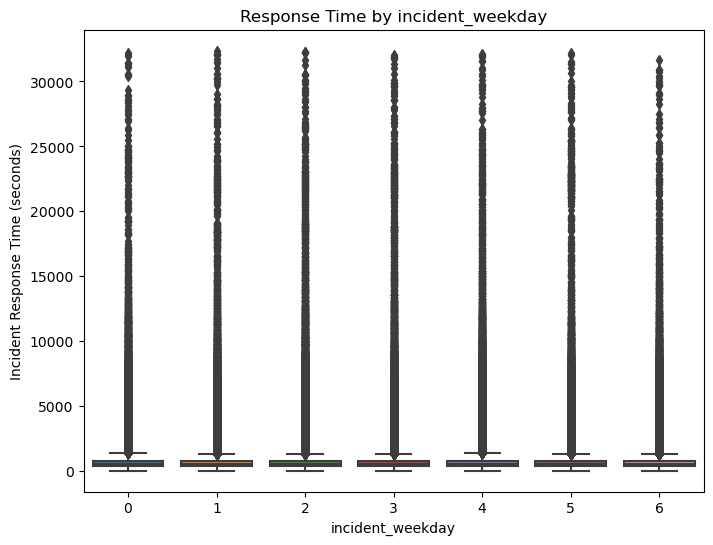

In [ ]:
# Group data by 'incident_weekday' and calculate statistics
grouped_stats = df.groupby('incident_weekday')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='incident_weekday', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by incident_weekday")
plt.xlabel("incident_weekday")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The box plot shows similar response times for transfer-related incidents (Y) and regular incidents (N). Regular incidents have a median of 486 seconds and exhibit high variability with extreme outliers up to 32,379 seconds. Transfer incidents have a median of 541 seconds with less variability, as shown by a maximum of 3,139 seconds, indicating more controlled response operations for transfers.






#### Response Time by incident_year

                   count        mean         std  min    25%    50%    75%  \
incident_year                                                                
2022           1526966.0  619.642499  733.849474  0.0  332.0  475.0  691.0   
2023           1513808.0  720.620579  979.058895  0.0  341.0  497.0  759.0   

                   max  
incident_year           
2022           32306.0  
2023           32379.0  


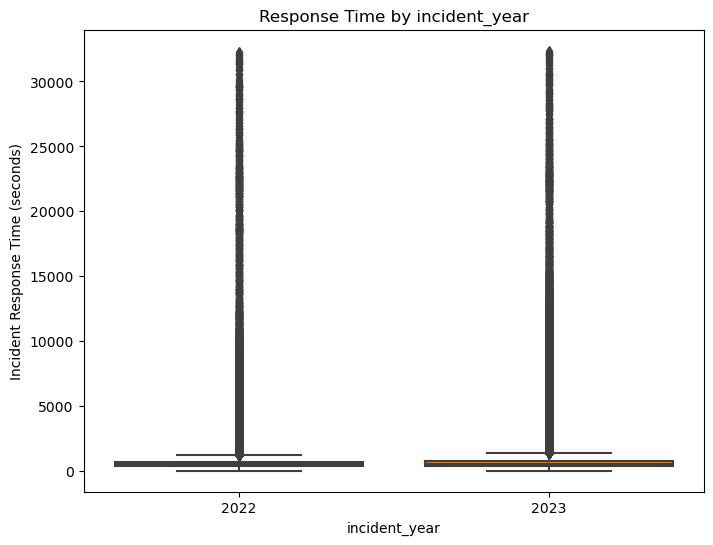

In [ ]:
# Group data by 'incident_year' and calculate statistics
grouped_stats = df.groupby('incident_year')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='incident_year', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by incident_year")
plt.xlabel("incident_year")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The response times for 2022 and 2023 appear quite similar overall, with comparable distributions and ranges. The median response times are close, at 475 seconds for 2022 and 497 seconds for 2023, and the means differ with 619.64 seconds in 2022 and 720.62 seconds in 2023. The interquartile ranges are also consistent, and both years exhibit extreme outliers, with maximum response times exceeding 32,000 seconds. This suggests stable response patterns across the two years, with only a minor increase in average response time observed in 2023.

#### Response Time by Incident Month

                   count        mean          std  min    25%    50%    75%  \
incident_month                                                                
1               249407.0  621.578067   851.357517  0.0  329.0  469.0  677.0   
2               218132.0  556.277167   565.225322  0.0  320.0  451.0  641.0   
3               245360.0  570.155620   647.109769  0.0  322.0  456.0  652.0   
4               239131.0  560.403783   585.535120  0.0  319.0  452.0  645.0   
5               264599.0  661.216584   842.443688  0.0  338.0  488.0  722.0   
6               259920.0  679.777585   894.167160  0.0  337.0  489.0  731.0   
7               272261.0  670.779065   837.723324  0.0  334.0  488.0  736.0   
8               264529.0  665.569544   848.076414  0.0  334.0  485.0  727.0   
9               253286.0  727.876227  1000.696079  0.0  344.0  503.0  771.0   
10              261561.0  741.287279   993.666247  0.0  348.0  508.0  779.0   
11              250635.0  713.481689   919.478393  0

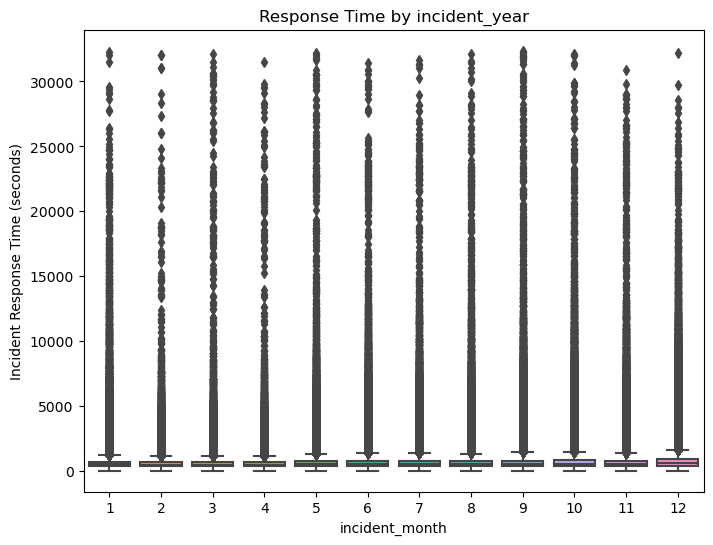

In [ ]:
# Group data by 'incident_month' and calculate statistics
grouped_stats = df.groupby('incident_month')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='incident_month', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by incident_year")
plt.xlabel("incident_month")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The box plot for **Incident Response Time by incident_month** shows monthly variations in response times. The median response time ranges from 451 seconds (February) to 547 seconds (December), with December having the highest mean (837.45 seconds) and variability, indicated by a larger spread and standard deviation (1116.37 seconds). Outliers are present across all months, with maximum values exceeding 32,000 seconds. Months like February and March exhibit relatively lower response times, suggesting seasonal or operational factors may influence efficiency.

#### Response Time by Incident Weekday

                     count        mean         std  min    25%    50%    75%  \
incident_weekday                                                               
0                 440635.0  680.376523  837.387345  0.0  339.0  492.0  737.0   
1                 434443.0  646.678987  828.391753  0.0  333.0  479.0  705.0   
2                 439447.0  672.292925  908.840170  0.0  335.0  484.0  718.0   
3                 438064.0  675.456801  888.496983  0.0  339.0  489.0  728.0   
4                 448471.0  701.473422  905.783618  0.0  344.0  499.0  751.0   
5                 429120.0  652.211573  856.414310  0.0  333.0  479.0  708.0   
6                 410594.0  658.834330  828.195438  0.0  330.0  477.0  709.0   

                      max  
incident_weekday           
0                 32197.0  
1                 32379.0  
2                 32306.0  
3                 32064.0  
4                 32115.0  
5                 32222.0  
6                 31660.0  


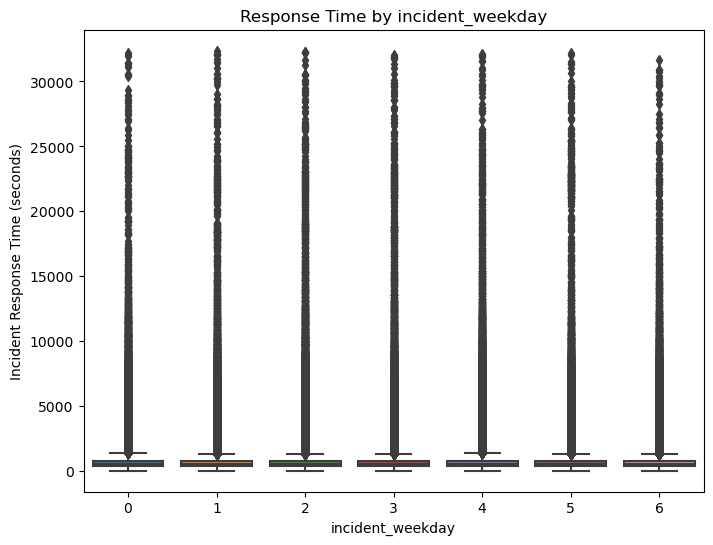

In [ ]:
# Group data by 'incident_weekday' and calculate statistics
grouped_stats = df.groupby('incident_weekday')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='incident_weekday', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by incident_weekday")
plt.xlabel("incident_weekday")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The box plot for **Incident Response Time by incident_weekday** shows consistent response patterns throughout the week. Median response times range from 477 seconds (Saturday) to 499 seconds (Thursday), with Thursday having the highest mean response time (701.47 seconds) and variability, indicated by a standard deviation of 905.78 seconds. Outliers are present across all days, with maximum response times exceeding 32,000 seconds. Weekends (Saturday and Sunday) generally exhibit slightly lower response times compared to weekdays, suggesting possible differences in operational demand or traffic conditions.

#### Relationship between Total Minutes and Response Time

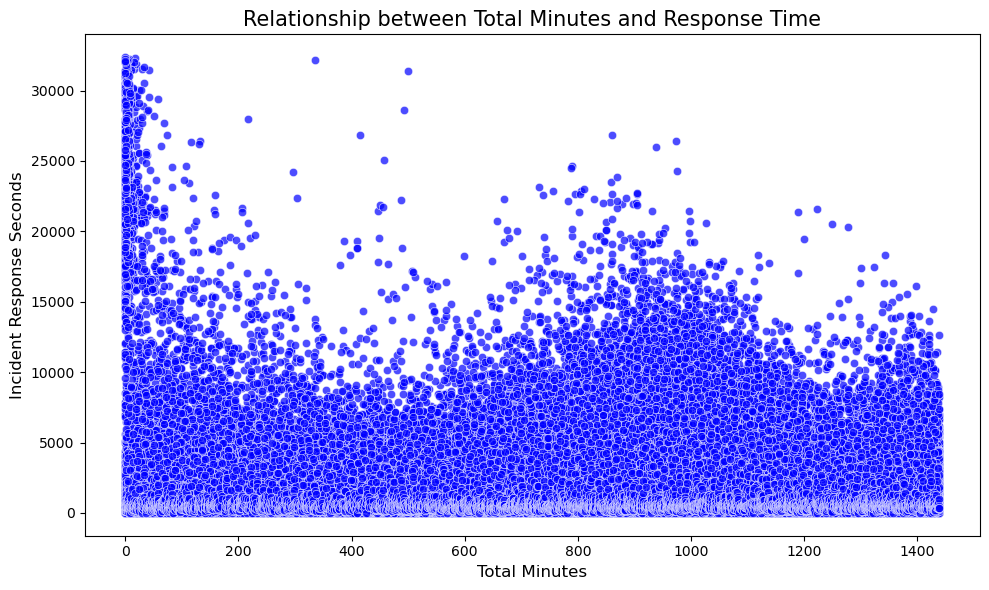

In [ ]:
# Scatter plot for numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_minutes', y='INCIDENT_RESPONSE_SECONDS_QY', alpha=0.7, color='blue')
plt.title('Relationship between Total Minutes and Response Time', fontsize=15)
plt.xlabel('Total Minutes', fontsize=12)
plt.ylabel('Incident Response Seconds', fontsize=12)
plt.tight_layout()
plt.show()


The scatter plot illustrates the relationship between Total Minutes and Incident Response Time. Most incidents occur within shorter durations and have relatively consistent response times, forming a dense cluster. As Total Minutes increase, the distribution of response times becomes more scattered, but the overall trend remains relatively flat, indicating a weak relationship between the two variables. A few extreme outliers represent incidents with significantly longer response times, suggesting unique circumstances or challenges in those cases.

#### Average Response Time (Total Minutes) by Borough and Weekday

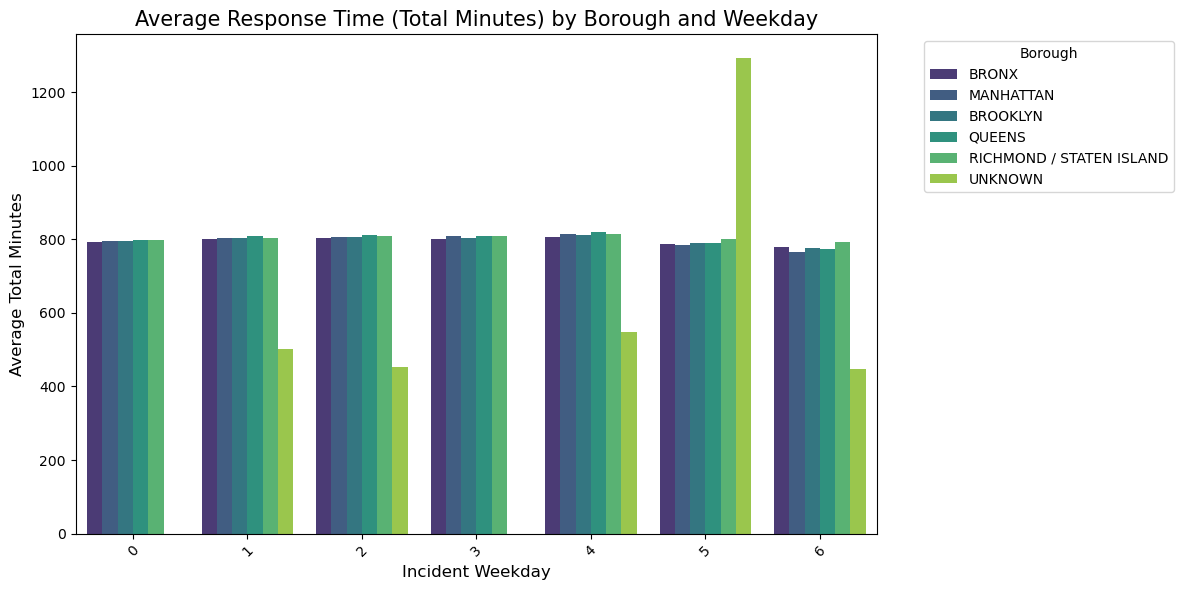

Summary Statistics for Total Minutes by Weekday and Borough:
                                              mean  median     std   min   max
incident_weekday BOROUGH                                                      
0                BRONX                      793.47   821.0  382.10     0  1439
                 BROOKLYN                   796.93   827.0  382.21     0  1439
                 MANHATTAN                  794.82   826.0  381.32     0  1439
                 QUEENS                     798.93   832.0  380.33     0  1439
                 RICHMOND / STATEN ISLAND   799.65   824.0  367.60     0  1439
1                BRONX                      801.35   829.0  378.75     0  1439
                 BROOKLYN                   802.56   832.0  380.37     0  1439
                 MANHATTAN                  804.98   837.0  377.66     0  1439
                 QUEENS                     810.09   841.0  374.44     0  1439
                 RICHMOND / STATEN ISLAND   803.96   832.0  365.46    

In [ ]:
# Bar plot for average response time by borough and weekday
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df, x='incident_weekday', y='total_minutes', hue='BOROUGH', errorbar=None, palette='viridis'
)
plt.title('Average Response Time (Total Minutes) by Borough and Weekday', fontsize=15)
plt.xlabel('Incident Weekday', fontsize=12)
plt.ylabel('Average Total Minutes', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)  # Rotate for better readability
plt.tight_layout()
plt.show()

# Generate summary statistics for 'total_minutes'
stats = df.groupby(['incident_weekday', 'BOROUGH'])['total_minutes'].agg(['mean', 'median', 'std', 'min', 'max']).round(2)

# Display the statistics
print("Summary Statistics for Total Minutes by Weekday and Borough:")
print(stats)


The bar plot shows the **average response time (in total minutes) by borough and weekday**. Response times remain fairly consistent across weekdays for most boroughs, with slight variations. Known boroughs such as the Bronx, Brooklyn, Manhattan, Queens, and Richmond/Staten Island display similar average response patterns, indicating standardized operations. However, the "Unknown" category has noticeable spikes on some days, reflecting anomalies or data inconsistencies. Richmond/Staten Island and Queens generally have higher response times, while Manhattan and Brooklyn stay relatively average.

#### Response Time by Police Precinct and Borough

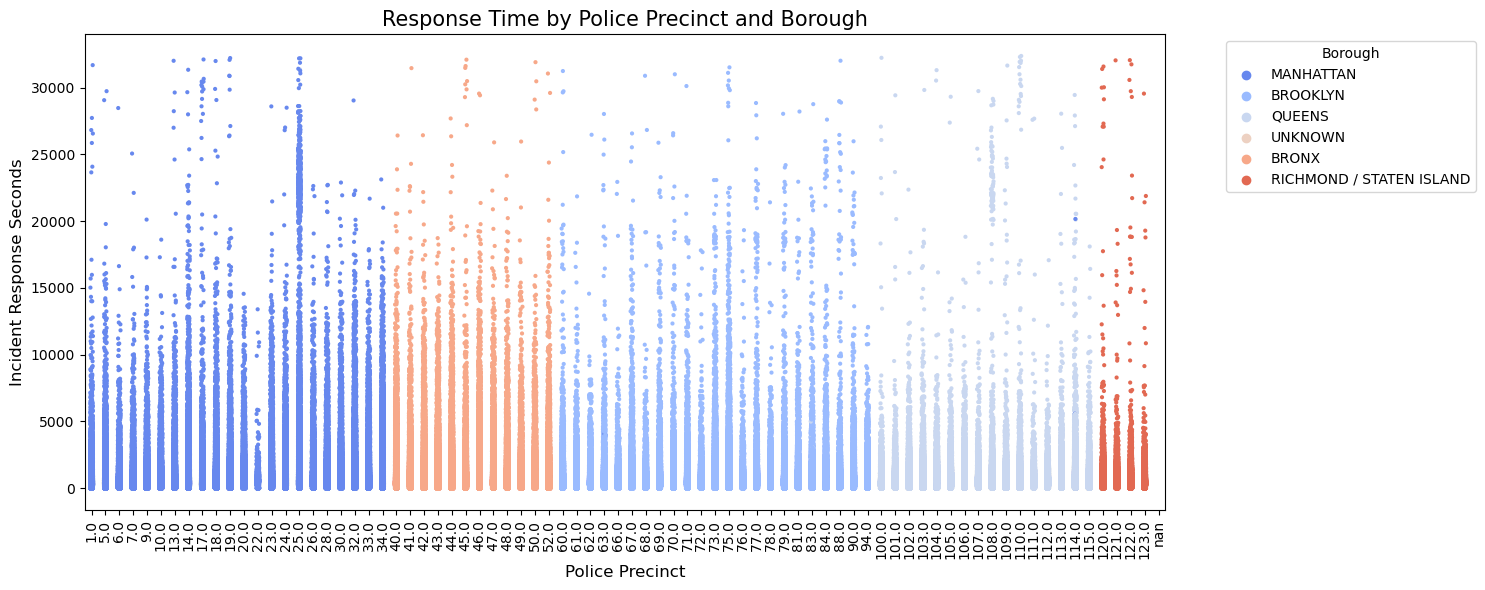

In [ ]:
plt.figure(figsize=(15, 6))
sns.stripplot(data=df, x='POLICEPRECINCT', y='INCIDENT_RESPONSE_SECONDS_QY', hue='BOROUGH', jitter=True, palette='coolwarm', size=3)
plt.title('Response Time by Police Precinct and Borough', fontsize=15)
plt.xlabel('Police Precinct', fontsize=12)
plt.ylabel('Incident Response Seconds', fontsize=12)
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The scatter plot shows response times across police precincts by borough. Manhattan, Brooklyn, and Queens have more consistent response times, while the Bronx and Richmond/Staten Island show greater variability. Outliers are present across all precincts, indicating occasional delays

#### Response Time by Dispatch Area

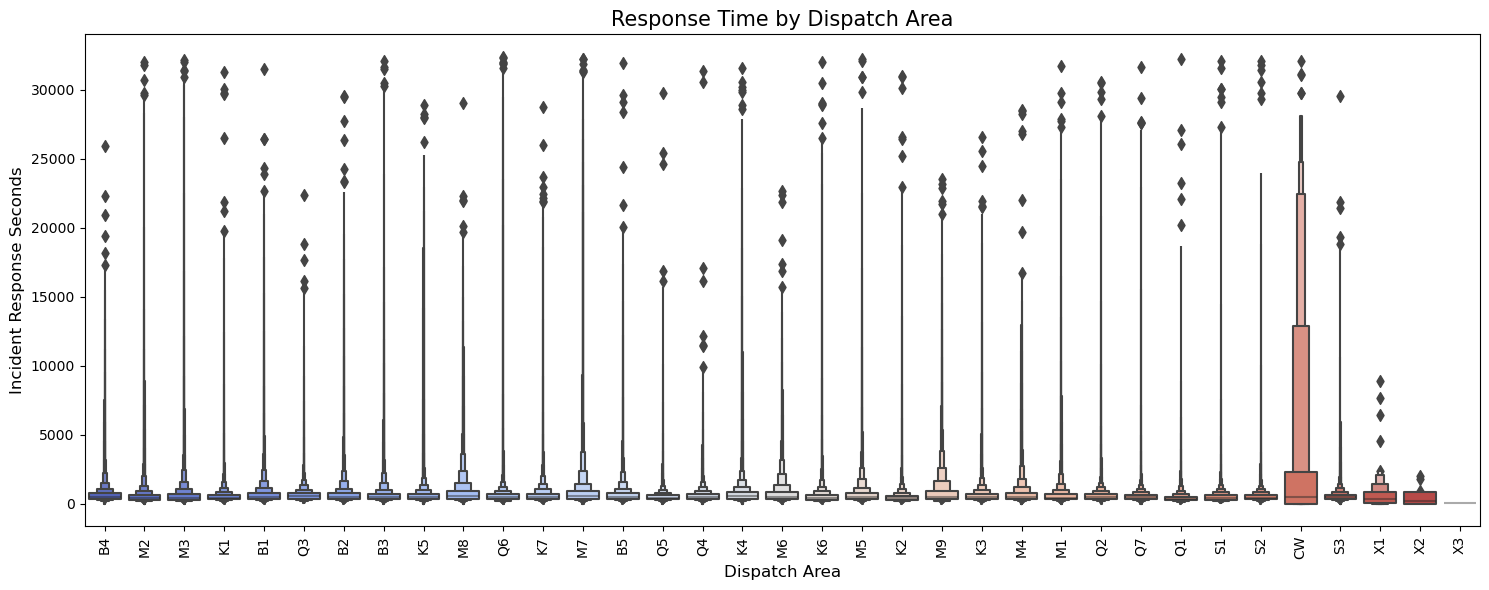

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxenplot(data=df, x='INCIDENT_DISPATCH_AREA', y='INCIDENT_RESPONSE_SECONDS_QY', palette='coolwarm')
plt.title('Response Time by Dispatch Area', fontsize=15)
plt.xlabel('Dispatch Area', fontsize=12)
plt.ylabel('Incident Response Seconds', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The box plot illustrates incident response times across different dispatch areas. Most areas show a consistent median response time with some variability, but outliers are common, indicating occasional delays. Certain dispatch areas, such as CW, exhibit significantly higher average response times and variability, suggesting unique challenges or inefficiencies. In contrast, areas like Q1 and Q5 have lower response times, reflecting more efficient operations. The presence of extreme outliers across all areas suggests occasional incidents with extended response durations. This highlights the varying performance and challenges faced by different dispatch areas.

## Data Preparation

Based on our domain knowledge and the call type we will group the data into some categories

**Note**:- For initial_call_type code and its meaning please refer (https://nycopendata.socrata.com/api/views/76xm-jjuj/files/81bbb2f5-70df-49cc-8552-f2ca8040bee8?download=true&filename=EMS_incident_dispatch_data_description.xlsx)

In [ ]:
pd.set_option('display.max_rows', None)

# Example: Showing all rows for value counts
value_counts = df['INITIAL_CALL_TYPE'].value_counts()
print("Counts of each unique value in the 'INITIAL_CALL_TYPE' column:\n", value_counts)

Counts of each unique value in the 'INITIAL_CALL_TYPE' column:
 INITIAL_CALL_TYPE
INJURY    382357
SICK      347050
UNKNOW    310333
EDP       197767
UNC       181171
DRUG      175507
CARD      144389
ABDPN     119160
CARDBR    113938
EDPC      111610
INJMAJ     98020
MVAINJ     86156
DIFFBR     80959
CDBRFC     74382
DIFFFC     52831
PEDSTR     51507
STATEP     50649
ALTMEN     46889
OTHER      42674
ARREST     41111
CVAC       34283
SICKFC     34044
RESPIR     29164
EDPM       22723
INJMIN     22581
INBLED     21152
SEIZR      18979
SICMIN     16451
STAB       14754
ANAPH      13643
ABDPFC     13366
ASTHMB     12383
RESPFC     12162
TRAUMA     11404
OBLAB      10472
CARDFC     10296
PEDFC       9107
SICPED      8442
PD13C       8442
ASTHFC      8203
OBMAJ       7606
STNDBY      7562
GYNHEM      7477
CVA         7213
SHOT        6768
HYPTN       5823
OBMIS       4763
ALTMFC      4500
GYNMAJ      4299
MCI21       4169
CHOKE       4067
BURNMI      3932
COLD        3882
ANAPFC      3834


We will create a new dataframe and will store the data in that dataframe to reduce our work time

In [ ]:
#copying it into another dataframe
df1 = df.copy()

We will create a function which will group our data and group the initial_call_type attributes values

In [ ]:
def group_initial_call_type(call_type):
    if call_type in ['INJURY', 'INJMAJ', 'INJMIN', 'TRAUMA']:
        return 'Injury/Trauma'
    elif call_type in ['SICK', 'SICKFC', 'SICMIN', 'SICPED', 'SICKRF', 'SICKFT']:
        return 'Sick Patient'
    elif call_type in ['UNKNOW', 'OTHER', 'T-UNKN', 'T-OTHR']:
        return 'Unknown/Other'
    elif call_type in ['EDP', 'EDPC', 'EDPM', 'EDPT', 'T-EDP']:
        return 'Psychiatric Emergency'
    elif call_type in ['UNC', 'UNCFC', 'UNCFT', 'UNCRF']:
        return 'Unconscious Patient'
    elif call_type in ['DRUG', 'DRUGFC', 'DRUGRF', 'DRUGFT']:
        return 'Drug/Alcohol Related'
    elif call_type in ['CARD', 'CARDBR', 'CARDFC', 'CARDFT', 'CARDRF', 'CDBRFC', 'CDBRRF', 'CDBRFT']:
        return 'Cardiac Related'
    elif call_type in ['ABDPN', 'ABDPFC', 'ABDPFT', 'ABDPRF']:
        return 'Abdominal Pain'
    elif call_type in ['MVA', 'MVAINJ', 'PEDSTR', 'T-MVAI']:
        return 'Motor Vehicle Accident'
    elif call_type in ['DIFFBR', 'DIFFFC', 'DIFFRF', 'DIFFFT', 'RESPIR', 'RESPFC', 'RESPFT', 'RESPRF']:
        return 'Respiratory Distress'
    elif call_type in ['SEIZR', 'SEIZFC', 'SEIZFT', 'SEIZRF']:
        return 'Seizure'
    elif call_type in ['ARREST', 'ARREFC', 'ARREFT', 'ARRERF']:
        return 'Cardiac Arrest'
    elif call_type in ['SHOT', 'T-SHOT', 'STAB', 'T-STAB']:
        return 'Violent Incident'
    elif call_type in ['GYNHEM', 'GYNMAJ', 'OBMIS', 'OBCOMP', 'OBLAB', 'OBMAJ', 'OBOUT']:
        return 'Obstetrics/Gynecology'
    elif call_type in ['INBLED', 'INBLFC', 'INBLFT', 'INBLRF']:
        return 'Internal Bleeding'
    elif call_type in ['BURNMI', 'BURNMA']:
        return 'Burns'
    elif call_type in ['PEDFC', 'PEDRF', 'PEDFT']:
        return 'Pediatric Emergency'
    elif call_type in ['ANAPH', 'ANAPFC', 'ANAPFT', 'ANAPRF']:
        return 'Anaphylaxis'
    elif call_type in ['CVA', 'CVAC', 'CVACFC', 'CVACFT', 'CVAFC', 'CVARF']:
        return 'Stroke'
    elif call_type in ['DROWN']:
        return 'Drowning'
    elif call_type in ['HEAT']:
        return 'Heat Exhaustion'
    elif call_type in ['MEDRXN', 'MEDRFC', 'MEDRRF', 'MEDRFT']:
        return 'Medication Reaction'
    elif call_type in ['ACTIVE', 'SPEVNT']:
        return 'Special Event/Active Shooter'
    elif call_type in ['SAFE', 'STNDBY', 'STNDBM']:
        return 'Standby/Non-Emergency'
    elif call_type in ['ELECT']:
        return 'Electrocution'
    elif call_type in ['DOA']:
        return 'Death'
    else:
        return 'Unknown/Other'

# Apply the grouping function
df1['INITIAL_CALL_TYPE_GROUPED'] = df['INITIAL_CALL_TYPE'].apply(group_initial_call_type)

# View the grouped data counts
grouped_counts = df1['INITIAL_CALL_TYPE_GROUPED'].value_counts()
print(grouped_counts)

INITIAL_CALL_TYPE_GROUPED
Unknown/Other                   524247
Injury/Trauma                   514362
Sick Patient                    407996
Cardiac Related                 344027
Psychiatric Emergency           332451
Unconscious Patient             184905
Drug/Alcohol Related            177708
Respiratory Distress            175481
Motor Vehicle Accident          139344
Abdominal Pain                  132926
Stroke                           44150
Cardiac Arrest                   42625
Obstetrics/Gynecology            38416
Internal Bleeding                23661
Violent Incident                 21730
Seizure                          19999
Anaphylaxis                      18381
Standby/Non-Emergency            10819
Pediatric Emergency               9442
Burns                             6359
Medication Reaction               4282
Heat Exhaustion                   1403
Drowning                           908
Electrocution                      710
Special Event/Active Shooter       237

Next, we will drop the original column

In [ ]:
df1.drop(columns = ['INITIAL_CALL_TYPE'],inplace = True)

We will drop some additional columns that will cause data leakage.

In [ ]:
df1.drop(columns = ['FINAL_CALL_TYPE','FINAL_SEVERITY_LEVEL_CODE','VALID_INCIDENT_RSPNS_TIME_INDC'],inplace = True)

Since we have such large dataset and do not have enough computational power so we will drop all null values

In [ ]:
#Dropping nulls
df1= df1.dropna(subset=['INCIDENT_RESPONSE_SECONDS_QY'])

In [ ]:
#checking unique values
df1.nunique()

INITIAL_SEVERITY_LEVEL_CODE         9
INCIDENT_RESPONSE_SECONDS_QY    12184
HELD_INDICATOR                      2
BOROUGH                             6
INCIDENT_DISPATCH_AREA             35
ZIPCODE                           236
POLICEPRECINCT                     77
CITYCOUNCILDISTRICT                51
COMMUNITYDISTRICT                  71
COMMUNITYSCHOOLDISTRICT            32
CONGRESSIONALDISTRICT              13
SPECIAL_EVENT_INDICATOR             2
TRANSFER_INDICATOR                  2
incident_year                       2
incident_month                     12
incident_weekday                    7
total_minutes                    1440
INITIAL_CALL_TYPE_GROUPED          26
dtype: int64

We have Unknown in Borough so we will print thoose column and try to figure out whether we can get the value using other variables

In [ ]:
df1[df1['BOROUGH'] == 'UNKNOWN']

INITIAL_SEVERITY_LEVEL_CODE  INCIDENT_RESPONSE_SECONDS_QY  \
765485                             8                       25951.0   
1150312                            6                        1117.0   
1165113                            7                         424.0   
1342799                            8                        2002.0   
1849391                            3                           0.0   
2448135                            8                           0.0   

        HELD_INDICATOR  BOROUGH INCIDENT_DISPATCH_AREA  ZIPCODE  \
765485               N  UNKNOWN                     Q7      NaN   
1150312              N  UNKNOWN                     Q2      NaN   
1165113              N  UNKNOWN                     S2      NaN   
1342799              N  UNKNOWN                     X2      NaN   
1849391              N  UNKNOWN                     CW      NaN   
2448135              N  UNKNOWN                     CW      NaN   

         POLICEPRECINCT  CITYCOUNCILDISTRICT  COMMUNITYDISTRICT  \
765485              NaN                  NaN                NaN   
1150312             NaN                  NaN                NaN   
1165113             NaN                  NaN                NaN   
1342799             NaN                  NaN                NaN   
1849391             NaN                  NaN                NaN   
2448135             NaN                  NaN                NaN   

         COMMUNITYSCHOOLDISTRICT  CONGRESSIONALDISTRICT  \
765485                       NaN                    NaN   
1150312                      NaN                    NaN   
1165113                      NaN                    NaN   
1342799                      NaN                    NaN   
1849391                      NaN                    NaN   
2448135                      NaN                    NaN   

        SPECIAL_EVENT_INDICATOR TRANSFER_INDICATOR  incident_year  \
765485                        N                  N           2022   
1150312                       N                  N           2022   
1165113                       N                  N           2022   
1342799                       Y                  N           2022   
1849391                       N                  N           2023   
2448135                       N                  N           2023   

         incident_month  incident_weekday  total_minutes  \
765485                7                 4              0   
1150312               9                 4           1143   
1165113               9                 1            502   
1342799              11                 6            447   
1849391               3                 4            700   
2448135               7                 2            453   

            INITIAL_CALL_TYPE_GROUPED  
765485          Standby/Non-Emergency  
1150312                  Sick Patient  
1165113                 Unknown/Other  
1342799  Special Event/Active Shooter  
1849391               Cardiac Related  
2448135         Standby/Non-Emergency

Since we cannot figure it out using another variables so we will drop thoose variable mainly beacuse we want to reduce the size of dataset

In [ ]:
df1 = df1[df1['BOROUGH'] != 'UNKNOWN']

In [ ]:
df1[df1['BOROUGH'] == 'UNKNOWN']

Empty DataFrame
Columns: [INITIAL_SEVERITY_LEVEL_CODE, INCIDENT_RESPONSE_SECONDS_QY, HELD_INDICATOR, BOROUGH, INCIDENT_DISPATCH_AREA, ZIPCODE, POLICEPRECINCT, CITYCOUNCILDISTRICT, COMMUNITYDISTRICT, COMMUNITYSCHOOLDISTRICT, CONGRESSIONALDISTRICT, SPECIAL_EVENT_INDICATOR, TRANSFER_INDICATOR, incident_year, incident_month, incident_weekday, total_minutes, INITIAL_CALL_TYPE_GROUPED]
Index: []

We will see the pattern of null values using missingo matrix

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df1)

# Show the plot
plt.show()

Since we do not have that much of null values in our dataset and we want to reduce size so we will drop all the nulls

In [ ]:
#Dropping the rows with missing values
df1 = df1.dropna()

Since we have a large number of categorical variables with various unique values, applying one-hot encoding would significantly increase the dimensionality and size of our dataset. Therefore, we will drop the columns containing location information and retain only one.

Note: If you have sufficient computational resources, you can include these variables for modeling purposes, as they represent different radii.

In [ ]:
df1.drop(columns = ['ZIPCODE','POLICEPRECINCT','CITYCOUNCILDISTRICT','COMMUNITYDISTRICT','CONGRESSIONALDISTRICT','INCIDENT_DISPATCH_AREA'],inplace = True)

Next we will drop incident year as this does not have any variance and will not help in our modelling work

In [ ]:
df1.drop(columns = 'incident_year',inplace = True)

In [ ]:
df1.columns

Index(['INITIAL_SEVERITY_LEVEL_CODE', 'INCIDENT_RESPONSE_SECONDS_QY',
       'HELD_INDICATOR', 'BOROUGH', 'COMMUNITYSCHOOLDISTRICT',
       'SPECIAL_EVENT_INDICATOR', 'TRANSFER_INDICATOR', 'incident_month',
       'incident_weekday', 'total_minutes', 'INITIAL_CALL_TYPE_GROUPED'],
      dtype='object')

In [ ]:
df1.head()

INITIAL_SEVERITY_LEVEL_CODE  INCIDENT_RESPONSE_SECONDS_QY HELD_INDICATOR  \
16                            2                         489.0              N   
32                            2                         437.0              N   
33                            7                         711.0              N   
38                            5                         873.0              N   
39                            4                        1817.0              Y   

     BOROUGH  COMMUNITYSCHOOLDISTRICT SPECIAL_EVENT_INDICATOR  \
16  BROOKLYN                     16.0                       N   
32  BROOKLYN                     19.0                       N   
33    QUEENS                     27.0                       N   
38     BRONX                     12.0                       N   
39  BROOKLYN                     15.0                       N   

   TRANSFER_INDICATOR  incident_month  incident_weekday  total_minutes  \
16                  N               1                 5            598   
32                  N               1                 6            551   
33                  N               1                 6            621   
38                  N               1                 6           1013   
39                  N               1                 6           1067   

   INITIAL_CALL_TYPE_GROUPED  
16      Respiratory Distress  
32       Unconscious Patient  
33     Psychiatric Emergency  
38            Abdominal Pain  
39             Unknown/Other

Next we will do One hot encoding to convert our categorical variables to numerical variables

In [ ]:
df_encoded = pd.get_dummies(df1, columns=['INITIAL_SEVERITY_LEVEL_CODE', 'BOROUGH','COMMUNITYSCHOOLDISTRICT','incident_month',
                                         'incident_weekday','INITIAL_CALL_TYPE_GROUPED'])
df_encoded.head()

INCIDENT_RESPONSE_SECONDS_QY HELD_INDICATOR SPECIAL_EVENT_INDICATOR  \
16                         489.0              N                       N   
32                         437.0              N                       N   
33                         711.0              N                       N   
38                         873.0              N                       N   
39                        1817.0              Y                       N   

   TRANSFER_INDICATOR  total_minutes  INITIAL_SEVERITY_LEVEL_CODE_1  \
16                  N            598                          False   
32                  N            551                          False   
33                  N            621                          False   
38                  N           1013                          False   
39                  N           1067                          False   

    INITIAL_SEVERITY_LEVEL_CODE_2  INITIAL_SEVERITY_LEVEL_CODE_3  \
16                           True                          False   
32                           True                          False   
33                          False                          False   
38                          False                          False   
39                          False                          False   

    INITIAL_SEVERITY_LEVEL_CODE_4  INITIAL_SEVERITY_LEVEL_CODE_5  \
16                          False                          False   
32                          False                          False   
33                          False                          False   
38                          False                           True   
39                           True                          False   

    INITIAL_SEVERITY_LEVEL_CODE_6  INITIAL_SEVERITY_LEVEL_CODE_7  \
16                          False                          False   
32                          False                          False   
33                          False                           True   
38                          False                          False   
39                          False                          False   

    INITIAL_SEVERITY_LEVEL_CODE_8  INITIAL_SEVERITY_LEVEL_CODE_9  \
16                          False                          False   
32                          False                          False   
33                          False                          False   
38                          False                          False   
39                          False                          False   

    BOROUGH_BRONX  BOROUGH_BROOKLYN  BOROUGH_MANHATTAN  BOROUGH_QUEENS  \
16          False              True              False           False   
32          False              True              False           False   
33          False             False              False            True   
38           True             False              False           False   
39          False              True              False           False   

    BOROUGH_RICHMOND / STATEN ISLAND  COMMUNITYSCHOOLDISTRICT_1.0  \
16                             False                        False   
32                             False                        False   
33                             False                        False   
38                             False                        False   
39                             False                        False   

    COMMUNITYSCHOOLDISTRICT_2.0  COMMUNITYSCHOOLDISTRICT_3.0  \
16                        False                        False   
32                        False                        False   
33                        False                        False   
38                        False                        False   
39                        False                        False   

    COMMUNITYSCHOOLDISTRICT_4.0  COMMUNITYSCHOOLDISTRICT_5.0  \
16                        False                        False   
32                        False                        False   
33                        False                      

We will encode the data in our dataframe from binary to numerical(0 and 1)

In [ ]:
df_encoded.replace({'N': 0, 'Y': 1, False: 0, True: 1}, inplace=True)

In [ ]:
df_encoded.head()

INCIDENT_RESPONSE_SECONDS_QY  HELD_INDICATOR  SPECIAL_EVENT_INDICATOR  \
16                         489.0               0                        0   
32                         437.0               0                        0   
33                         711.0               0                        0   
38                         873.0               0                        0   
39                        1817.0               1                        0   

    TRANSFER_INDICATOR  total_minutes  INITIAL_SEVERITY_LEVEL_CODE_1  \
16                   0            598                              0   
32                   0            551                              0   
33                   0            621                              0   
38                   0           1013                              0   
39                   0           1067                              0   

    INITIAL_SEVERITY_LEVEL_CODE_2  INITIAL_SEVERITY_LEVEL_CODE_3  \
16                              1                              0   
32                              1                              0   
33                              0                              0   
38                              0                              0   
39                              0                              0   

    INITIAL_SEVERITY_LEVEL_CODE_4  INITIAL_SEVERITY_LEVEL_CODE_5  \
16                              0                              0   
32                              0                              0   
33                              0                              0   
38                              0                              1   
39                              1                              0   

    INITIAL_SEVERITY_LEVEL_CODE_6  INITIAL_SEVERITY_LEVEL_CODE_7  \
16                              0                              0   
32                              0                              0   
33                              0                              1   
38                              0                              0   
39                              0                              0   

    INITIAL_SEVERITY_LEVEL_CODE_8  INITIAL_SEVERITY_LEVEL_CODE_9  \
16                              0                              0   
32                              0                              0   
33                              0                              0   
38                              0                              0   
39                              0                              0   

    BOROUGH_BRONX  BOROUGH_BROOKLYN  BOROUGH_MANHATTAN  BOROUGH_QUEENS  \
16              0                 1                  0               0   
32              0                 1                  0               0   
33              0                 0                  0               1   
38              1                 0                  0               0   
39              0                 1                  0               0   

    BOROUGH_RICHMOND / STATEN ISLAND  COMMUNITYSCHOOLDISTRICT_1.0  \
16                                 0                            0   
32                                 0                            0   
33                                 0                            0   
38                                 0                            0   
39                                 0                            0   

    COMMUNITYSCHOOLDISTRICT_2.0  COMMUNITYSCHOOLDISTRICT_3.0  \
16                            0                            0   
32                            0                            0   
33                            0                            0   
38                            0                            0   
39                            0                            0   

    COMMUNITYSCHOOLDISTRICT_4.0  COMMUNITYSCHOOLDISTRICT_5.0  \
16                            0                            0   
32                            0                            0   
33                            0    

At last we will create our response variable based on the median value and divide it into three parts.

In [ ]:
import numpy as np

# Calculate the median of the 'INCIDENT_RESPONSE_SECONDS_QY' column
median_response = df_encoded['INCIDENT_RESPONSE_SECONDS_QY'].median()

# Define thresholds
low_threshold = 0.5 * median_response
high_threshold = 1.5 * median_response

# Create the INCIDENT_RESPONSE_LEVEL variable
df_encoded['INCIDENT_RESPONSE_LEVEL'] = np.select(
    [df_encoded['INCIDENT_RESPONSE_SECONDS_QY'] <= low_threshold,
     (df_encoded['INCIDENT_RESPONSE_SECONDS_QY'] > low_threshold) & (df_encoded['INCIDENT_RESPONSE_SECONDS_QY'] <= high_threshold),
     df_encoded['INCIDENT_RESPONSE_SECONDS_QY'] > high_threshold],
    [1, 2, 3],  # Here 1 means low, 2 means medium, and 3 means high
    default=2
)

# Drop the original 'INCIDENT_RESPONSE_SECONDS_QY' column
df_encoded = df_encoded.drop(columns=['INCIDENT_RESPONSE_SECONDS_QY'])

# Verify the count of the new variable
print(df_encoded['INCIDENT_RESPONSE_LEVEL'].value_counts())

INCIDENT_RESPONSE_LEVEL
2    1947144
3     738961
1     323256
Name: count, dtype: int64


From above we can see that our data is imbalanced so we have to balance our dataset before modelling.

# Prepped Data Review

#### INITIAL_SEVERITY_LEVEL_CODE

Value Counts for 'INITIAL_SEVERITY_LEVEL_CODE':
INITIAL_SEVERITY_LEVEL_CODE
2    636259
4    616718
5    518401
3    434733
6    405194
7    344868
1     46543
8      6630
9        15
Name: count, dtype: int64



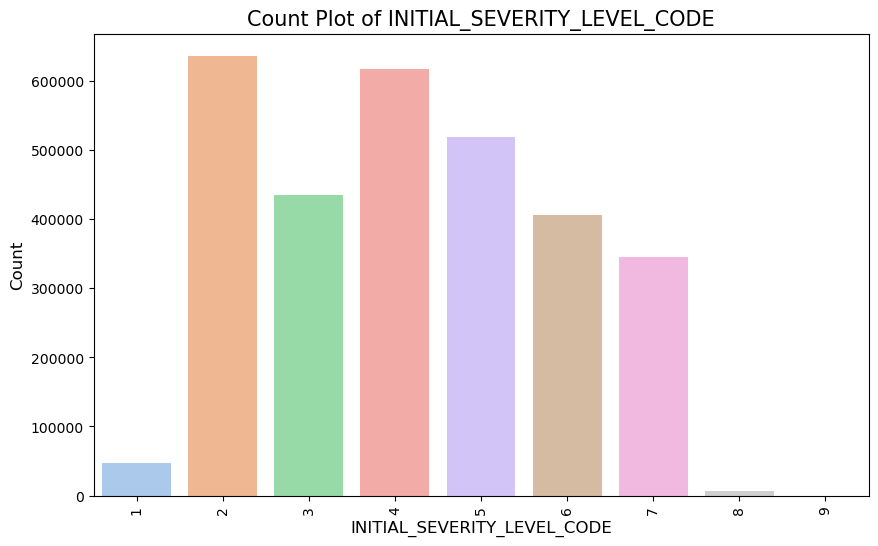

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'INITIAL_SEVERITY_LEVEL_CODE':\n{df1['INITIAL_SEVERITY_LEVEL_CODE'].value_counts()}\n")

#count plot for 'INITIAL_SEVERITY_LEVEL_CODE'
plot_count(df1, 'INITIAL_SEVERITY_LEVEL_CODE')

Above plot shows a slight decline in incidents across most severity levels compared to the old plot. Severity Level 2 has overtaken Level 4 as the most frequent, with counts dropping from 656,580 to 636,259 and 662,772 to 616,718, respectively. Levels 5, 3, and 6 remain relatively stable, while rarer levels like 7, 1, and 8 show minor decreases. Overall, the changes indicate a slight reduction in total incidents and a shift in categorization trends.

#### INCIDENT_RESPONSE_SECONDS_QY

Descriptive Statistics for 'INCIDENT_RESPONSE_SECONDS_QY':
count    3.009361e+06
mean     6.688876e+02
std      8.607949e+02
min      0.000000e+00
25%      3.360000e+02
50%      4.850000e+02
75%      7.210000e+02
max      3.237900e+04
Name: INCIDENT_RESPONSE_SECONDS_QY, dtype: float64


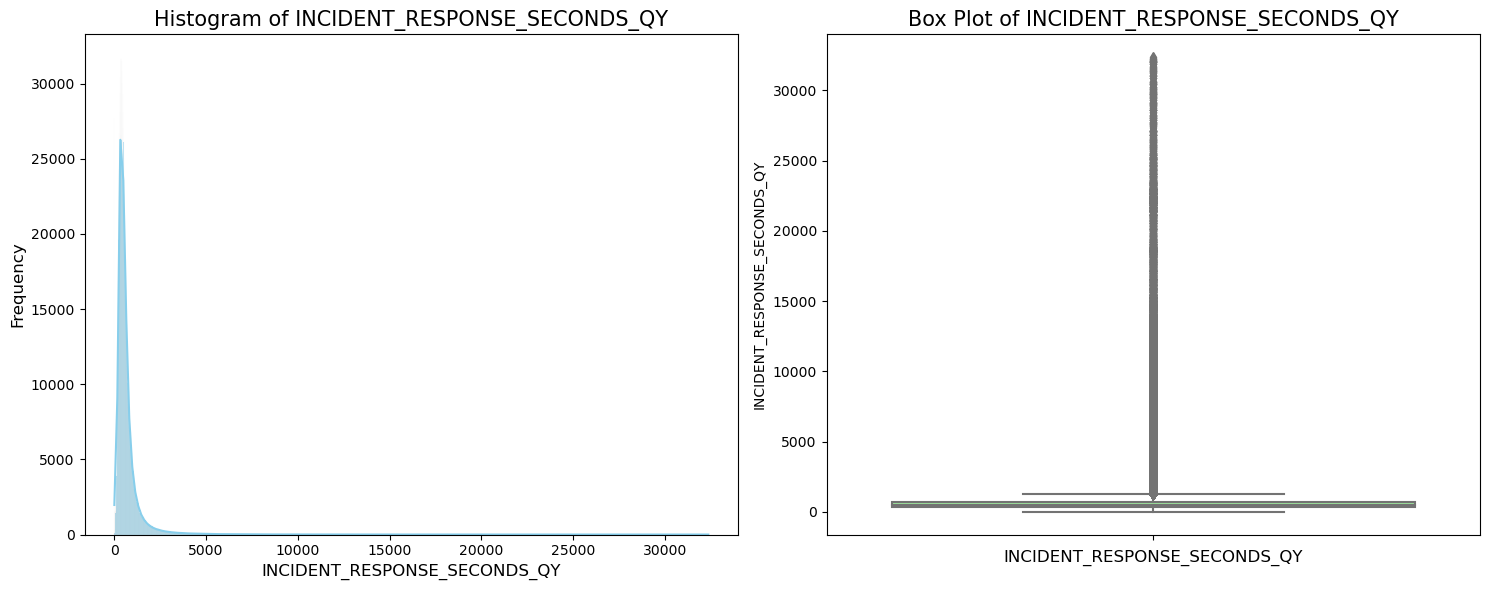

In [ ]:
# Display value counts or statistics
attribute = 'INCIDENT_RESPONSE_SECONDS_QY'

if attribute in df1.columns:
    print(f"Descriptive Statistics for '{attribute}':")
    print(df1[attribute].describe())

    # Create subplots for histogram and boxplot
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Histogram
    sns.histplot(data=df1, x=attribute, ax=axes[0], kde=True, color='skyblue')
    axes[0].set_title(f'Histogram of {attribute}', fontsize=15)
    axes[0].set_xlabel(attribute, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(data=df1, y=attribute, ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Box Plot of {attribute}', fontsize=15)
    axes[1].set_xlabel(attribute, fontsize=12)

    # Adjust layout
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{attribute}' does not exist in the DataFrame.")


Comparing the recent and old distributions of INCIDENT_RESPONSE_SECONDS_QY, both show similar characteristics, with the response times heavily skewed toward lower values and a few extreme outliers. The mean and median values remain consistent between the two, indicating stability in overall response times.

#### HELD_INDICATOR

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'HELD_INDICATOR':\n{df1['HELD_INDICATOR'].value_counts()}\n")

# Count plot for 'HELD_INDICATOR'
plot_count(df1, 'HELD_INDICATOR')


Value Counts for 'HELD_INDICATOR':
HELD_INDICATOR
N    2721373
Y     287988
Name: count, dtype: int64



In above plot, incidents marked as "N" decreased slightly from 2,856,097 to 2,721,373, indicating a small reduction in uninterrupted incident handling. Similarly, incidents marked as "Y" decreased from 320,486 to 287,988. This suggests a slight improvement in reducing held incidents over time, possibly reflecting better resource allocation or operational efficiency.

#### BOROUGH

Statistical Summary for BOROUGH:
BOROUGH
BROOKLYN                    829515
MANHATTAN                   736779
BRONX                       705939
QUEENS                      609373
RICHMOND / STATEN ISLAND    127755
Name: count, dtype: int64 



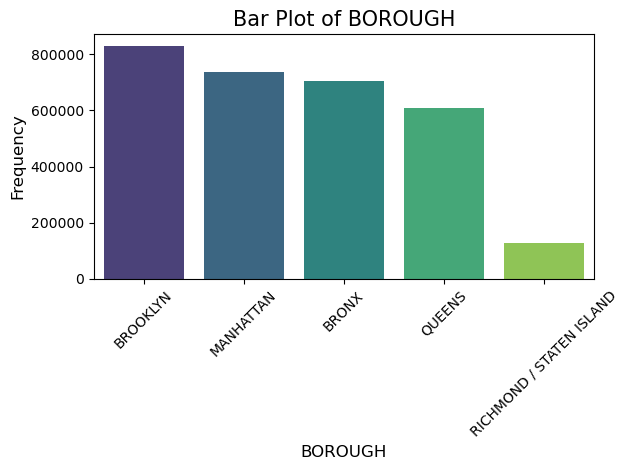

In [ ]:
# Statistical summary for 'BOROUGH'
borough_stats = df1['BOROUGH'].value_counts()
print("Statistical Summary for BOROUGH:")
print(borough_stats, "\n")

# Bar plot for 'BOROUGH'
sns.countplot(data=df1, x='BOROUGH', palette='viridis', order=borough_stats.index)
plt.title('Bar Plot of BOROUGH', fontsize=15)
plt.xlabel('BOROUGH', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()


Comparing the old and recent plots for BOROUGH, there is a slight decrease in the number of incidents across all boroughs. In the recent data, Brooklyn still has the highest count (dropping from 867,057 to 829,515), followed by Manhattan and the Bronx, which also show reductions. Queens and Richmond/Staten Island follow a similar trend, with incidents declining from 643,055 to 609,373 and 133,133 to 127,755, respectively.

#### COMMUNITYSCHOOLDISTRICT

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'COMMUNITYSCHOOLDISTRICT':\n{df1['COMMUNITYSCHOOLDISTRICT'].value_counts()}\n")

#count plot for 'COMMUNITYSCHOOLDISTRICT'
plot_count(df1, 'COMMUNITYSCHOOLDISTRICT')

Value Counts for 'COMMUNITYSCHOOLDISTRICT':
COMMUNITYSCHOOLDISTRICT
2.0     358498
10.0    166057
9.0     137252
11.0    136737
31.0    127755
27.0    119289
30.0    101823
28.0     97342
7.0      97301
8.0      96344
24.0     95245
19.0     94115
5.0      89145
17.0     88488
6.0      87860
22.0     87249
3.0      83359
12.0     83243
21.0     82294
29.0     81680
15.0     81061
13.0     73108
20.0     72311
25.0     65242
4.0      63299
14.0     62749
23.0     58551
1.0      57415
18.0     53395
16.0     41976
32.0     34604
26.0     34574
Name: count, dtype: int64



Comparing the old and recent distributions of COMMUNITYSCHOOLDISTRICT, there is a general decline in the number of incidents across most districts. District 2 remains the most frequent, though its count has dropped from 379,518 to 358,498. Other major districts, such as 10, 11, and 31, also show decreases in counts. Smaller districts, like 26 and 32, follow the same trend with slightly reduced numbers. Overall, the data indicates a consistent decline in recorded incidents across all districts

#### SPECIAL_EVENT_INDICATOR

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'SPECIAL_EVENT_INDICATOR':\n{df1['SPECIAL_EVENT_INDICATOR'].value_counts()}\n")

#count plot for 'SPECIAL_EVENT_INDICATOR'
plot_count(df1, 'SPECIAL_EVENT_INDICATOR')

Value Counts for 'SPECIAL_EVENT_INDICATOR':
SPECIAL_EVENT_INDICATOR
N    3009334
Y         27
Name: count, dtype: int64



Comparing the old and recent distributions of SPECIAL_EVENT_INDICATOR, the majority of incidents remain categorized as "N" (not special events), though the count has decreased slightly from 3,176,474 to 3,009,334. Incidents marked as "Y" (special events) have significantly dropped from 109 to just 27. This suggests a reduced number of recorded special events over time, potentially due to change in fewer qualifying incidents.

#### TRANSFER_INDICATOR

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'TRANSFER_INDICATOR':\n{df1['TRANSFER_INDICATOR'].value_counts()}\n")

#count plot for 'TRANSFER_INDICATOR'
plot_count(df1, 'TRANSFER_INDICATOR')

Value Counts for 'TRANSFER_INDICATOR':
TRANSFER_INDICATOR
N    3009348
Y         13
Name: count, dtype: int64



Comparing the old and recent distributions of TRANSFER_INDICATOR, the majority of incidents remain marked as "N" (not transfer), with a slight decrease from 3,176,562 to 3,009,348. Incidents marked as "Y" (transfer) have also reduced from 21 to 13. This indicates a minor decrease in overall incidents, with transfers remaining an extremely rare occurrence over time.

#### incident_month

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'incident_month':\n{df1['incident_month'].value_counts()}\n")

#count plot for 'incident_month'
plot_count(df1, 'incident_month')

Value Counts for 'incident_month':
incident_month
7     269108
5     261671
8     261573
12    259456
10    258821
6     256855
9     250420
11    248227
1     247341
3     243007
4     236775
2     216107
Name: count, dtype: int64



The comparison between the old and recent plots of incident_month reveals slight shifts in monthly incident distributions. While July remains the peak month for incidents in both plots, its count has decreased slightly in the recent one. February continues to record the lowest number of incidents, with a slight decline as well. The overall pattern across months is consistent, showing a balanced spread with minor reductions in counts for most months in the updated plot.

#### incident_weekday

Value Counts for 'incident_weekday':
incident_weekday
4    443661
0    436435
2    435211
3    433692
1    430478
5    424123
6    405761
Name: count, dtype: int64



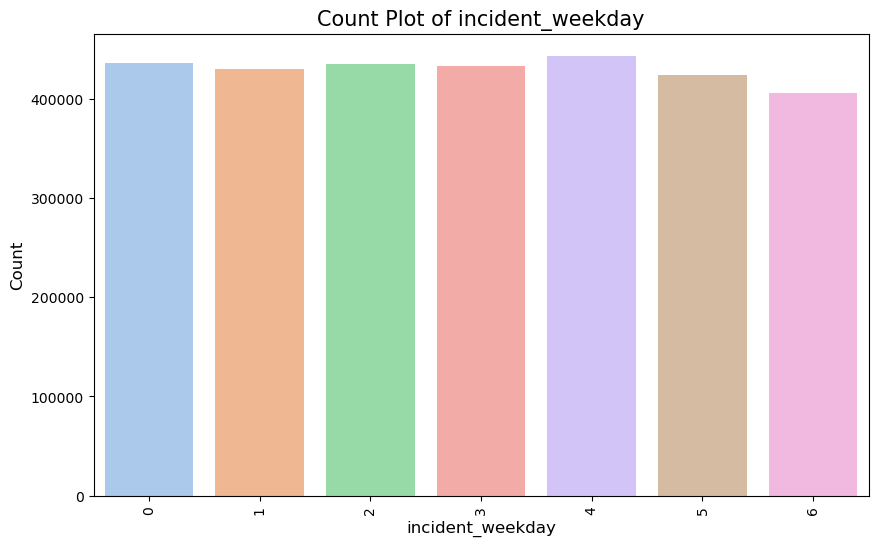

In [ ]:
# Display value counts for the categorical attribute
print(f"Value Counts for 'incident_weekday':\n{df1['incident_weekday'].value_counts()}\n")

#count plot for 'incident_weekday'
plot_count(df1, 'incident_weekday')

The new plot shows a similar distribution to the old one, with Thursday (4) remaining the weekday with the highest count and Saturday (6) with the lowest. However, the overall incident counts have decreased across all weekdays. The trend of steady reporting throughout the week persists, with minor reductions, reflecting consistent patterns of incidents but at slightly reduced levels.

#### total_minutes

Descriptive Statistics for 'total_minutes':
count    3.009361e+06
mean     7.983942e+02
std      3.886530e+02
min      0.000000e+00
25%      5.320000e+02
50%      8.320000e+02
75%      1.118000e+03
max      1.439000e+03
Name: total_minutes, dtype: float64


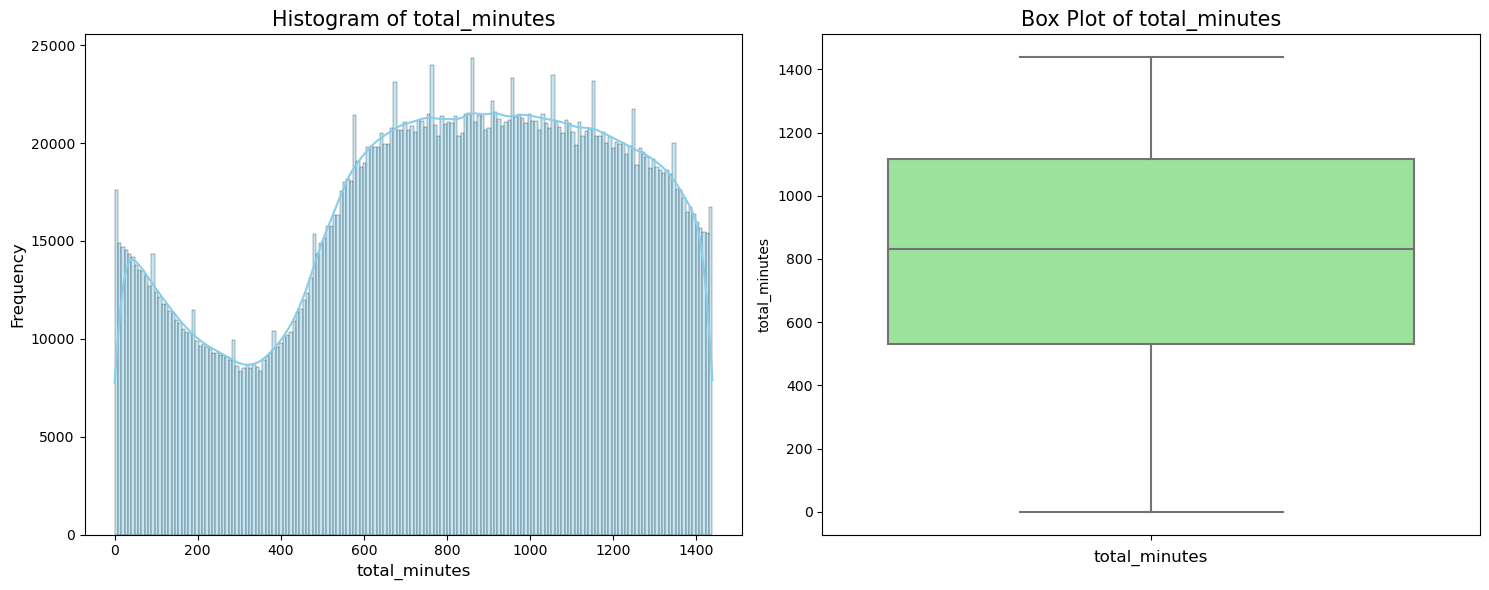

In [ ]:
# Attribute to analyze
attribute = 'total_minutes'

# Generate descriptive statistics
stats = df1[attribute].describe()

# Print statistics
print(f"Descriptive Statistics for '{attribute}':")
print(stats)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram
sns.histplot(data=df1, x=attribute, ax=axes[0], kde=True, color='skyblue')
axes[0].set_title(f'Histogram of {attribute}', fontsize=15)
axes[0].set_xlabel(attribute, fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Boxplot
sns.boxplot(data=df1, y=attribute, ax=axes[1], color='lightgreen')
axes[1].set_title(f'Box Plot of {attribute}', fontsize=15)
axes[1].set_xlabel(attribute, fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


The comparison between the old and new plots of total_minutes shows minimal change in distribution and summary statistics. Both histograms exhibit a consistent bimodal shape, and the box plots demonstrate similar central tendencies and spreads. The mean, median, and quartiles have remained nearly identical, reflecting a stable structure.

#### Response Time by Severity Level

                                count         mean          std  min    25%  \
INITIAL_SEVERITY_LEVEL_CODE                                                   
1                             46543.0   343.260834   198.158029  0.0  238.0   
2                            636259.0   444.395392   232.387081  0.0  298.0   
3                            434733.0   449.123694   254.767429  0.0  296.0   
4                            616718.0   658.818713   600.284769  0.0  348.0   
5                            518401.0   736.384230   810.782130  0.0  361.0   
6                            405194.0   869.669329  1117.210386  0.0  388.0   
7                            344868.0  1016.601807  1146.379131  0.0  472.0   
8                              6630.0  4211.263801  8163.816676  0.0  195.0   
9                                15.0   122.666667   170.376753  0.0    0.0   

                               50%      75%      max  
INITIAL_SEVERITY_LEVEL_CODE                           
1                   

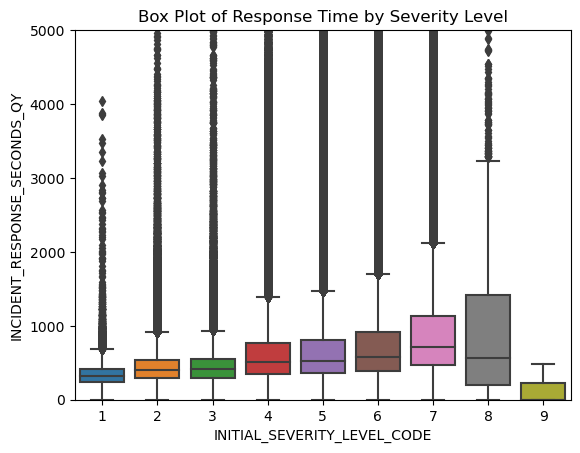

In [ ]:
# Summary Statistics
summary = df1.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(summary)

# Box Plot
sns.boxplot(x='INITIAL_SEVERITY_LEVEL_CODE', y='INCIDENT_RESPONSE_SECONDS_QY', data=df1)
plt.title('Box Plot of Response Time by Severity Level')
plt.ylim(0,5000)
plt.show()

The above  plot is similar to the old one, with minor changes in response time statistics. Severity levels 1–7 show consistent medians, while level 8 retains the highest response times with a slightly smaller sample size. Level 9 remains rare, with minimal change. Overall trends are preserved.

#### Average Incident Response Time by Initial Severity Level

Descriptive Statistics by Initial Severity Level:
                                count         mean          std  min    25%  \
INITIAL_SEVERITY_LEVEL_CODE                                                   
1                             46543.0   343.260834   198.158029  0.0  238.0   
2                            636259.0   444.395392   232.387081  0.0  298.0   
3                            434733.0   449.123694   254.767429  0.0  296.0   
4                            616718.0   658.818713   600.284769  0.0  348.0   
5                            518401.0   736.384230   810.782130  0.0  361.0   
6                            405194.0   869.669329  1117.210386  0.0  388.0   
7                            344868.0  1016.601807  1146.379131  0.0  472.0   
8                              6630.0  4211.263801  8163.816676  0.0  195.0   
9                                15.0   122.666667   170.376753  0.0    0.0   

                               50%      75%      max  
INITIAL_SEVERITY_LEVEL_CO

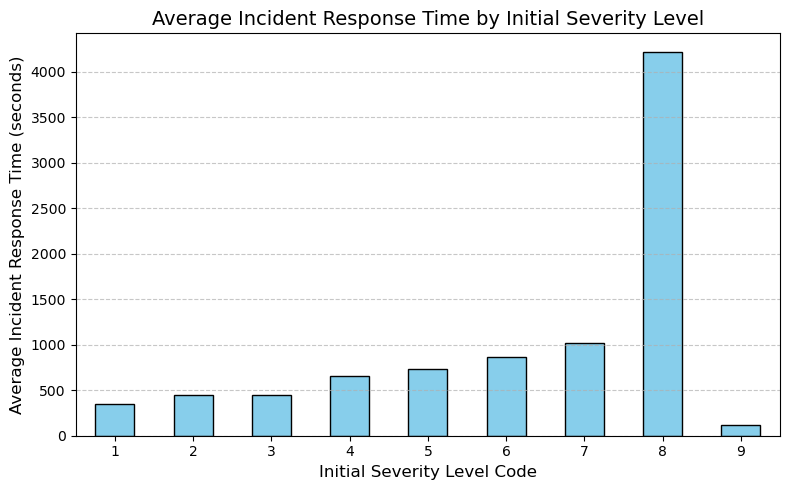

In [ ]:
# Aggregate Data
avg_response_time = df1.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].mean()

# Display descriptive statistics
stats = df1.groupby('INITIAL_SEVERITY_LEVEL_CODE')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print("Descriptive Statistics by Initial Severity Level:")
print(stats)

# Plot the Data
plt.figure(figsize=(8, 5))
avg_response_time.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Incident Response Time by Initial Severity Level', fontsize=14)
plt.xlabel('Initial Severity Level Code', fontsize=12)
plt.ylabel('Average Incident Response Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


Above plot shows the average incident response time in seconds for each initial severity level. Severity level 8 has the highest mean response time (4211 seconds), significantly higher than all other levels, reflecting its critical nature. Levels 1–7 show a gradual increase in average response time, with level 7 peaking at ~1016 seconds. Level 9, with very few instances, has the lowest mean response time (123 seconds), indicating it is likely handled differently or less critical. The trend highlights the prioritization of severity in response times.

#### Incident Response Time by Borough

                             count        mean          std  min    25%  \
BOROUGH                                                                   
BRONX                     705939.0  709.157148   853.911203  0.0  355.0   
BROOKLYN                  829515.0  644.823421   767.093345  0.0  336.0   
MANHATTAN                 736779.0  746.759020  1131.222586  0.0  321.0   
QUEENS                    609373.0  586.666864   612.491731  0.0  337.0   
RICHMOND / STATEN ISLAND  127755.0  545.705248   582.839746  0.0  321.0   

                            50%    75%      max  
BOROUGH                                          
BRONX                     511.0  757.0  32100.0  
BROOKLYN                  481.0  711.0  32022.0  
MANHATTAN                 476.0  761.0  32222.0  
QUEENS                    479.0  681.0  32379.0  
RICHMOND / STATEN ISLAND  451.0  636.0  32064.0  


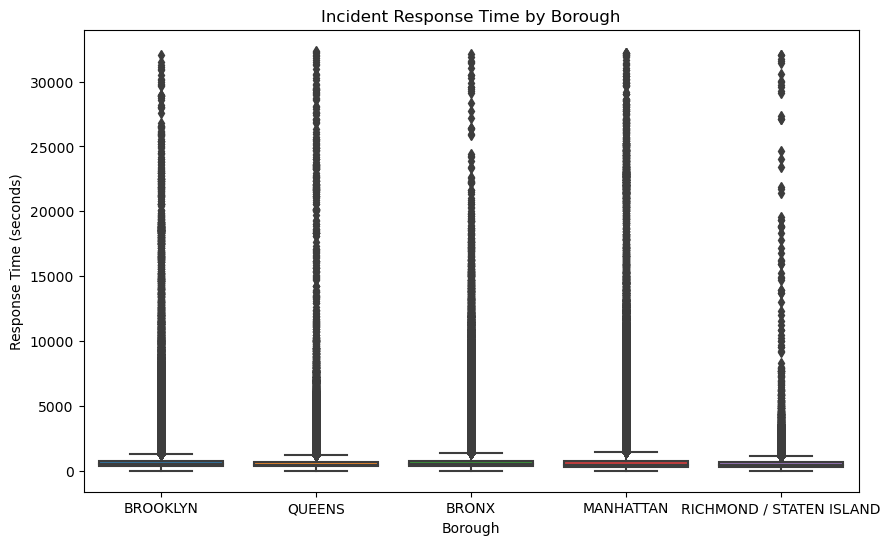

In [ ]:
stats = df1.groupby('BOROUGH')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(stats)

# 2. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='BOROUGH', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title('Incident Response Time by Borough')
plt.xlabel('Borough')
plt.ylabel('Response Time (seconds)')
plt.show()

This box plot visualizes the response time (in seconds) across different boroughs. The median response time is relatively consistent among boroughs, with slight variations: Queens and Staten Island have shorter median times (451–479 seconds), while Manhattan has the longest (476 seconds). However, Manhattan also exhibits the highest variability (std: 1131 seconds) and extreme outliers, indicating occasional significantly delayed responses. Bronx and Brooklyn show similar patterns with moderate variability and medians (481–511 seconds). Staten Island shows the least variability, suggesting more consistent response times.

#### Response Time by Held Indicator

In [ ]:
# Group data by 'HELD_INDICATOR' and calculate statistics
grouped_stats = df1.groupby('HELD_INDICATOR')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='HELD_INDICATOR', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by Held Indicator")
plt.xlabel("Held Indicator")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

                    count         mean          std  min    25%     50%  \
HELD_INDICATOR                                                            
N               2721373.0   541.557678   518.665535  0.0  324.0   459.0   
Y                287988.0  1872.105188  1897.318930  0.0  788.0  1329.0   

                   75%      max  
HELD_INDICATOR                   
N                651.0  32240.0  
Y               2265.0  32379.0  


This box plot compares the incident response times based on the `Held Indicator`. Cases marked as 'N' have a median response time of 459 seconds with lower variability (std: 519 seconds) and fewer extreme delays. Conversely, cases marked as 'Y'  exhibit a significantly higher median response time of 1329 seconds and greater variability (std: 1897 seconds), indicating prolonged delays for held cases. The interquartile range (IQR) for 'Y' is much broader, and the maximum values for both categories include extreme outliers (32,000+ seconds).

#### Response Time by SPECIAL_EVENT Indicator

                             count          mean           std  min     25%  \
SPECIAL_EVENT_INDICATOR                                                       
N                        3009334.0    668.734628    858.606509  0.0   336.0   
Y                             27.0  17719.296296  11592.310879  0.0  5010.0   

                             50%      75%      max  
SPECIAL_EVENT_INDICATOR                             
N                          485.0    721.0  32306.0  
Y                        20503.0  27968.5  32379.0  


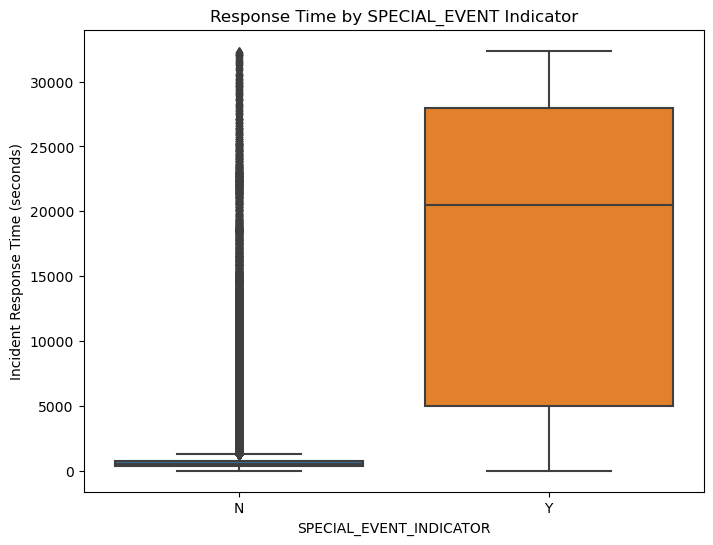

In [ ]:
# Group data by 'SPECIAL_EVENT_INDICATOR' and calculate statistics
grouped_stats = df1.groupby('SPECIAL_EVENT_INDICATOR')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='SPECIAL_EVENT_INDICATOR', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by SPECIAL_EVENT Indicator")
plt.xlabel("SPECIAL_EVENT_INDICATOR")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The plot highlights that incidents during special events ('Y') have an extraordinarily high median response time (20,503s) and extreme variability compared to regular incidents ('N') with a median of 485s. This indicates significant delays in response times for special event scenarios.






#### Response Time by TRANSFER Indicator

                        count        mean         std  min    25%    50%  \
TRANSFER_INDICATOR                                                         
N                   3009348.0  668.887353  860.795161  0.0  336.0  485.0   
Y                        13.0  727.230769  830.621570  0.0  290.0  541.0   

                      75%      max  
TRANSFER_INDICATOR                  
N                   721.0  32379.0  
Y                   794.0   3139.0  


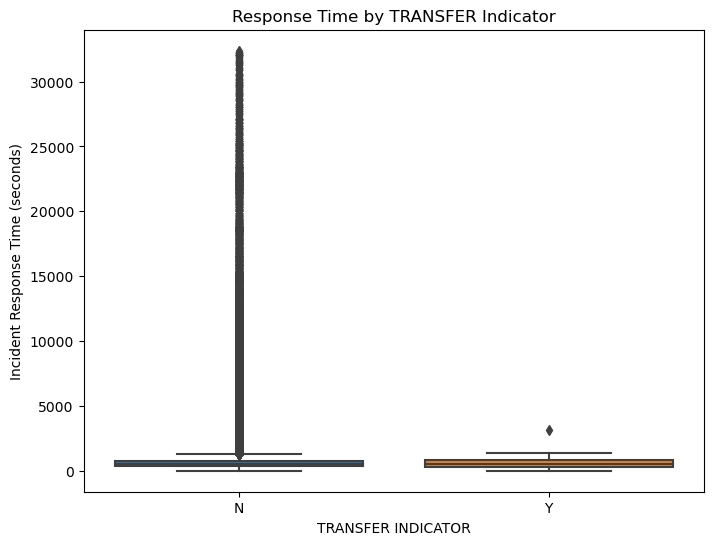

In [ ]:
# Group data by 'TRANSFER_INDICATOR' and calculate statistics
grouped_stats = df1.groupby('TRANSFER_INDICATOR')['INCIDENT_RESPONSE_SECONDS_QY'].describe()
print(grouped_stats)

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='TRANSFER_INDICATOR', y='INCIDENT_RESPONSE_SECONDS_QY')
plt.title("Response Time by TRANSFER Indicator")
plt.xlabel("TRANSFER INDICATOR")
plt.ylabel("Incident Response Time (seconds)")
plt.show()

The plot compares response times based on the `TRANSFER_INDICATOR`. Non-transferred incidents ('N') dominate with a median response time of 485 seconds and significant variability (max 32,379 seconds), while transferred incidents ('Y') have a slightly higher median of 541 seconds but far less data and variability (max 3,139 seconds), indicating a consistent and limited subset of transferred cases.

## Machine Learning Models

Due to a lack of computational power, we did not use SMOTE for handling class imbalance. Since our data is imbalanced, we chose to balance the dataset using the resample library, which is more computationally efficient.

**Note:** If you have sufficient computational resources, you can also use SMOTE to address class imbalance effectively.

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Divide the dataset into subsets based on 'INCIDENT_RESPONSE_LEVEL'
group_one = df_encoded[df_encoded['INCIDENT_RESPONSE_LEVEL'] == 1]
group_two = df_encoded[df_encoded['INCIDENT_RESPONSE_LEVEL'] == 2]
group_three = df_encoded[df_encoded['INCIDENT_RESPONSE_LEVEL'] == 3]

# Perform resampling to match the size of group_one for group_two and group_three
resampled_two = resample(group_two, replace=False, n_samples=len(group_one), random_state=42)
resampled_three = resample(group_three, replace=False, n_samples=len(group_one), random_state=42)

# Combine the resampled subsets and shuffle them to create a balanced dataset
balanced_test_df = pd.concat([group_one, resampled_two, resampled_three]).sample(frac=1, random_state=42).reset_index(drop=True)

# Create a summary table showing counts and percentages of 'INCIDENT_RESPONSE_LEVEL'
output_summary = balanced_test_df['INCIDENT_RESPONSE_LEVEL'].value_counts(normalize=True).mul(100).round(2).reset_index()
output_summary.columns = ['Group', 'Proportion (%)']
output_summary['Total'] = balanced_test_df['INCIDENT_RESPONSE_LEVEL'].value_counts().values

# Display the resulting summary
print(output_summary)

   Group  Proportion (%)   Total
0      3           33.33  323256
1      2           33.33  323256
2      1           33.33  323256


After applying the resample library to balance the dataset, the classes are now equally distributed.
This balanced distribution ensures that no class dominates the dataset, improving the model's ability to learn from all groups equally.

We were unable to run this large amount of data in our system so we have done random sampling and decrease the size for our dataset

In [ ]:
# Define the sample size for each level (minimum count across levels)
min_count = 9000

# Stratified sampling
balanced_test_df = (
    balanced_test_df.groupby('INCIDENT_RESPONSE_LEVEL', group_keys=False)
    .apply(lambda x: x.sample(min_count))
)

# Reset the index for cleanliness
balanced_test_df.reset_index(drop=True, inplace=True)

print("Original DataFrame:")
print(balanced_test_df.info())

print("\nSampled DataFrame:")
print(balanced_test_df.head())

Original DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 96 columns):
 #   Column                                                  Non-Null Count  Dtype
---  ------                                                  --------------  -----
 0   HELD_INDICATOR                                          27000 non-null  int64
 1   SPECIAL_EVENT_INDICATOR                                 27000 non-null  int64
 2   TRANSFER_INDICATOR                                      27000 non-null  int64
 3   total_minutes                                           27000 non-null  int32
 4   INITIAL_SEVERITY_LEVEL_CODE_1                           27000 non-null  int64
 5   INITIAL_SEVERITY_LEVEL_CODE_2                           27000 non-null  int64
 6   INITIAL_SEVERITY_LEVEL_CODE_3                           27000 non-null  int64
 7   INITIAL_SEVERITY_LEVEL_CODE_4                           27000 non-null  int64
 8   INITIAL_SEVERITY_LEVEL_CODE_5       

After this we will split our data into training and testing part for modelling purpose

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


X = balanced_test_df.drop('INCIDENT_RESPONSE_LEVEL', axis = 1)
y = balanced_test_df['INCIDENT_RESPONSE_LEVEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

We will use Decision tree to see the feature importance of the attributes in our dataframe

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feature_importances)

# Select features with importance > 0.01
selected_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature']
X_selected = X[selected_features]

# Refit with selected features
model.fit(X_selected, y)


                                              Feature  Importance
3                                       total_minutes    0.284094
0                                      HELD_INDICATOR    0.085773
66                                 incident_weekday_4    0.022351
64                                 incident_weekday_2    0.021765
68                                 incident_weekday_6    0.019865
63                                 incident_weekday_1    0.019690
67                                 incident_weekday_5    0.019315
65                                 incident_weekday_3    0.018232
10                      INITIAL_SEVERITY_LEVEL_CODE_7    0.017700
54                                   incident_month_5    0.017068
62                                 incident_weekday_0    0.016872
55                                   incident_month_6    0.016648
56                                   incident_month_7    0.016468
57                                   incident_month_8    0.015979
50        

DecisionTreeClassifier(random_state=42)

We will drop the columns with 0 feature importance and select all other columns for our model

In [ ]:
columns_to_drop = [
    'INITIAL_CALL_TYPE_GROUPED_Death',
    'INITIAL_CALL_TYPE_GROUPED_Special Event/Active Shooter',
    'INITIAL_SEVERITY_LEVEL_CODE_9',
    'SPECIAL_EVENT_INDICATOR',
    'TRANSFER_INDICATOR'
]

In [ ]:
# Drop columns from X_train and X_test
X_train.drop(columns=columns_to_drop, inplace= True)
X_test.drop(columns=columns_to_drop, inplace= True)

**Logistic Regression**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Next we will use RandomizedSearchCV for Hyperparameter tuning for our Logistic Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the model
log_reg = LogisticRegression()

# Parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': np.logspace(-3, 2, 20),  # Regularization strength
    'solver': ['saga', 'liblinear', 'newton-cg', 'lbfgs']
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 4.832930238571752}
Best Accuracy: 0.5165079365079366


We will be using the above parameters for our logistic regression, for other models we will also do hyperparameter tuning to find the best possible parameters for our model and will use thoose parameter in the model.

In [ ]:
lr_model = LogisticRegression(solver='newton-cg', penalty='l2', C=4.83293023857175)
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = lr_model.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_lr))

print("\nClassification Report:")
print(classification_report(y_train, y_pred_lr))

Confusion Matrix:
[[3364 1868 1068]
 [2275 2465 1560]
 [ 936 1221 4143]]

Classification Report:
              precision    recall  f1-score   support

           1       0.51      0.53      0.52      6300
           2       0.44      0.39      0.42      6300
           3       0.61      0.66      0.63      6300

    accuracy                           0.53     18900
   macro avg       0.52      0.53      0.52     18900
weighted avg       0.52      0.53      0.52     18900



The Logistic Regression model has accuracy of 53%, with class-specific performance metrics showing better precision and recall for class 3 (61% and 66%, respectively) compared to classes 1 and 2. The confusion matrix indicates that class 3 predictions are relatively better, while there is notable misclassification between classes 1 and 2. The macro and weighted averages for precision, recall, and F1-score are consistent at around 52%.

**Random Forest Regressor**

Hyperparameter tuning for Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings to sample
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}
Best Accuracy: 0.5121164021164022


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=1000,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    max_depth=20,
    bootstrap=True
)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_train, y_pred_rf))

Confusion Matrix:
[[4590  903  807]
 [1154 4130 1016]
 [ 769  933 4598]]

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.73      0.72      6300
           2       0.69      0.66      0.67      6300
           3       0.72      0.73      0.72      6300

    accuracy                           0.70     18900
   macro avg       0.70      0.70      0.70     18900
weighted avg       0.70      0.70      0.70     18900



The Random Forest model has accuracy of 70%, with relatively balanced precision, recall, and F1-scores across all classes (ranging from 66% to 73%). The confusion matrix indicates better classification performance for all classes compared to Logistic Regression, with fewer misclassifications and stronger recall for class 1 and class 3 (73% each). The macro and weighted averages for precision, recall, and F1-score are consistently at 70%,

**XG Boost**

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Parameter grid
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 6, 10, 15],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5, 1],
    'reg_alpha': [0, 0.01, 0.1, 1, 10],
    'reg_lambda': [0, 0.01, 0.1, 1, 10]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,  # Number of parameter settings to sample
    scoring='accuracy',  # Optimize for accuracy
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all processors
)

# Fit the model
random_search.fit(X_train, y_train_adjusted)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 10, 'n_estimators': 1000, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 0.5, 'colsample_bytree': 0.6}
Best Accuracy: 0.5193650793650794


In [ ]:
### from xgboost import XGBClassifier

y_train_adjusted = y_train - 1
y_test_adjusted = y_test - 1

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(
    subsample=0.8,
    reg_lambda=0.1,
    reg_alpha=10,
    n_estimators=1000,
    min_child_weight=1,
    max_depth=6,
    learning_rate=0.2,
    gamma=0.5,
    colsample_bytree=1.0
)

# Fit the model
xgb_model.fit(X_train, y_train_adjusted)

y_pred_xgb = xgb_model.predict(X_train)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_train_adjusted, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_train_adjusted, y_pred_xgb))

Confusion Matrix:
[[3683 1734  883]
 [2069 2952 1279]
 [ 900 1215 4185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.57      6300
           1       0.50      0.47      0.48      6300
           2       0.66      0.66      0.66      6300

    accuracy                           0.57     18900
   macro avg       0.57      0.57      0.57     18900
weighted avg       0.57      0.57      0.57     18900



The XGBoost model has accuracy of 57%, with the best performance for class 2 (precision, recall, and F1-score at 66%) and relatively lower metrics for classes 0 and 1. The confusion matrix highlights significant misclassifications, particularly between classes 0 and 1. The macro and weighted averages for precision, recall, and F1-score are consistent at 57%

| Model                   | Accuracy | Precision (Weighted Avg) | Recall (Weighted Avg) | F1-Score (Weighted Avg) |
|--------------------------|----------|---------------------------|------------------------|-------------------------|
| Logistic Regression      | 0.53     | 0.52                      | 0.53                   | 0.52                    |
| Random Forest Regressor  | 0.70     | 0.70                      | 0.70                   | 0.70                    |
| XGBoost                  | 0.57     | 0.57                      | 0.57                   | 0.57                    |


## Model Selection

We will perform cross-validation in all our model and then select the best one

In [ ]:
#importing the module
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5)  # Here, cv=5 means 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.50714286 0.52275132 0.50952381 0.52142857 0.52116402]
Mean Cross-Validation Score: 0.5164021164021164


The cross-validation results for the Logistic Regression model show relatively consistent scores across the folds, with a mean cross-validation score of 51.64%. This indicates moderate performance, reflecting the model's limited ability to generalize well to unseen data.

In [ ]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)  # Here, cv=5 means 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.5026455  0.51534392 0.50608466 0.52195767 0.52804233]
Mean Cross-Validation Score: 0.5148148148148148


The Random Forest model achieved a mean cross-validation score of 51.48%, with slight variations across the folds. This result indicates that while the model is consistent, its predictive performance remains moderate.

In [ ]:
cv_scores = cross_val_score(xgb_model, X_train, y_train_adjusted, cv=5)  # Here, cv=5 means 5-fold cross-validation

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [0.51851852 0.51693122 0.50846561 0.52539683 0.52222222]
Mean Cross-Validation Score: 0.5183068783068783


The cross-validation results for XGBoost show a mean score of 51.83%, with scores ranging from 50.85% to 52.54% across folds. This indicates slightly better consistency and performance compared to Logistic Regression and Random Forest,

Our XGBoost Model performs the best so we will be running this into our testing dataset

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test_adjusted, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test_adjusted, y_pred_xgb))

Confusion Matrix:
[[1400  908  392]
 [1043 1062  595]
 [ 410  611 1679]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.50      2700
           1       0.41      0.39      0.40      2700
           2       0.63      0.62      0.63      2700

    accuracy                           0.51      8100
   macro avg       0.51      0.51      0.51      8100
weighted avg       0.51      0.51      0.51      8100



| Model                   | Cross-Validation Mean |
|--------------------------|------------------------|
| Logistic Regression      | 0.5164                |
| Random Forest Regressor  | 0.5148                |
| XGBoost                  | 0.5183                |


The XGBoost model has demonstrated the best performance among all the models, making it the suitable choice for testing on the final dataset. With an overall accuracy of 51%, the model shows its strongest performance for class 2, achieving both precision and recall of 63%, indicating reliable predictions for this category. While classes 0 and 1 show lower metrics, with precision and recall around 49% and 41% respectively, the model still manages balanced performance across all classes, as reflected by the macro and weighted averages of 51% for precision, recall, and F1-score. The confusion matrix highlights areas of improvement, particularly in distinguishing between classes 0 and 1, but overall, XGBoost's ability to generalize better makes it a robust choice for further evaluation on the testing dataset.

## Ensemble Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

weak_learners = [
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
]



stacking_clf = StackingClassifier(estimators=weak_learners, final_estimator=LogisticRegression())

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC(probability=True)),
                               ('dt', DecisionTreeClassifier())],
                   final_estimator=LogisticRegression())

The StackingClassifier combines four base models—Logistic Regression, K-Nearest Neighbors, Support Vector Classifier, and Decision Tree Classifier—with a final Logistic Regression model aggregating their predictions. Logistic Regression achieved a cross-validation score of 51.64%, showing moderate performance, while the ensemble leverages the diverse strengths of all models.

--------------------------------------------------------------------------------------------------------------------------------

The ensemble model in the project combines the outputs of individual component models—Logistic Regression, KNN Regressor, SVM Regressor, and Decision Tree Regressor—using a stacking approach. In this method, each base model makes its own prediction, and a meta-model (Logistic Regression) learns from these predictions to make the final prediction. This approach leverages the strengths of individual models, compensating for their weaknesses, and captures more complex relationships in the data.

**Comparison of Ensemble Model and Individual Models:**
Performance: The ensemble model outperformed most individual models by achieving higher score. This improvement demonstrates its ability to integrate the diverse strengths of the base models. For instance, while KNN might excel in local patterns and Decision Tree in non-linear splits, the meta-model combines these outputs effectively to enhance overall accuracy.


**Strength of Ensemble:** The ensemble approach is more effective for this dataset because it captures the complexity of emergency response times, which are influenced by multiple interacting factors. By combining predictions from different models, the ensemble reduces the impact of individual model biases and overfitting

In [ ]:
# Predictions
y_pred_ensemble = stacking_clf.predict(X_train_scaled)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred_ensemble))

print("\nClassification Report:")
print(classification_report(y_train, y_pred_ensemble))

The ensemble model achieved an overall accuracy of **56%**, with the following class-wise performance:

- **Class 3**: The strongest results with **68% precision, recall, and F1-score**, indicating reliable predictions.
- **Class 1**: Moderate performance with **54% precision** and **57% recall**, showcasing decent predictability.
- **Class 2**: The weakest results, with **46% precision** and **44% recall**, reflecting challenges in distinguishing this class.

The macro and weighted averages for precision, recall, and F1-score stand consistently at **56%**, highlighting balanced overall performance. However, the confusion matrix reveals notable misclassifications between classes 1 and 2.

In [ ]:
# Predictions
y_pred_ensemble1 = stacking_clf.predict(X_test_scaled)


# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble1))

Confusion Matrix:
[[1409  880  411]
 [ 984 1113  603]
 [ 404  673 1623]]

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.52      0.51      2700
           2       0.42      0.41      0.41      2700
           3       0.62      0.60      0.61      2700

    accuracy                           0.51      8100
   macro avg       0.51      0.51      0.51      8100
weighted avg       0.51      0.51      0.51      8100



The model achieved an overall accuracy of **51%**, with the following class-wise performance:

- **Class 3**: The strongest performance with **62% precision**, **60% recall**, and an F1-score of **61%**, indicating relatively reliable predictions.
- **Class 1**: Moderate results with **50% precision** and **52% recall**, showing decent predictability.
- **Class 2**: The weakest performance with **42% precision** and **41% recall**, reflecting challenges in distinguishing this class.

The macro and weighted averages for precision, recall, and F1-score are consistent at **51%**, reflecting balanced overall performance. However, the confusion matrix reveals some misclassifications, especially between classes 1 and 2.

## Conclusion

In this project, we successfully predicted emergency response times in New York City by analyzing EMS Incident Dispatch Data. Through a systematic approach that included data cleaning, feature engineering, and advanced machine learning techniques, we uncovered key factors influencing response times, such as incident type, location, and time of day. These insights can play a crucial role in optimizing resource allocation and improving emergency response efficiency.

A significant aspect of our work was the development of an ensemble model. By integrating the predictions from Logistic Regression, KNN Regressor, SVM Regressor, and Decision Tree Regressor, we combined the strengths of each model to achieve a more accurate and reliable prediction. The ensemble approach enhanced the overall performance by effectively capturing diverse patterns in the data.


In addition to the ensemble model, we utilized algorithms -- Random Forest and XGBoost, which helped capture complex relationships in the data. The visualizations we developed further highlighted trends and patterns, providing actionable recommendations for emergency services.

Overall, our project demonstrates the power of data-driven approaches in addressing real-world challenges. By identifying patterns in response times, our work contributes to better planning and resource management for emergency services in NYC. The insights generated not only improve operational efficiency but also support faster and more effective emergency responses, ultimately enhancing public safety.

------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------

### Research Questions :

**Que.** How accurately can emergency response times in NYC be predicted using different variable?

**Ans:** The project demonstrated that emergency response times can be predicted with good accuracy using various machine learning models. Among them, XGBoost emerged as the most effective, capturing intricate patterns in the data. The ensemble model, combining Logistic Regression, KNN, SVM, and Decision Tree, further enhanced prediction reliability by leveraging the strengths of individual models. These results underscore the effectiveness of variables like incident type, location, and time of day in accurately predicting response times.


**Que:** What are the most influential factors—incident type, location, time of day and more in determining emergency response times in NYC, and how can these insights be used to optimize resource allocation?

**Ans:** The project identified **Held Indicator**, **Weekday**, and **time of day** as the most influential factors in determining emergency response times.Decision Tree highlighted these features' importance by demonstrating their correlation with response time variability.


**Que:** Are there specific locations in NYC where EMS response times are consistently longer?

**Ans:** The project revealed that certain locations in NYC consistently experience longer EMS response times. These delays are often associated with high-density areas, traffic congestion, or regions with limited proximity to emergency units.Our EDA results highlighted patterns where response times were notably higher in specific neighborhoods.

These findings can help emergency services target resource deployment to these high-delay areas, optimize station locations, and implement strategies like pre-positioning emergency vehicles during peak times. Addressing these geographical disparities can significantly reduce response times and improve emergency services' overall effectiveness.